#### sets of experiments in consideration

* temperature 0
* temperature 1 with multiple completion

* multi-choice fashion
* self combination fashion

* other questions asked in the .js file instead of only two asked show in the evaluation



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### literal semantics

In [3]:
# read in a txt file
with open('../../results/literal_semantics_results_mistral_0.0_1.txt') as f:
    data = f.readlines()

formatted_data = [eval(line.strip())[0] for line in data]

df = pd.DataFrame(formatted_data)

df

0
0    Yes
1    Yes
2     No
3     No
4     No
..   ...
645  Yes
646  Yes
647   No
648   No
649   No

[650 rows x 1 columns]

In [4]:
literal_semantics = pd.read_csv("../../data/scenarios_literal_semantics.csv", header=None)

# add a column name called "scenario" to the dataframe
literal_semantics.columns = ["scenario"]

literal_semantics["num_hearts"] = literal_semantics["scenario"].str.extract(r"(\d heart)")

# extract the number in the "num_hearts" column and make a new column called "states"
literal_semantics["states"] = literal_semantics["num_hearts"].str.extract(r"(\d)")

# match "terrible", "bad", "okay", "good", "amazing" in the scenarios and make a new column called "utterance"
literal_semantics["utterance"] = literal_semantics["scenario"].str.extract(r"(terrible|bad|okay|good|amazing)")

# match "was" or "wasn't" in the scenarios and make a new column called "it_was"
literal_semantics["it_was"] = literal_semantics["scenario"].str.extract(r"(wasn't|was)")

# read from ../../results/literal_semantics_results_gpt-4o-2024-05-13.txt and make a new column called "llm_response"
# literal_semantics["llm_response"] = pd.read_csv("../../results/literal_semantics_results_llama3_0.0_1.txt", header=None)
literal_semantics["llm_response"] = df

# convert yes/no to 1/0 in the llm_response column and create a new column called "llm_response_binary"
literal_semantics["llm_response_binary"] = literal_semantics["llm_response"].apply(lambda x: 1 if x == "Yes" else 0)

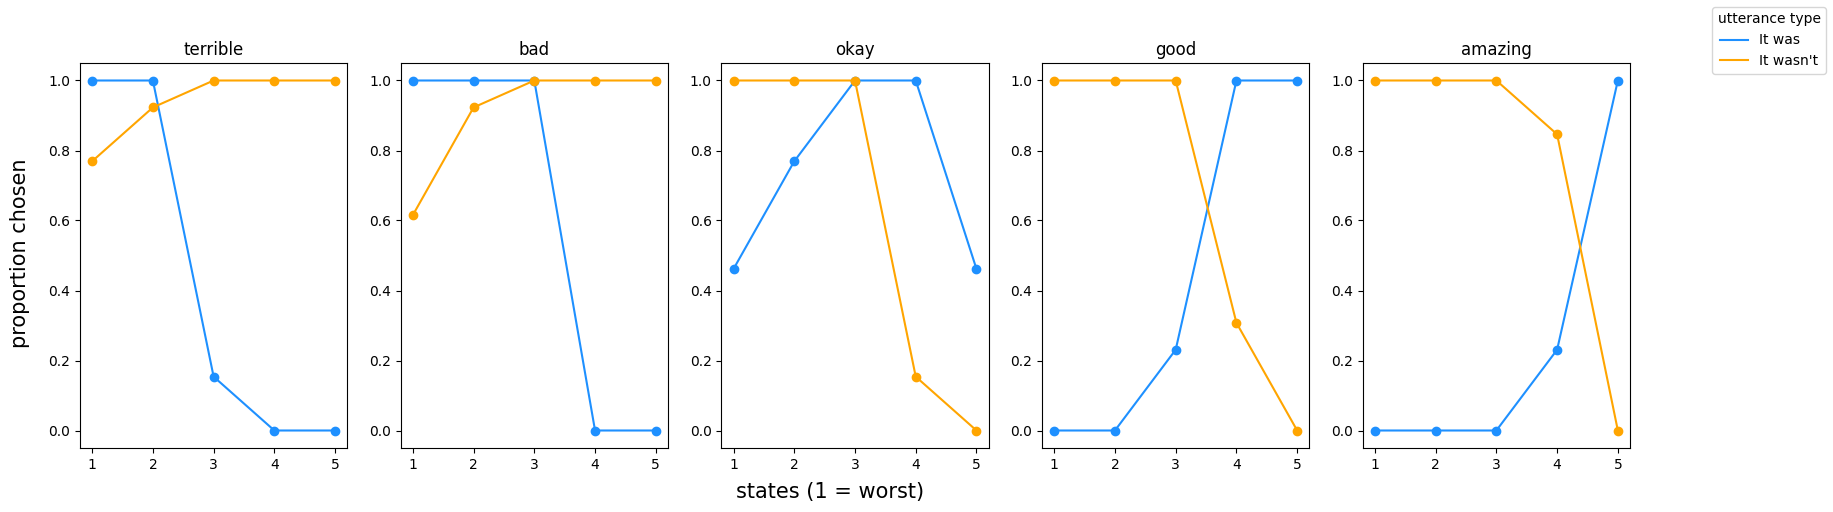

In [5]:
# group by it_was and utterance and states and get the mean of llm_response_binary
grouped_literal_semantics = literal_semantics.groupby(["it_was", "utterance", "states"])["llm_response_binary"].mean()

grouped_literal_semantics

# save the grouped data to a csv file
grouped_literal_semantics.to_csv("../../results/literal_semantics_grouped.csv")

# read in the grouped data
grouped_literal_semantics = pd.read_csv("../../results/literal_semantics_grouped.csv")

fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, word in enumerate(["terrible", "bad", "okay", "good", "amazing"]):
    terrible = grouped_literal_semantics[(grouped_literal_semantics["utterance"] == word) & (grouped_literal_semantics["it_was"] == "was")]
    bad = grouped_literal_semantics[(grouped_literal_semantics["utterance"] == word) & (grouped_literal_semantics["it_was"] == "wasn't")]
    axs[i].plot(terrible["states"], terrible["llm_response_binary"], marker="o", label="was", color="dodgerblue")
    axs[i].plot(bad["states"], bad["llm_response_binary"], marker="o", label="wasn't", color="orange")
    axs[i].set_title(word)

fig.text(0.09, 0.5, 'proportion chosen', va='center', rotation='vertical', size=15)
fig.text(0.5, 0.01, 'states (1 = worst)', ha='center', size=15)

handles = [
    plt.Line2D([0], [0], color="dodgerblue", label="It was"),
    plt.Line2D([0], [0], color="orange", label="It wasn't")
    
]
fig.legend(handles=handles, loc='upper right', title='utterance type')

In [6]:
# import pandas as pd
# results_experiment_2 = pd.read_csv("../../results/utterance_production_experiment2_prompt1_results_gpt-4o-2024-05-13_0.5_10.txt", header=None)

# results_experiment_2.columns = ["llm_raw_response"]

# results_experiment_2

# # repeat each row n times, n is input by the user 
# n = 5
# results_experiment_2 = results_experiment_2.loc[results_experiment_2.index.repeat(n)].reset_index(drop=True)

# results_experiment_2

In [7]:
195 * 5

975

### speaker production

##### I need to collect correlation plots and line plots

In [13]:
file_path = "../../results/results_from_stanford_server/utterance_production_experiment2_prompt1_results_meta-llama_Llama-3.1-70B-Instruct_1.0_do_sample_True_num_completions_1_persona.txt"

# data_corrected = pd.read_csv(file_path, header=None)
# data_corrected = data_corrected.stack().reset_index(drop=True)
# data_corrected.columns = ['Responses']

# data_corrected,

data_corrected = pd.read_csv(file_path, header=None)
data_corrected.columns = ['Responses']
# save the data to a csv file
data_corrected.to_csv("../../results/test.csv", index=False)
# read in the data
results_experiment_2 = pd.read_csv("../../results/test.csv")
results_experiment_2.columns = ["llm_raw_response"]

results_experiment_2["llm_adjectives"] = results_experiment_2["llm_raw_response"].str.extract(r"(terrible|bad|okay|good|amazing)")


# extract the "was" or "wasn't" in the responses and make a new column called "llm_it_was"

results_experiment_2["llm_negations"] = results_experiment_2["llm_raw_response"].str.extract(r"(It wasn't|It was)")

results_experiment_2


llm_raw_response llm_adjectives llm_negations
0            ['Answer: 3) It was okay.']           okay        It was
1     ["Answer: 6) It wasn't terrible."]       terrible     It wasn't
2     ["Answer: 6) It wasn't terrible."]       terrible     It wasn't
3     ["Answer: 6) It wasn't terrible."]       terrible     It wasn't
4            ['Answer: 3) It was okay.']           okay        It was
...                                  ...            ...           ...
7795      ['Answer: 5) It was amazing.']        amazing        It was
7796      ['Answer: 5) It was amazing.']        amazing        It was
7797      ['Answer: 5) It was amazing.']        amazing        It was
7798      ['Answer: 5) It was amazing.']        amazing        It was
7799      ['Answer: 5) It was amazing.']        amazing        It was

[7800 rows x 3 columns]

In [44]:
file_path = "../../results/results_from_stanford_server/utterance_production_experiment2_prompt1_results_meta-llama_Llama-3.1-8B-Instruct_1.0_do_sample_True_num_completions_30.txt"

# data_corrected = pd.read_csv(file_path, header=None)
# data_corrected = data_corrected.stack().reset_index(drop=True)
# data_corrected.columns = ['Responses']

# data_corrected,

data_corrected = pd.read_csv(file_path, header=None)
data_corrected = data_corrected.stack().reset_index(drop=True)
data_corrected.columns = ['Responses']

# save the data to a csv file
data_corrected.to_csv("../../results/test.csv", index=False)


# read in the data
results_experiment_2 = pd.read_csv("../../results/test.csv")

# drop the first column
# data = data.drop(columns=[0])

results_experiment_2.columns = ["llm_raw_response"]

results_experiment_2["llm_adjectives"] = results_experiment_2["llm_raw_response"].str.extract(r"(terrible|bad|okay|good|amazing)")


# extract the "was" or "wasn't" in the responses and make a new column called "llm_it_was"

results_experiment_2["llm_negations"] = results_experiment_2["llm_raw_response"].str.extract(r"(It wasn't|It was)")

results_experiment_2



llm_raw_response llm_adjectives llm_negations
0       ["Answer: 9) It wasn't good."           good     It wasn't
1            'Answer: 2) It was bad.'            bad        It was
2         "Answer: 7) It wasn't bad."            bad     It wasn't
3       'Answer: 1) It was terrible.'       terrible        It was
4        "Answer: 8) It wasn't okay."           okay     It wasn't
...                               ...            ...           ...
7795     'Answer: 5) It was amazing.'        amazing        It was
7796      "Answer: 7) It wasn't bad."            bad     It wasn't
7797    'Answer: 1) It was terrible.'       terrible        It was
7798        'Answer: 4) It was good.'           good        It was
7799   'Answer: 1) It was terrible.']       terrible        It was

[7800 rows x 3 columns]

In [45]:
# read in the data from ../../data/scenarios_utterance_production_multi_choice_format.csv
scenarios_utterance_production = pd.read_csv("../../data/scenarios_utterance_production_for_evaluation_updated.csv", header=None)

# add a column name called "scenario" to the dataframe
scenarios_utterance_production.columns = ["scenario"]

n = 30
scenarios_utterance_production = scenarios_utterance_production.loc[scenarios_utterance_production.index.repeat(n)].reset_index(drop=True)

# make a column called "goal" in the dataframe with "both", "informative", "social" in the scenarios
scenarios_utterance_production["goal"] = scenarios_utterance_production["scenario"].str.extract(r"(both|informative|social|default)")

# # make a column called "utterance" in the dataframe with "terrible", "bad", "okay", "good", "amazing" in the scenarios
# scenarios_utterance_production["utterance"] = scenarios_utterance_production["scenario"].str.extract(r"(terrible|bad|okay|good|amazing)")

# make a column called "num_hearts" in the dataframe with "1 heart", "2 hearts", "3 hearts", "4 hearts", "5 hearts" in the scenarios
# you should match "heart" and "hearts"
scenarios_utterance_production["num_hearts"] = scenarios_utterance_production["scenario"].str.extract(r"(\d hearts|\d heart)")

# concate the two dataframes
results_experiment_default = pd.concat([scenarios_utterance_production, results_experiment_2], axis=1)

# drop llm_raw_response column
results_experiment_default.drop("llm_raw_response", axis=1, inplace=True)

results_experiment_default

# # save the data to a csv file
# results_experiment_2.to_csv("../../results/results_experiment_2.csv")

scenario     goal num_hearts  \
0     Scenario:\nImagine that Bob just gave a presen...     both    1 heart   
1     Scenario:\nImagine that Bob just gave a presen...     both    1 heart   
2     Scenario:\nImagine that Bob just gave a presen...     both    1 heart   
3     Scenario:\nImagine that Bob just gave a presen...     both    1 heart   
4     Scenario:\nImagine that Bob just gave a presen...     both    1 heart   
...                                                 ...      ...        ...   
7795  Scenario:\nImagine that Emma had a piano recit...  default   5 hearts   
7796  Scenario:\nImagine that Emma had a piano recit...  default   5 hearts   
7797  Scenario:\nImagine that Emma had a piano recit...  default   5 hearts   
7798  Scenario:\nImagine that Emma had a piano recit...  default   5 hearts   
7799  Scenario:\nImagine that Emma had a piano recit...  default   5 hearts   

     llm_adjectives llm_negations  
0              good     It wasn't  
1               bad        It was  
2               bad     It wasn't  
3          terrible        It was  
4              okay     It wasn't  
...             ...           ...  
7795        amazing        It was  
7796            bad     It wasn't  
7797       terrible        It was  
7798           good        It was  
7799       terrible        It was  

[7800 rows x 5 columns]

### Start!

In [4]:
7800/30

260.0

In [5]:
6240/30

208.0

In [41]:
import pandas as pd

In [367]:
file_path = "../../results/utterance_production_experiment2_prompt1_results_gpt-4o-2024-11-20_1.0_30_scenarios_utterance_production_multi_choice_format.txt"

# data_corrected = pd.read_csv(file_path, header=None)
# data_corrected = data_corrected.stack().reset_index(drop=True)
# data_corrected.columns = ['Responses']

# data_corrected,

data_corrected = pd.read_csv(file_path, header=None)

# only when num_completion > 1
data_corrected = data_corrected.stack().reset_index(drop=True)


data_corrected.columns = ['Responses']

# save the data to a csv file
data_corrected.to_csv("../../results/test.csv", index=False)


# read in the data
results_experiment_2 = pd.read_csv("../../results/test.csv")

# drop the first column
# data = data.drop(columns=[0])

results_experiment_2.columns = ["llm_raw_response"]

results_experiment_2["llm_adjectives"] = results_experiment_2["llm_raw_response"].str.extract(r"(terrible|bad|okay|good|amazing)")


# extract the "was" or "wasn't" in the responses and make a new column called "llm_it_was"

results_experiment_2["llm_negations"] = results_experiment_2["llm_raw_response"].str.extract(r"(It wasn't|It was)")

results_experiment_2



llm_raw_response llm_adjectives llm_negations
0     ["Answer: 5) It wasn't terrible."       terrible     It wasn't
1      "Answer: 5) It wasn't terrible."       terrible     It wasn't
2      "Answer: 5) It wasn't terrible."       terrible     It wasn't
3      "Answer: 5) It wasn't terrible."       terrible     It wasn't
4      "Answer: 5) It wasn't terrible."       terrible     It wasn't
...                                 ...            ...           ...
6235       'Answer: 4) It was amazing.'        amazing        It was
6236       'Answer: 4) It was amazing.'        amazing        It was
6237       'Answer: 4) It was amazing.'        amazing        It was
6238       'Answer: 4) It was amazing.'        amazing        It was
6239      'Answer: 4) It was amazing.']        amazing        It was

[6240 rows x 3 columns]

In [368]:
# results_experiment_2 = pd.read_csv("../../results/utterance_production_0shot_multi_choice_results_llama3_0.0_1.txt", header=None)

# # add a column name called "llm_raw_response" to the dataframe
# results_experiment_2.columns = ["llm_raw_response"]

# # extract the "terrible", "bad", "okay", "good", "amazing" in the responses and make a new column called "llm_response"
# results_experiment_2["llm_adjectives"] = results_experiment_2["llm_raw_response"].str.extract(r"(terrible|bad|okay|good|amazing)")

# # extract the "was" or "wasn't" in the responses and make a new column called "llm_it_was"

# results_experiment_2["llm_negations"] = results_experiment_2["llm_raw_response"].str.extract(r"(It wasn't|It was)")

In [369]:
# read in the data from ../../data/scenarios_utterance_production_multi_choice_format.csv
scenarios_utterance_production = pd.read_csv("../../data/scenarios_utterance_production_for_evaluation.csv", header=None)

# add a column name called "scenario" to the dataframe
scenarios_utterance_production.columns = ["scenario"]

In [370]:
scenarios_utterance_production

scenario
0    Scenario:\nImagine that Bob just gave a presen...
1    Scenario:\nImagine that Bob just gave a presen...
2    Scenario:\nImagine that Bob just gave a presen...
3    Scenario:\nImagine that Bob just gave a presen...
4    Scenario:\nImagine that Bob just gave a presen...
..                                                 ...
203  Scenario:\nImagine that Emma had a piano recit...
204  Scenario:\nImagine that Emma had a piano recit...
205  Scenario:\nImagine that Emma had a piano recit...
206  Scenario:\nImagine that Emma had a piano recit...
207  Scenario:\nImagine that Emma had a piano recit...

[208 rows x 1 columns]

In [371]:
# read in the data from ../../data/scenarios_utterance_production_multi_choice_format.csv
scenarios_utterance_production = pd.read_csv("../../data/scenarios_utterance_production_for_evaluation.csv", header=None)

# add a column name called "scenario" to the dataframe
scenarios_utterance_production.columns = ["scenario"]

n = 30
scenarios_utterance_production = scenarios_utterance_production.loc[scenarios_utterance_production.index.repeat(n)].reset_index(drop=True)

# make a column called "goal" in the dataframe with "both", "informative", "social" in the scenarios
scenarios_utterance_production["goal"] = scenarios_utterance_production["scenario"].str.extract(r"(both|informative|social|default)")

# # make a column called "utterance" in the dataframe with "terrible", "bad", "okay", "good", "amazing" in the scenarios
# scenarios_utterance_production["utterance"] = scenarios_utterance_production["scenario"].str.extract(r"(terrible|bad|okay|good|amazing)")

# make a column called "num_hearts" in the dataframe with "1 heart", "2 hearts", "3 hearts", "4 hearts", "5 hearts" in the scenarios
# you should match "heart" and "hearts"
scenarios_utterance_production["num_hearts"] = scenarios_utterance_production["scenario"].str.extract(r"(\d out of 3 hearts)")

# concate the two dataframes
results_experiment_2 = pd.concat([scenarios_utterance_production, results_experiment_2], axis=1)

# drop llm_raw_response column
results_experiment_2.drop("llm_raw_response", axis=1, inplace=True)

# concat result_experiment_default and result_experiment_2
# results_experiment_2 = pd.concat([results_experiment_default, results_experiment_2], axis=0)

results_experiment_2

# save the data to a csv file
results_experiment_2.to_csv("../../results/results_experiment_2.csv")

In [372]:
# group the results_experiment_3 first by the goals and then by the goals.
results_experiment_2.groupby(["goal", "num_hearts", "llm_negations"])["llm_adjectives"].value_counts()

# save the grouped data to a csv file
results_experiment_2.groupby(["goal", "num_hearts", "llm_negations"])["llm_adjectives"].value_counts().to_csv("../../results/results_experiment_2_grouped_t_1_multi_choice.csv")

In [373]:
results_experiment_2

scenario     goal  \
0     Scenario:\nImagine that Bob just gave a presen...     both   
1     Scenario:\nImagine that Bob just gave a presen...     both   
2     Scenario:\nImagine that Bob just gave a presen...     both   
3     Scenario:\nImagine that Bob just gave a presen...     both   
4     Scenario:\nImagine that Bob just gave a presen...     both   
...                                                 ...      ...   
6235  Scenario:\nImagine that Emma had a piano recit...  default   
6236  Scenario:\nImagine that Emma had a piano recit...  default   
6237  Scenario:\nImagine that Emma had a piano recit...  default   
6238  Scenario:\nImagine that Emma had a piano recit...  default   
6239  Scenario:\nImagine that Emma had a piano recit...  default   

             num_hearts llm_adjectives llm_negations  
0     0 out of 3 hearts       terrible     It wasn't  
1     0 out of 3 hearts       terrible     It wasn't  
2     0 out of 3 hearts       terrible     It wasn't  
3     0 out of 3 hearts       terrible     It wasn't  
4     0 out of 3 hearts       terrible     It wasn't  
...                 ...            ...           ...  
6235  3 out of 3 hearts        amazing        It was  
6236  3 out of 3 hearts        amazing        It was  
6237  3 out of 3 hearts        amazing        It was  
6238  3 out of 3 hearts        amazing        It was  
6239  3 out of 3 hearts        amazing        It was  

[6240 rows x 5 columns]

In [374]:
# drop scenarios column
results_experiment_2.drop("scenario", axis=1, inplace=True)

# group by goal and num_hearts, and get the number for each group

results_experiment_2.groupby(["goal", "num_hearts"]).size().reset_index(name="count")



goal         num_hearts  count
0          both  0 out of 3 hearts    390
1          both  1 out of 3 hearts    390
2          both  2 out of 3 hearts    390
3          both  3 out of 3 hearts    390
4       default  0 out of 3 hearts    390
5       default  1 out of 3 hearts    390
6       default  2 out of 3 hearts    390
7       default  3 out of 3 hearts    390
8   informative  0 out of 3 hearts    390
9   informative  1 out of 3 hearts    390
10  informative  2 out of 3 hearts    390
11  informative  3 out of 3 hearts    390
12       social  0 out of 3 hearts    390
13       social  1 out of 3 hearts    390
14       social  2 out of 3 hearts    390
15       social  3 out of 3 hearts    390

In [375]:
results_experiment_2_grouped_t_1_multi_choice = pd.read_csv("../../results/results_experiment_2_grouped_t_1_multi_choice.csv")

results_experiment_2_grouped_t_1_multi_choice


# add rows to the dataframe to make it have 150 rows in total
# cacluated by three goals * five num_hearts * two llm_negations * five llm_adjectives
# each row is one combination of the goals, num_hearts, llm_negations, and llm_adjectives
# the count value of the new rows is 0
# the way you should do it is by checking the existing combination of the goals, num_hearts, llm_negations, and llm_adjectives in the results_experiment_2_grouped_t_1_multi_choice
# and then add the missing combinations to the dataframe

# get the unique values of the goals, num_hearts, llm_negations, and llm_adjectives in the results_experiment_2_grouped_t_1_multi_choice
# unique_goals = results_experiment_2_grouped_t_1_multi_choice["goal"].unique()
# unique_num_hearts = results_experiment_2_grouped_t_1_multi_choice["num_hearts"].unique()
# unique_llm_negations = results_experiment_2_grouped_t_1_multi_choice["llm_negations"].unique()
# unique_llm_adjectives = results_experiment_2_grouped_t_1_multi_choice["llm_adjectives"].unique()

unique_goals = ["both", "default", "informative", "social"]
# unique_num_hearts = ["1 heart", "2 hearts", "3 hearts", "4 hearts", "5 hearts"]
unique_num_hearts = ["0 out of 3 hearts", "1 out of 3 hearts", "2 out of 3 hearts", "3 out of 3 hearts"]
unique_llm_negations = ["It was", "It wasn't"]
unique_llm_adjectives = ["terrible", "bad", "good", "amazing"]

# create a new dataframe with all the combinations of the goals, num_hearts, llm_negations, and llm_adjectives
new_rows = []
for goal in unique_goals:
    for num_heart in unique_num_hearts:
        for llm_negation in unique_llm_negations:
            for llm_adjective in unique_llm_adjectives:
                new_rows.append([goal, num_heart, llm_negation, llm_adjective, 0])

# create a new dataframe with the new rows
new_rows_df = pd.DataFrame(new_rows, columns=["goal", "num_hearts", "llm_negations", "llm_adjectives", "count"])

In [376]:
new_rows_df.head()

goal         num_hearts llm_negations llm_adjectives  count
0  both  0 out of 3 hearts        It was       terrible      0
1  both  0 out of 3 hearts        It was            bad      0
2  both  0 out of 3 hearts        It was           good      0
3  both  0 out of 3 hearts        It was        amazing      0
4  both  0 out of 3 hearts     It wasn't       terrible      0

In [377]:
b = new_rows_df

In [378]:
a = results_experiment_2_grouped_t_1_multi_choice

In [379]:
# Assuming results_experiment_2_grouped_t_1_multi_choice and new_rows_df are predefined DataFrames

count = 0
# Creating a copy to modify it
updated_df = results_experiment_2_grouped_t_1_multi_choice.copy()

for i, row in new_rows_df.iterrows():
    if not ((updated_df["goal"] == row["goal"]) & (updated_df["num_hearts"] == row["num_hearts"]) & (updated_df["llm_negations"] == row["llm_negations"]) & (updated_df["llm_adjectives"] == row["llm_adjectives"])).any():
        # Append the unmatched row to the DataFrame
        updated_df = pd.concat([updated_df, pd.DataFrame([row])], ignore_index=True)
        count += 1

print("Number of new rows added:", count)
print(updated_df)

Number of new rows added: 95
       goal         num_hearts llm_negations llm_adjectives  count
0      both  0 out of 3 hearts        It was            bad      1
1      both  0 out of 3 hearts     It wasn't       terrible    387
2      both  0 out of 3 hearts     It wasn't           good      2
3      both  1 out of 3 hearts     It wasn't            bad    328
4      both  1 out of 3 hearts     It wasn't       terrible     62
..      ...                ...           ...            ...    ...
123  social  3 out of 3 hearts        It was           good      0
124  social  3 out of 3 hearts     It wasn't       terrible      0
125  social  3 out of 3 hearts     It wasn't            bad      0
126  social  3 out of 3 hearts     It wasn't           good      0
127  social  3 out of 3 hearts     It wasn't        amazing      0

[128 rows x 5 columns]


In [380]:
updated_df.head(20)

goal         num_hearts llm_negations llm_adjectives  count
0          both  0 out of 3 hearts        It was            bad      1
1          both  0 out of 3 hearts     It wasn't       terrible    387
2          both  0 out of 3 hearts     It wasn't           good      2
3          both  1 out of 3 hearts     It wasn't            bad    328
4          both  1 out of 3 hearts     It wasn't       terrible     62
5          both  2 out of 3 hearts        It was           good    390
6          both  3 out of 3 hearts        It was        amazing    390
7       default  0 out of 3 hearts        It was       terrible    378
8       default  0 out of 3 hearts        It was            bad     12
9       default  1 out of 3 hearts        It was            bad     40
10      default  1 out of 3 hearts     It wasn't       terrible    247
11      default  1 out of 3 hearts     It wasn't            bad    100
12      default  1 out of 3 hearts     It wasn't           good      3
13      default  2 out of 3 hearts        It was           good    390
14      default  3 out of 3 hearts        It was        amazing    390
15  informative  0 out of 3 hearts        It was            bad    274
16  informative  0 out of 3 hearts        It was       terrible    116
17  informative  1 out of 3 hearts        It was            bad    384
18  informative  1 out of 3 hearts     It wasn't           good      4
19  informative  1 out of 3 hearts     It wasn't            bad      1

In [381]:
results_experiment_2_grouped_t_1_multi_choice

goal         num_hearts llm_negations llm_adjectives  count
0          both  0 out of 3 hearts        It was            bad      1
1          both  0 out of 3 hearts     It wasn't       terrible    387
2          both  0 out of 3 hearts     It wasn't           good      2
3          both  1 out of 3 hearts     It wasn't            bad    328
4          both  1 out of 3 hearts     It wasn't       terrible     62
5          both  2 out of 3 hearts        It was           good    390
6          both  3 out of 3 hearts        It was        amazing    390
7       default  0 out of 3 hearts        It was       terrible    378
8       default  0 out of 3 hearts        It was            bad     12
9       default  1 out of 3 hearts        It was            bad     40
10      default  1 out of 3 hearts     It wasn't       terrible    247
11      default  1 out of 3 hearts     It wasn't            bad    100
12      default  1 out of 3 hearts     It wasn't           good      3
13      default  2 out of 3 hearts        It was           good    390
14      default  3 out of 3 hearts        It was        amazing    390
15  informative  0 out of 3 hearts        It was            bad    274
16  informative  0 out of 3 hearts        It was       terrible    116
17  informative  1 out of 3 hearts        It was            bad    384
18  informative  1 out of 3 hearts     It wasn't           good      4
19  informative  1 out of 3 hearts     It wasn't            bad      1
20  informative  1 out of 3 hearts     It wasn't       terrible      1
21  informative  2 out of 3 hearts        It was           good    390
22  informative  3 out of 3 hearts        It was        amazing    390
23       social  0 out of 3 hearts        It was        amazing     32
24       social  0 out of 3 hearts        It was           good     27
25       social  0 out of 3 hearts     It wasn't            bad    195
26       social  0 out of 3 hearts     It wasn't       terrible    136
27       social  1 out of 3 hearts        It was           good     70
28       social  1 out of 3 hearts     It wasn't            bad    294
29       social  1 out of 3 hearts     It wasn't       terrible     26
30       social  2 out of 3 hearts        It was        amazing    263
31       social  2 out of 3 hearts        It was           good    127
32       social  3 out of 3 hearts        It was        amazing    390

In [382]:
updated_df["proportation"] = updated_df.groupby(["goal", "num_hearts"])["count"].transform(lambda x: x / x.sum())

In [383]:
updated_df

# remove the count column
updated_df.drop(columns=["count"], inplace=True)

In [384]:
len(updated_df.loc[updated_df['goal'] == "social"])

32

In [385]:
updated_df['goal'].value_counts()

goal
both           32
default        32
informative    32
social         32
Name: count, dtype: int64

In [386]:
2*4*4

32

In [387]:
# sorted_df = updated_df.sort_values(by=['goal', 'num_hearts']).reset_index(drop=True)
sorted_df = updated_df

# sorted_df = updated_df.sort_values(by = ["goal",'num_hearts', "llm_negations", "llm_adjectives"]).reset_index(drop=True)
sorted_df = sorted_df.sort_values(by = ["goal", "num_hearts", "llm_negations", "llm_adjectives"]).reset_index(drop=True)
sorted_df = sorted_df.sort_values(by = ["goal", "llm_negations"]).reset_index(drop=True)

# sorted_df.to_csv("../../results/llm_data_prompt1_results_gpt-4o-2024-05-13_1.0_20.csv", index=False)

# sorted_df.to_csv("./data_for_correlation/Qwen2.5-72B-Instruct_multi-choice.csv", index=False)

# get the value of proportion as a list
proportion_llm = sorted_df["proportation"].tolist()

# df_human = pd.read_csv("../../results/human_data_grouped_finalized.csv")

# df_human = df_human.sort_values(by = ["goal", 'num_hearts', "llm_negations", "llm_adjectives"]).reset_index(drop=True)
# df_human = df_human.sort_values(by = ["goal", "llm_negations"]).reset_index(drop=True)

# df_human.to_csv("../../results/human_data_grouped_finalized_sorted.csv", index=False)

df_human_sorted = pd.read_csv("../../results/human_data_grouped_finalized_sorted.csv")

proportion_human = df_human_sorted["proportation"].tolist()

print(len(proportion_llm), len(proportion_human))

128 96


In [388]:
import pandas as pd

gpt_data = pd.read_csv("./data_for_correlation/gpt-4o_multi-choice.csv")

proportion_gpt = gpt_data["proportation"].tolist()

llama_data = pd.read_csv("./data_for_correlation/Llama-3.3-70B-Instruct_multi-choice_persona.csv")

proportion_llama = llama_data["proportation"].tolist()

qwen_data = pd.read_csv("./data_for_correlation/Qwen2.5-72B_multi-choice.csv")

proportion_qwen = qwen_data["proportation"].tolist()

qwen_instruct_data = pd.read_csv("./data_for_correlation/Qwen2.5-72B-Instruct_multi-choice.csv")

proportion_qwen_instruct = qwen_instruct_data["proportation"].tolist()

df_human_sorted = pd.read_csv("../../results/human_data_grouped_finalized_sorted.csv")

proportion_human = df_human_sorted["proportation"].tolist()

In [389]:
import pandas as pd

gpt_data = pd.read_csv("./data_for_correlation/gpt-4o_multi-choice.csv")

proportion_gpt = gpt_data["proportation"].tolist()

llama_data = pd.read_csv("./data_for_correlation/Llama-3.3-70B-Instruct_multi-choice_persona.csv")

proportion_llama = llama_data["proportation"].tolist()

qwen_data = pd.read_csv("./data_for_correlation/Qwen2.5-72B_multi-choice.csv")

proportion_qwen = qwen_data["proportation"].tolist()

qwen_instruct_data = pd.read_csv("./data_for_correlation/Qwen2.5-72B-Instruct_multi-choice.csv")

proportion_qwen_instruct = qwen_instruct_data["proportation"].tolist()

df_human_sorted = pd.read_csv("../../results/human_data_grouped_finalized_sorted.csv")

proportion_human = df_human_sorted["proportation"].tolist()



In [390]:
proportion_human

[0.0098522167487684,
 0.0985221674876847,
 0.0591133004926108,
 0.0985221674876847,
 0.0147783251231527,
 0.0886699507389162,
 0.1477832512315271,
 0.0049261083743842,
 0.0394088669950738,
 0.0098522167487684,
 0.8817733990147784,
 0.0049261083743842,
 0.9458128078817734,
 0.0,
 0.0492610837438423,
 0.0,
 0.0689655172413793,
 0.1724137931034483,
 0.1330049261083744,
 0.3596059113300492,
 0.0295566502463054,
 0.3497536945812808,
 0.0935960591133004,
 0.270935960591133,
 0.0098522167487684,
 0.0492610837438423,
 0.0049261083743842,
 0.0,
 0.0,
 0.0,
 0.0049261083743842,
 0.0,
 0.0,
 0.1280788177339901,
 0.0147783251231527,
 0.5812807881773399,
 0.0049261083743842,
 0.354679802955665,
 0.0443349753694581,
 0.0147783251231527,
 0.0098522167487684,
 0.0098522167487684,
 0.8472906403940886,
 0.0,
 0.9113300492610836,
 0.0049261083743842,
 0.064039408866995,
 0.0049261083743842,
 0.0246305418719211,
 0.0197044334975369,
 0.1576354679802955,
 0.0738916256157635,
 0.0443349753694581,
 0.1576354

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import ace_tools as tools


# Apply Box-Cox transformation (adding a small constant to avoid zero issues)
data_shifted = data + 1e-6  # Shift to avoid zero issues
transformed_data, lambda_optimal = stats.boxcox(data_shifted)

# Plot the original vs transformed data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data, bins=20, alpha=0.7)
plt.title("Original Data Distribution")

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=20, alpha=0.7, color='orange')
plt.title("Box-Cox Transformed Data")

plt.show()

# Display optimal lambda
lambda_optimal

In [2]:
import math
# write above into a function
def normalize_log_probs(proportion):
    proportion_log = [-math.log(x+0.000001) for x in proportion]
    return [(x - min(proportion_log)) / (max(proportion_log) - min(proportion_log)) for x in proportion_log]

In [14]:
proportion_gpt_log_normalized = normalize_log_probs(proportion_gpt)
proportion_human_log_normalized = normalize_log_probs(proportion_human)
proportion_llama_log_normalized = normalize_log_probs(proportion_llama)

In [2748]:
# sorted_df_without_default = sorted_df[sorted_df["goal"] != "default"].reset_index(drop=True)

# # add the proportion_human to the sorted_df with a column called "proportion_human"
# sorted_df_without_default["proportion_human"] = proportion_human

# # rename the column "proportation" to "proportion_llm"
# sorted_df_without_default.rename(columns={"proportation": "proportion_llm"}, inplace=True)

In [2749]:
# sorted_df_without_default.head(50)

# # turn the proportion_llm and proportion_human to two lists
# proportion_llm_without_default = sorted_df_without_default["proportion_llm"].tolist()
# proportion_human = sorted_df_without_default["proportion_human"].tolist()

# get the MSE between the proportion_llm and proportion_human
# from sklearn.metrics import mean_squared_error
# mean_squared_error(proportion_llm, proportion_human)


In [2750]:
df_human_sorted.head(20)

goal num_hearts  proportation llm_negations llm_adjectives
0   both   0 hearts      0.009852        It was        amazing
1   both   0 hearts      0.098522        It was            bad
2   both   0 hearts      0.059113        It was           good
3   both   0 hearts      0.098522        It was       terrible
4   both    1 heart      0.014778        It was        amazing
5   both    1 heart      0.088670        It was            bad
6   both    1 heart      0.147783        It was           good
7   both    1 heart      0.004926        It was       terrible
8   both   2 hearts      0.039409        It was        amazing
9   both   2 hearts      0.009852        It was            bad
10  both   2 hearts      0.881773        It was           good
11  both   2 hearts      0.004926        It was       terrible
12  both   3 hearts      0.945813        It was        amazing
13  both   3 hearts      0.000000        It was            bad
14  both   3 hearts      0.049261        It was           good
15  both   3 hearts      0.000000        It was       terrible
16  both   0 hearts      0.068966     It wasn't        amazing
17  both   0 hearts      0.172414     It wasn't            bad
18  both   0 hearts      0.133005     It wasn't           good
19  both   0 hearts      0.359606     It wasn't       terrible

In [2751]:
gpt_data.head(20)

goal         num_hearts llm_negations llm_adjectives  proportation
0   both  0 out of 3 hearts        It was        amazing      0.000000
1   both  0 out of 3 hearts        It was            bad      0.002564
2   both  0 out of 3 hearts        It was           good      0.000000
3   both  0 out of 3 hearts        It was       terrible      0.000000
4   both  1 out of 3 hearts        It was        amazing      0.000000
5   both  1 out of 3 hearts        It was            bad      0.000000
6   both  1 out of 3 hearts        It was           good      0.000000
7   both  1 out of 3 hearts        It was       terrible      0.000000
8   both  2 out of 3 hearts        It was        amazing      0.000000
9   both  2 out of 3 hearts        It was            bad      0.000000
10  both  2 out of 3 hearts        It was           good      1.000000
11  both  2 out of 3 hearts        It was       terrible      0.000000
12  both  3 out of 3 hearts        It was        amazing      1.000000
13  both  3 out of 3 hearts        It was            bad      0.000000
14  both  3 out of 3 hearts        It was           good      0.000000
15  both  3 out of 3 hearts        It was       terrible      0.000000
16  both  0 out of 3 hearts     It wasn't        amazing      0.000000
17  both  0 out of 3 hearts     It wasn't            bad      0.000000
18  both  0 out of 3 hearts     It wasn't           good      0.005128
19  both  0 out of 3 hearts     It wasn't       terrible      0.992308

In [2752]:
list_1 = proportion_llm[0:32] + proportion_llm[64:]
len(list_1)

96

In [2753]:
list_1 = proportion_llm[0:32] + proportion_llm[64:]
list_2 = proportion_human

from sklearn.metrics import mean_squared_error
mean_squared_error(list_1,list_2)

0.018749766082856594

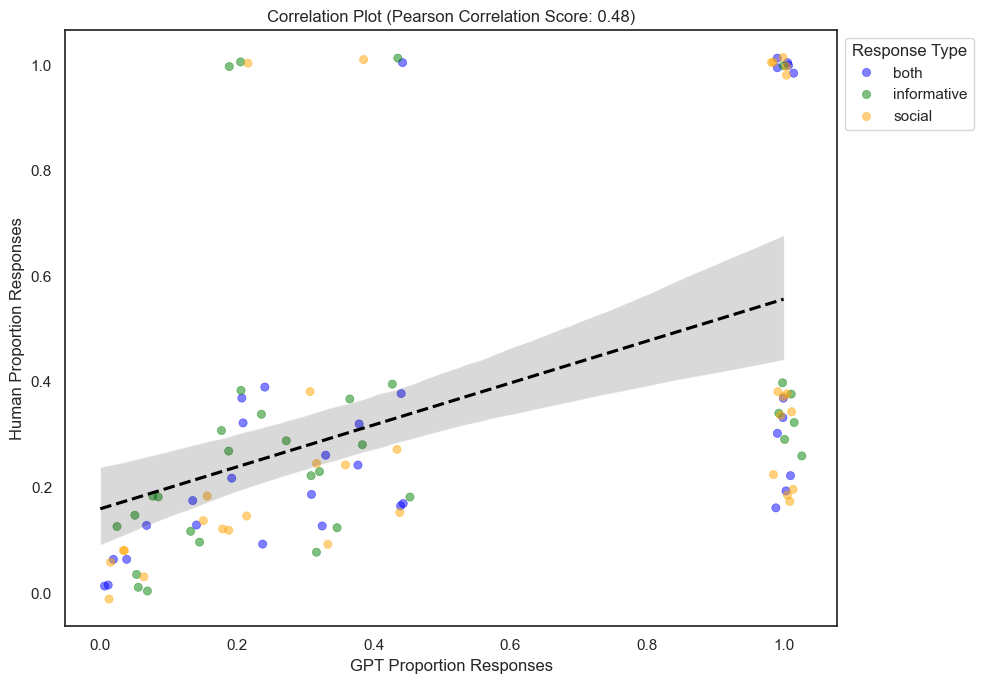

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# gpt_data = pd.read_csv("./data_for_correlation/gpt-4o_multi-choice.csv")

# proportion_gpt = gpt_data["proportation"].tolist()

# df_human_sorted = pd.read_csv("../../results/human_data_grouped_finalized_sorted.csv")

# proportion_human = df_human_sorted["proportation"].tolist()

# Data
list_1 = proportion_llama_log_normalized[0:32] + proportion_llama_log_normalized[64:]
list_2 = proportion_human_log_normalized

# Calculate Spearman correlation
correlation, _ = pearsonr(list_1, list_2)

# Split data for coloring
n = len(list_1)
split_1 = n // 3
split_2 = 2 * split_1

# Colors for different segments
colors = ['blue', 'green', 'orange']
categories = ['both'] * split_1 + ['informative'] * (split_2 - split_1) + ['social'] * (n - split_2)

# Create DataFrame for Seaborn
data = pd.DataFrame({
    'LLM_proportion': list_1,
    'Human_proportion': list_2,
    'Category': categories
})

# Apply jitter function
def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

data['LLM_proportion_jittered'] = jitter(data['LLM_proportion'])
data['Human_proportion_jittered'] = jitter(data['Human_proportion'])

plt.figure(figsize=(10, 7))
plt.tick_params(axis='x',direction='out', length=6, width=1)
plt.tick_params(axis='y', direction='out', length=6, width=1)
sns.set(style="white")

# Scatter plot with jittered data and adjusted alpha, smaller size
sns.scatterplot(
    data=data, x='LLM_proportion_jittered', y='Human_proportion_jittered', 
    hue='Category', palette=colors, s=35, alpha=0.5, edgecolor=None
)

# Add regplot for fitted line without jitter
sns.regplot(
    x='LLM_proportion', y='Human_proportion', data=data, scatter=False, 
    color="black", line_kws={"linestyle": "--"}
)


# plt.minorticks_on()

# plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Title and labels
plt.title(f"Correlation Plot (Pearson Correlation Score: {correlation:.2f})")
plt.xlabel("GPT Proportion Responses")
plt.ylabel("Human Proportion Responses")

# Display legend with title
plt.legend(title="Response Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


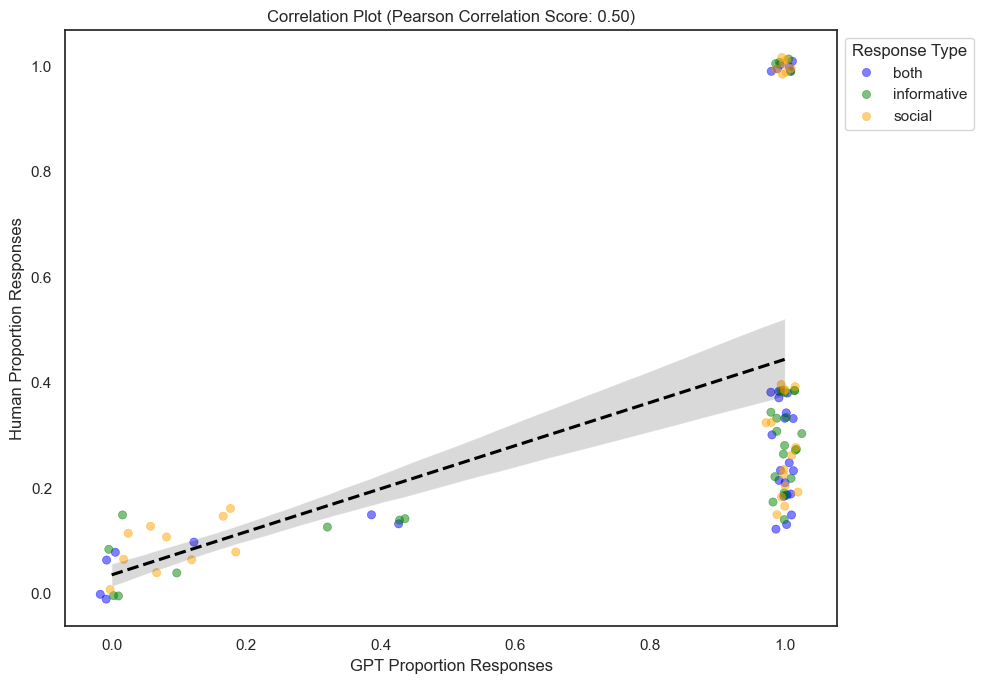

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# gpt_data = pd.read_csv("./data_for_correlation/gpt-4o_multi-choice.csv")

# proportion_gpt = gpt_data["proportation"].tolist()

# df_human_sorted = pd.read_csv("../../results/human_data_grouped_finalized_sorted.csv")

# proportion_human = df_human_sorted["proportation"].tolist()

# Data
list_1 = proportion_gpt_log_normalized[0:32] + proportion_gpt_log_normalized[64:]
list_2 = proportion_human_log_normalized

# Calculate Spearman correlation
correlation, _ = pearsonr(list_1, list_2)

# Split data for coloring
n = len(list_1)
split_1 = n // 3
split_2 = 2 * split_1

# Colors for different segments
colors = ['blue', 'green', 'orange']
categories = ['both'] * split_1 + ['informative'] * (split_2 - split_1) + ['social'] * (n - split_2)

# Create DataFrame for Seaborn
data = pd.DataFrame({
    'LLM_proportion': list_1,
    'Human_proportion': list_2,
    'Category': categories
})

# Apply jitter function
def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

data['LLM_proportion_jittered'] = jitter(data['LLM_proportion'])
data['Human_proportion_jittered'] = jitter(data['Human_proportion'])

plt.figure(figsize=(10, 7))
plt.tick_params(axis='x',direction='out', length=6, width=1)
plt.tick_params(axis='y', direction='out', length=6, width=1)
sns.set(style="white")

# Scatter plot with jittered data and adjusted alpha, smaller size
sns.scatterplot(
    data=data, x='LLM_proportion_jittered', y='Human_proportion_jittered', 
    hue='Category', palette=colors, s=35, alpha=0.5, edgecolor=None
)

# Add regplot for fitted line without jitter
sns.regplot(
    x='LLM_proportion', y='Human_proportion', data=data, scatter=False, 
    color="black", line_kws={"linestyle": "--"}
)


# plt.minorticks_on()

# plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Title and labels
plt.title(f"Correlation Plot (Pearson Correlation Score: {correlation:.2f})")
plt.xlabel("GPT Proportion Responses")
plt.ylabel("Human Proportion Responses")

# Display legend with title
plt.legend(title="Response Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


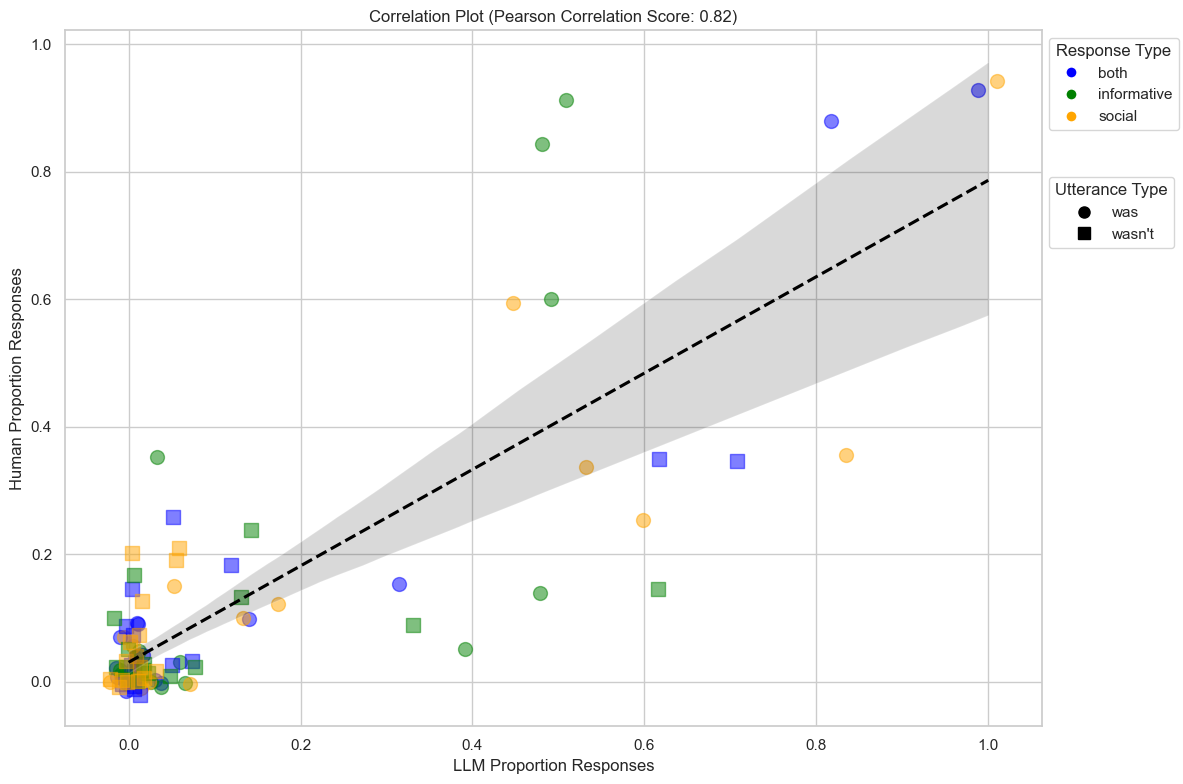

In [2755]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
# Create custom legend
from matplotlib.lines import Line2D

# Data
list_1 = proportion_llm[0:32] + proportion_llm[64:]
list_2 = proportion_human

# Calculate Spearman correlation
correlation, _ = pearsonr(list_1, list_2)

# Split data for categories
n = len(list_1)
split_1 = n // 3
split_2 = 2 * split_1

# Create categories
categories = ['both'] * split_1 + ['informative'] * (split_2 - split_1) + ['social'] * (n - split_2)

# Create utterance types
utterance_types = []
# For 'both' category
utterance_types.extend(['was'] * (split_1//2))
utterance_types.extend(['wasn\'t'] * (split_1//2))
# For 'informative' category
utterance_types.extend(['was'] * ((split_2-split_1)//2))
utterance_types.extend(['wasn\'t'] * ((split_2-split_1)//2))
# For 'social' category
utterance_types.extend(['was'] * ((n-split_2)//2))
utterance_types.extend(['wasn\'t'] * ((n-split_2)//2))

# Create DataFrame
data = pd.DataFrame({
    'LLM_proportion': list_1,
    'Human_proportion': list_2,
    'Category': categories,
    'Utterance_type': utterance_types
})

# Apply jitter
def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

data['LLM_proportion_jittered'] = jitter(data['LLM_proportion'])
data['Human_proportion_jittered'] = jitter(data['Human_proportion'])

# Create plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create scatter plot for each utterance type
markers = {'was': 'o', 'wasn\'t': 's'}
for utterance in ['was', 'wasn\'t']:
    for category, color in zip(['both', 'informative', 'social'], ['blue', 'green', 'orange']):
        mask = (data['Category'] == category) & (data['Utterance_type'] == utterance)
        plt.scatter(
            data.loc[mask, 'LLM_proportion_jittered'],
            data.loc[mask, 'Human_proportion_jittered'],
            c=color,
            marker=markers[utterance],
            s=100,
            alpha=0.5,
            label=f'{category} ({utterance})'
        )

# Add regplot for fitted line
sns.regplot(
    x='LLM_proportion', y='Human_proportion', data=data, scatter=False,
    color="black", line_kws={"linestyle": "--"}
)

# Title and labels
plt.title(f"Correlation Plot (Pearson Correlation Score: {correlation:.2f})")
plt.xlabel("LLM Proportion Responses")
plt.ylabel("Human Proportion Responses")

# Create legend elements for categories
category_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, label=l, markersize=8)
                    for c, l in zip(['blue', 'green', 'orange'], ['both', 'informative', 'social'])]

# Create legend elements for utterance types
utterance_elements = [Line2D([0], [0], marker=m, color='black', label=l, markersize=8, linestyle='None')
                     for m, l in zip(['o', 's'], ['was', 'wasn\'t'])]

# Add two separate legends
first_legend = plt.legend(handles=category_elements, title="Response Type", 
                         loc="upper left", bbox_to_anchor=(1, 1))
plt.gca().add_artist(first_legend)
plt.legend(handles=utterance_elements, title="Utterance Type", 
          loc="upper left", bbox_to_anchor=(1, 0.8))

plt.tight_layout()
plt.show()

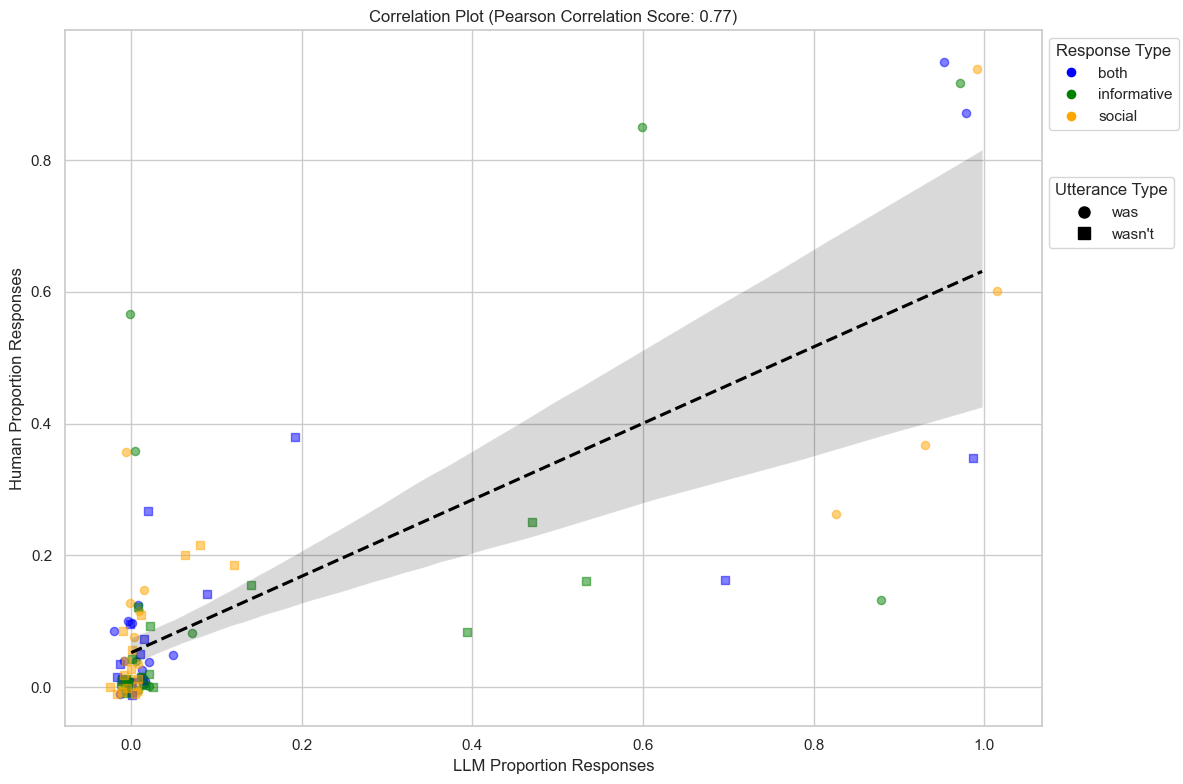

In [2522]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import pandas as pd

# Data
list_1 = proportion_llm[0:32] + proportion_llm[64:]
list_2 = proportion_human

# Calculate Spearman correlation
correlation, _ = pearsonr(list_1, list_2)

# Split data for categories
n = len(list_1)
split_1 = n // 3
split_2 = 2 * split_1

# Create categories
categories = ['both'] * split_1 + ['informative'] * (split_2 - split_1) + ['social'] * (n - split_2)

# Create utterance types
utterance_types = []
# For 'both' category
utterance_types.extend(['was'] * (split_1//2))
utterance_types.extend(['wasn\'t'] * (split_1//2))
# For 'informative' category
utterance_types.extend(['was'] * ((split_2-split_1)//2))
utterance_types.extend(['wasn\'t'] * ((split_2-split_1)//2))
# For 'social' category
utterance_types.extend(['was'] * ((n-split_2)//2))
utterance_types.extend(['wasn\'t'] * ((n-split_2)//2))

# Create DataFrame
data = pd.DataFrame({
    'LLM_proportion': list_1,
    'Human_proportion': list_2,
    'Category': categories,
    'Utterance_type': utterance_types
})

# Apply jitter
def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

data['LLM_proportion_jittered'] = jitter(data['LLM_proportion'])
data['Human_proportion_jittered'] = jitter(data['Human_proportion'])

# Create plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create scatter plot for each utterance type
markers = {'was': 'o', 'wasn\'t': 's'}
for utterance in ['was', 'wasn\'t']:
    for category, color in zip(['both', 'informative', 'social'], ['blue', 'green', 'orange']):
        mask = (data['Category'] == category) & (data['Utterance_type'] == utterance)
        plt.scatter(
            data.loc[mask, 'LLM_proportion_jittered'],
            data.loc[mask, 'Human_proportion_jittered'],
            c=color,
            marker=markers[utterance],
            s=35,
            alpha=0.5,
            label=f'{category} ({utterance})'
        )

# Add regplot for fitted line
sns.regplot(
    x='LLM_proportion', y='Human_proportion', data=data, scatter=False,
    color="black", line_kws={"linestyle": "--"}
)

# Title and labels
plt.title(f"Correlation Plot (Pearson Correlation Score: {correlation:.2f})")
plt.xlabel("LLM Proportion Responses")
plt.ylabel("Human Proportion Responses")

# Create custom legend
from matplotlib.lines import Line2D

# Create legend elements for categories
category_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, label=l, markersize=8)
                    for c, l in zip(['blue', 'green', 'orange'], ['both', 'informative', 'social'])]

# Create legend elements for utterance types
utterance_elements = [Line2D([0], [0], marker=m, color='black', label=l, markersize=8, linestyle='None')
                     for m, l in zip(['o', 's'], ['was', 'wasn\'t'])]

# Add two separate legends
first_legend = plt.legend(handles=category_elements, title="Response Type", 
                         loc="upper left", bbox_to_anchor=(1, 1))
plt.gca().add_artist(first_legend)
plt.legend(handles=utterance_elements, title="Utterance Type", 
          loc="upper left", bbox_to_anchor=(1, 0.8))

plt.tight_layout()
plt.show()

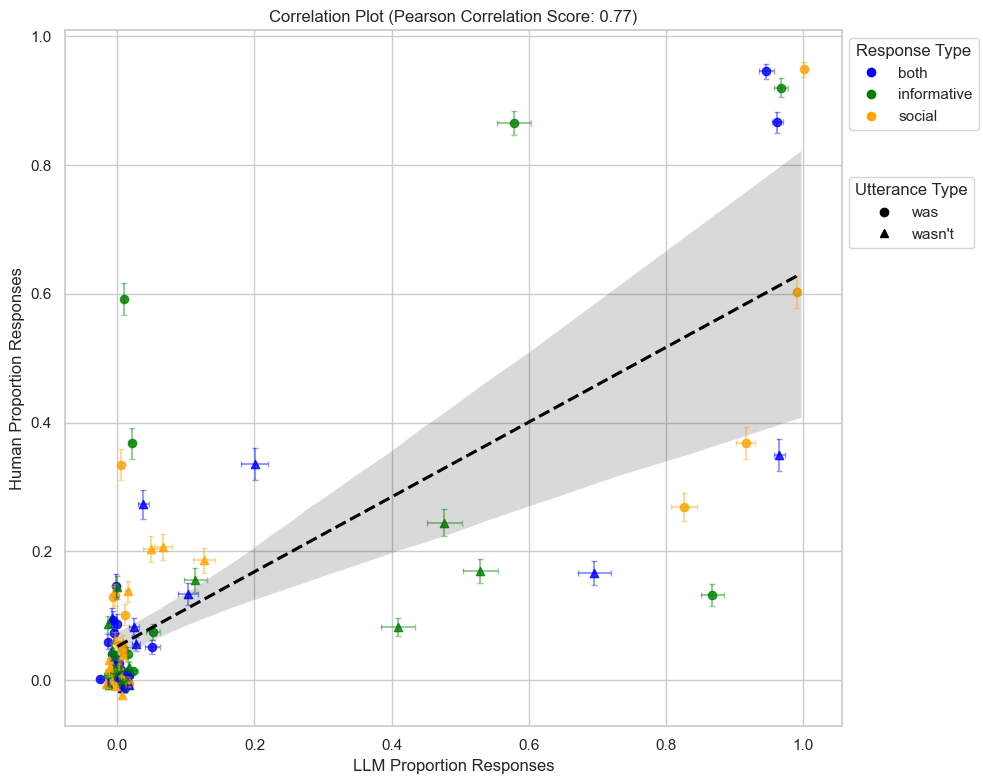

In [2523]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
# Create custom legend
from matplotlib.lines import Line2D

# Data
list_1 = proportion_llm[0:32] + proportion_llm[64:]
list_2 = proportion_human

# Calculate standard errors (assuming n=100 for each point - adjust this to your actual n)
n = 390  # replace with your actual sample size
se_llm = np.sqrt((np.array(list_1) * (1 - np.array(list_1))) / n)
se_human = np.sqrt((np.array(list_2) * (1 - np.array(list_2))) / n)

# Calculate Spearman correlation
correlation, _ = pearsonr(list_1, list_2)

# Split data for categories
n_samples = len(list_1)
split_1 = n_samples // 3
split_2 = 2 * split_1

# Create categories
categories = ['both'] * split_1 + ['informative'] * (split_2 - split_1) + ['social'] * (n_samples - split_2)

# Create utterance types
utterance_types = []
# For 'both' category
utterance_types.extend(['was'] * (split_1//2))
utterance_types.extend(['wasn\'t'] * (split_1//2))
# For 'informative' category
utterance_types.extend(['was'] * ((split_2-split_1)//2))
utterance_types.extend(['wasn\'t'] * ((split_2-split_1)//2))
# For 'social' category
utterance_types.extend(['was'] * ((n_samples-split_2)//2))
utterance_types.extend(['wasn\'t'] * ((n_samples-split_2)//2))

# Create DataFrame
data = pd.DataFrame({
    'LLM_proportion': list_1,
    'Human_proportion': list_2,
    'Category': categories,
    'Utterance_type': utterance_types,
    'SE_LLM': se_llm,
    'SE_Human': se_human
})

# Apply jitter
def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

data['LLM_proportion_jittered'] = jitter(data['LLM_proportion'])
data['Human_proportion_jittered'] = jitter(data['Human_proportion'])

# Create plot
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Create scatter plot for each utterance type with error bars
markers = {'was': 'o', 'wasn\'t': '^'}
for utterance in ['was', 'wasn\'t']:
    for category, color in zip(['both', 'informative', 'social'], ['blue', 'green', 'orange']):
        mask = (data['Category'] == category) & (data['Utterance_type'] == utterance)
        
        # Plot points
        plt.scatter(
            data.loc[mask, 'LLM_proportion_jittered'],
            data.loc[mask, 'Human_proportion_jittered'],
            c=color,
            marker=markers[utterance],
            s=35,
            alpha=0.8,
            label=f'{category} ({utterance})'
        )
        
        # Add error bars
        plt.errorbar(
            data.loc[mask, 'LLM_proportion_jittered'],
            data.loc[mask, 'Human_proportion_jittered'],
            xerr=data.loc[mask, 'SE_LLM'],
            yerr=data.loc[mask, 'SE_Human'],
            fmt='none',  # Don't plot additional markers
            ecolor=color,
            alpha=0.4,
            capsize=2
        )

# Add regplot for fitted line
sns.regplot(
    x='LLM_proportion', y='Human_proportion', data=data, scatter=False,
    color="black", line_kws={"linestyle": "--"}
)

# Title and labels
plt.title(f"Correlation Plot (Pearson Correlation Score: {correlation:.2f})")
plt.xlabel("LLM Proportion Responses")
plt.ylabel("Human Proportion Responses")



# Create legend elements for categories
category_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, label=l, markersize=8)
                    for c, l in zip(['blue', 'green', 'orange'], ['both', 'informative', 'social'])]

# Create legend elements for utterance types
utterance_elements = [Line2D([0], [0], marker=m, color='black', label=l, markersize=6, linestyle='None')
                     for m, l in zip(['o', '^'], ['was', 'wasn\'t'])]

# Add two separate legends
first_legend = plt.legend(handles=category_elements, title="Response Type", 
                         loc="upper left", bbox_to_anchor=(1, 1))
plt.gca().add_artist(first_legend)
plt.legend(handles=utterance_elements, title="Utterance Type", 
          loc="upper left", bbox_to_anchor=(1, 0.8))

plt.tight_layout()
plt.show()

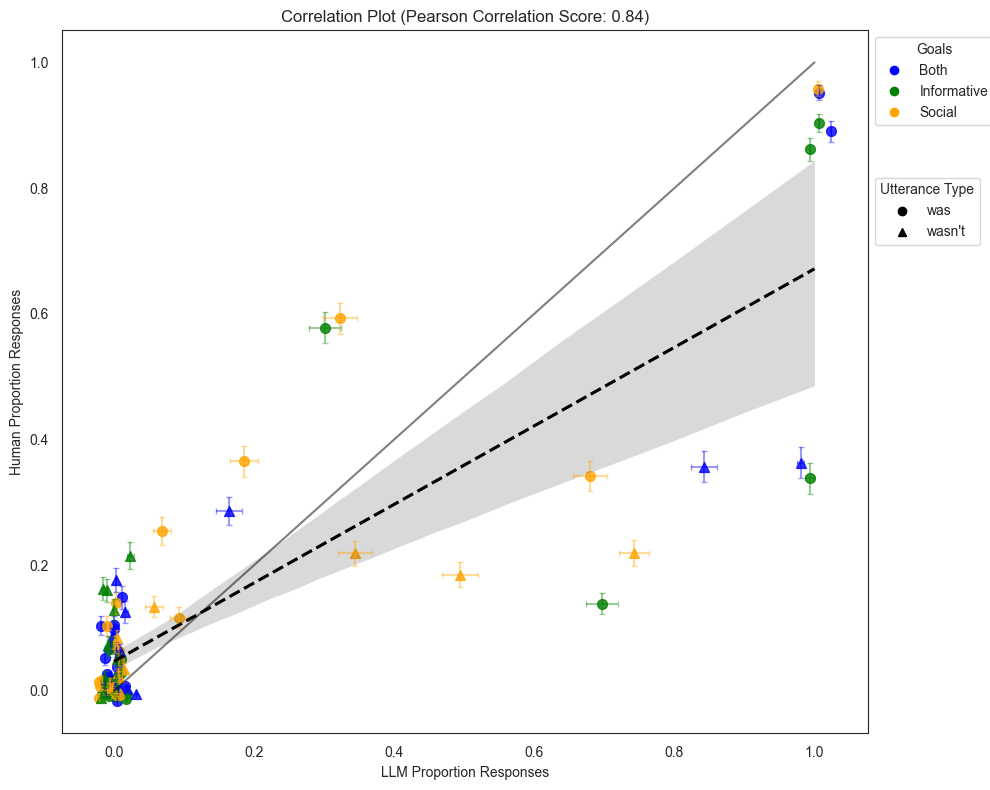

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
# Create custom legend
from matplotlib.lines import Line2D

gpt_data = pd.read_csv("./data_for_correlation/gpt-4o_multi-choice.csv")

proportion_gpt = gpt_data["proportation"].tolist()

df_human_sorted = pd.read_csv("../../results/human_data_grouped_finalized_sorted.csv")

proportion_human = df_human_sorted["proportation"].tolist()

# Data
list_1 = proportion_gpt[0:32] + proportion_gpt[64:]
list_2 = proportion_human

# Calculate standard errors (assuming n=100 for each point - adjust this to your actual n)
n = 390  # replace with your actual sample size
se_llm = np.sqrt((np.array(list_1) * (1 - np.array(list_1))) / n)
se_human = np.sqrt((np.array(list_2) * (1 - np.array(list_2))) / n)

# Calculate Spearman correlation
correlation, _ = pearsonr(list_1, list_2)

# Split data for categories
n_samples = len(list_1)
split_1 = n_samples // 3
split_2 = 2 * split_1

# Create categories
categories = ['both'] * split_1 + ['informative'] * (split_2 - split_1) + ['social'] * (n_samples - split_2)

# Create utterance types
utterance_types = []
# For 'both' category
utterance_types.extend(['was'] * (split_1//2))
utterance_types.extend(['wasn\'t'] * (split_1//2))
# For 'informative' category
utterance_types.extend(['was'] * ((split_2-split_1)//2))
utterance_types.extend(['wasn\'t'] * ((split_2-split_1)//2))
# For 'social' category
utterance_types.extend(['was'] * ((n_samples-split_2)//2))
utterance_types.extend(['wasn\'t'] * ((n_samples-split_2)//2))

# Create DataFrame
data = pd.DataFrame({
    'LLM_proportion': list_1,
    'Human_proportion': list_2,
    'Category': categories,
    'Utterance_type': utterance_types,
    'SE_LLM': se_llm,
    'SE_Human': se_human
})

# Apply jitter
def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

data['LLM_proportion_jittered'] = jitter(data['LLM_proportion'])
data['Human_proportion_jittered'] = jitter(data['Human_proportion'])
plt.figure(figsize=(10, 8))
plt.tick_params(axis='x',direction='out', length=6, width=1)
plt.tick_params(axis='y', direction='out', length=6, width=1)
sns.set_style("white")  # Remove grid

# Create scatter plot for each utterance type with error bars
markers = {'was': 'o', 'wasn\'t': '^'}
for utterance in ['was', 'wasn\'t']:
    for category, color in zip(['both', 'informative', 'social'], ['blue', 'green', 'orange']):
        mask = (data['Category'] == category) & (data['Utterance_type'] == utterance)
        
        # Plot points
        plt.scatter(
            data.loc[mask, 'LLM_proportion_jittered'],
            data.loc[mask, 'Human_proportion_jittered'],
            c=color,
            marker=markers[utterance],
            s=50,
            alpha=0.8,
            label=f'{category} ({utterance})'
        )
        
        # Add error bars
        plt.errorbar(
            data.loc[mask, 'LLM_proportion_jittered'],
            data.loc[mask, 'Human_proportion_jittered'],
            xerr=data.loc[mask, 'SE_LLM'],
            yerr=data.loc[mask, 'SE_Human'],
            fmt='none',
            ecolor=color,
            alpha=0.4,
            capsize=2
        )

# Add x=y line
plt.plot([0, 1], [0, 1], 'k-', alpha=0.5)

# Add regplot for fitted line
sns.regplot(
    x='LLM_proportion', y='Human_proportion', data=data, scatter=False,
    color="black", line_kws={"linestyle": "--"}
)

# Title and labels
plt.title(f"Correlation Plot (Pearson Correlation Score: {correlation:.2f})")
plt.xlabel("LLM Proportion Responses")
plt.ylabel("Human Proportion Responses")



# Create legend elements for categories
category_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, label=l, markersize=8)
                    for c, l in zip(['blue', 'green', 'orange'], ['Both', 'Informative', 'Social'])]

# Create legend elements for utterance types
utterance_elements = [Line2D([0], [0], marker=m, color='black', label=l, markersize=6, linestyle='None')
                     for m, l in zip(['o', '^'], ['was', 'wasn\'t'])]

# Add two separate legends
first_legend = plt.legend(handles=category_elements, title="Goals", 
                         loc="upper left", bbox_to_anchor=(1, 1))
plt.gca().add_artist(first_legend)
plt.legend(handles=utterance_elements, title="Utterance Type", 
          loc="upper left", bbox_to_anchor=(1, 0.8))

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
from matplotlib.lines import Line2D

import pandas as pd

gpt_data = pd.read_csv("./data_for_correlation/gpt-4o_multi-choice.csv")

proportion_gpt = gpt_data["proportation"].tolist()

llama_data = pd.read_csv("./data_for_correlation/Llama-3.3-70B-Instruct_multi-choice_persona.csv")

proportion_llama = llama_data["proportation"].tolist()

qwen_data = pd.read_csv("./data_for_correlation/Qwen2.5-72B_multi-choice.csv")

proportion_qwen = qwen_data["proportation"].tolist()

qwen_instruct_data = pd.read_csv("./data_for_correlation/Qwen2.5-72B-Instruct_multi-choice.csv")

proportion_qwen_instruct = qwen_instruct_data["proportation"].tolist()

df_human_sorted = pd.read_csv("../../results/human_data_grouped_finalized_sorted.csv")

proportion_human = df_human_sorted["proportation"].tolist()

def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

def create_correlation_plot(ax, list_1, list_2, model_name, show_xlabel=False, show_ylabel = False):

    # Calculate standard errors
    n = 390
    se_llm = np.sqrt((np.array(list_1) * (1 - np.array(list_1))) / n)
    se_human = np.sqrt((np.array(list_2) * (1 - np.array(list_2))) / n)
    
    # Calculate correlation
    correlation, _ = pearsonr(list_1, list_2)
    
    # Split data for categories
    n_samples = len(list_1)
    split_1 = n_samples // 3
    split_2 = 2 * split_1
    
    # Create categories and utterance types
    categories = ['both'] * split_1 + ['informative'] * (split_2 - split_1) + ['social'] * (n_samples - split_2)
    
    utterance_types = []
    utterance_types.extend(['was'] * (split_1//2))
    utterance_types.extend(['wasn\'t'] * (split_1//2))
    utterance_types.extend(['was'] * ((split_2-split_1)//2))
    utterance_types.extend(['wasn\'t'] * ((split_2-split_1)//2))
    utterance_types.extend(['was'] * ((n_samples-split_2)//2))
    utterance_types.extend(['wasn\'t'] * ((n_samples-split_2)//2))
    
    # Create DataFrame
    data = pd.DataFrame({
        'LLM_proportion': list_1,
        'Human_proportion': list_2,
        'Category': categories,
        'Utterance_type': utterance_types,
        'SE_LLM': se_llm,
        'SE_Human': se_human
    })
    
    # Apply jitter
    data['LLM_proportion_jittered'] = jitter(data['LLM_proportion'])
    data['Human_proportion_jittered'] = jitter(data['Human_proportion'])
    
    ax.tick_params(axis='x',direction='out', length=6, width=1)
    ax.tick_params(axis='y', direction='out', length=6, width=1)
    sns.set_style("white")  # Remove grid

    # Create scatter plot
    markers = {'was': 'o', 'wasn\'t': '^'}
    for utterance in ['was', 'wasn\'t']:
        for category, color in zip(['both', 'informative', 'social'], ['blue', 'magenta', 'orange']):
            mask = (data['Category'] == category) & (data['Utterance_type'] == utterance)
            
            ax.scatter(
                data.loc[mask, 'LLM_proportion_jittered'],
                data.loc[mask, 'Human_proportion_jittered'],
                c=color,
                marker=markers[utterance],
                s=50,
                alpha=0.8
            )
            
            ax.errorbar(
                data.loc[mask, 'LLM_proportion_jittered'],
                data.loc[mask, 'Human_proportion_jittered'],
                xerr=data.loc[mask, 'SE_LLM'],
                yerr=data.loc[mask, 'SE_Human'],
                fmt='none',
                ecolor="gray",
                alpha=0.4,
                capsize=2
            )
    
    # Add x=y line
    ax.plot([0, 1], [0, 1], 'k-', alpha=0.5)
    
    # Add regplot
    sns.regplot(
        x='LLM_proportion', y='Human_proportion', data=data, scatter=False,
        color="black", line_kws={"linestyle": "--"}, ax=ax
    )

    
    ax.set_title(f"{model_name}\nCorrelation Coefficient: {correlation:.2f}")
    # ax.set_xlabel("LLM Proportion Responses")
    # ax.set_ylabel("Human Proportion Responses")
    if show_xlabel:
        ax.set_xlabel("LLM Proportion Responses")
    else:
        ax.set_xlabel("")
    
    if show_ylabel:
        ax.set_ylabel("Human Proportion Responses")
    else:
        ax.set_ylabel("")

# Create main figure
plt.figure(figsize=(20, 16))


sns.set_style("white")

# Create subplots
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)


# Create plots for each model
create_correlation_plot(ax1, proportion_gpt[0:32] + proportion_gpt[64:], proportion_human, "GPT-4o multi-choice-original",show_ylabel = True)
create_correlation_plot(ax2, proportion_llama[0:32] + proportion_llama[64:], proportion_human, "Llama-3.3-70B-Instruct multi-choice-persona")
create_correlation_plot(ax3, proportion_qwen[0:32] + proportion_qwen[64:], proportion_human, "Qwen2.5-72B multi-choice-original", show_xlabel=True, show_ylabel = True)
create_correlation_plot(ax4, proportion_qwen_instruct[0:32] + proportion_qwen_instruct[64:], proportion_human, "QWen2.5-72B-Instruct multi-choice-original", show_xlabel=True)

# Create legend elements
category_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, label=l, markersize=8)
                    for c, l in zip(['blue', 'magenta', 'orange'], ['Both', 'Informative', 'Social'])]

utterance_elements = [Line2D([0], [0], marker=m, color='black', label=l, markersize=6, linestyle='None')
                     for m, l in zip(['o', '^'], ['was', 'wasn\'t'])]

# Add legends to the figure in the upper right corner
fig = plt.gcf()

# First legend
leg1 = fig.legend(handles=category_elements, title="Goals", 
                 bbox_to_anchor=(0.98, 0.98), loc='upper right')
# Second legend below the first one
fig.legend(handles=utterance_elements, title="Utterance Type", 
          bbox_to_anchor=(0.98, 0.88), loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()
# # Adjust the right margin to make room for legends
plt.subplots_adjust(right=0.9)

# save to pdf
plt.savefig("./plots/4_llms_correlation_plot.pdf", bbox_inches='tight')

plt.show()




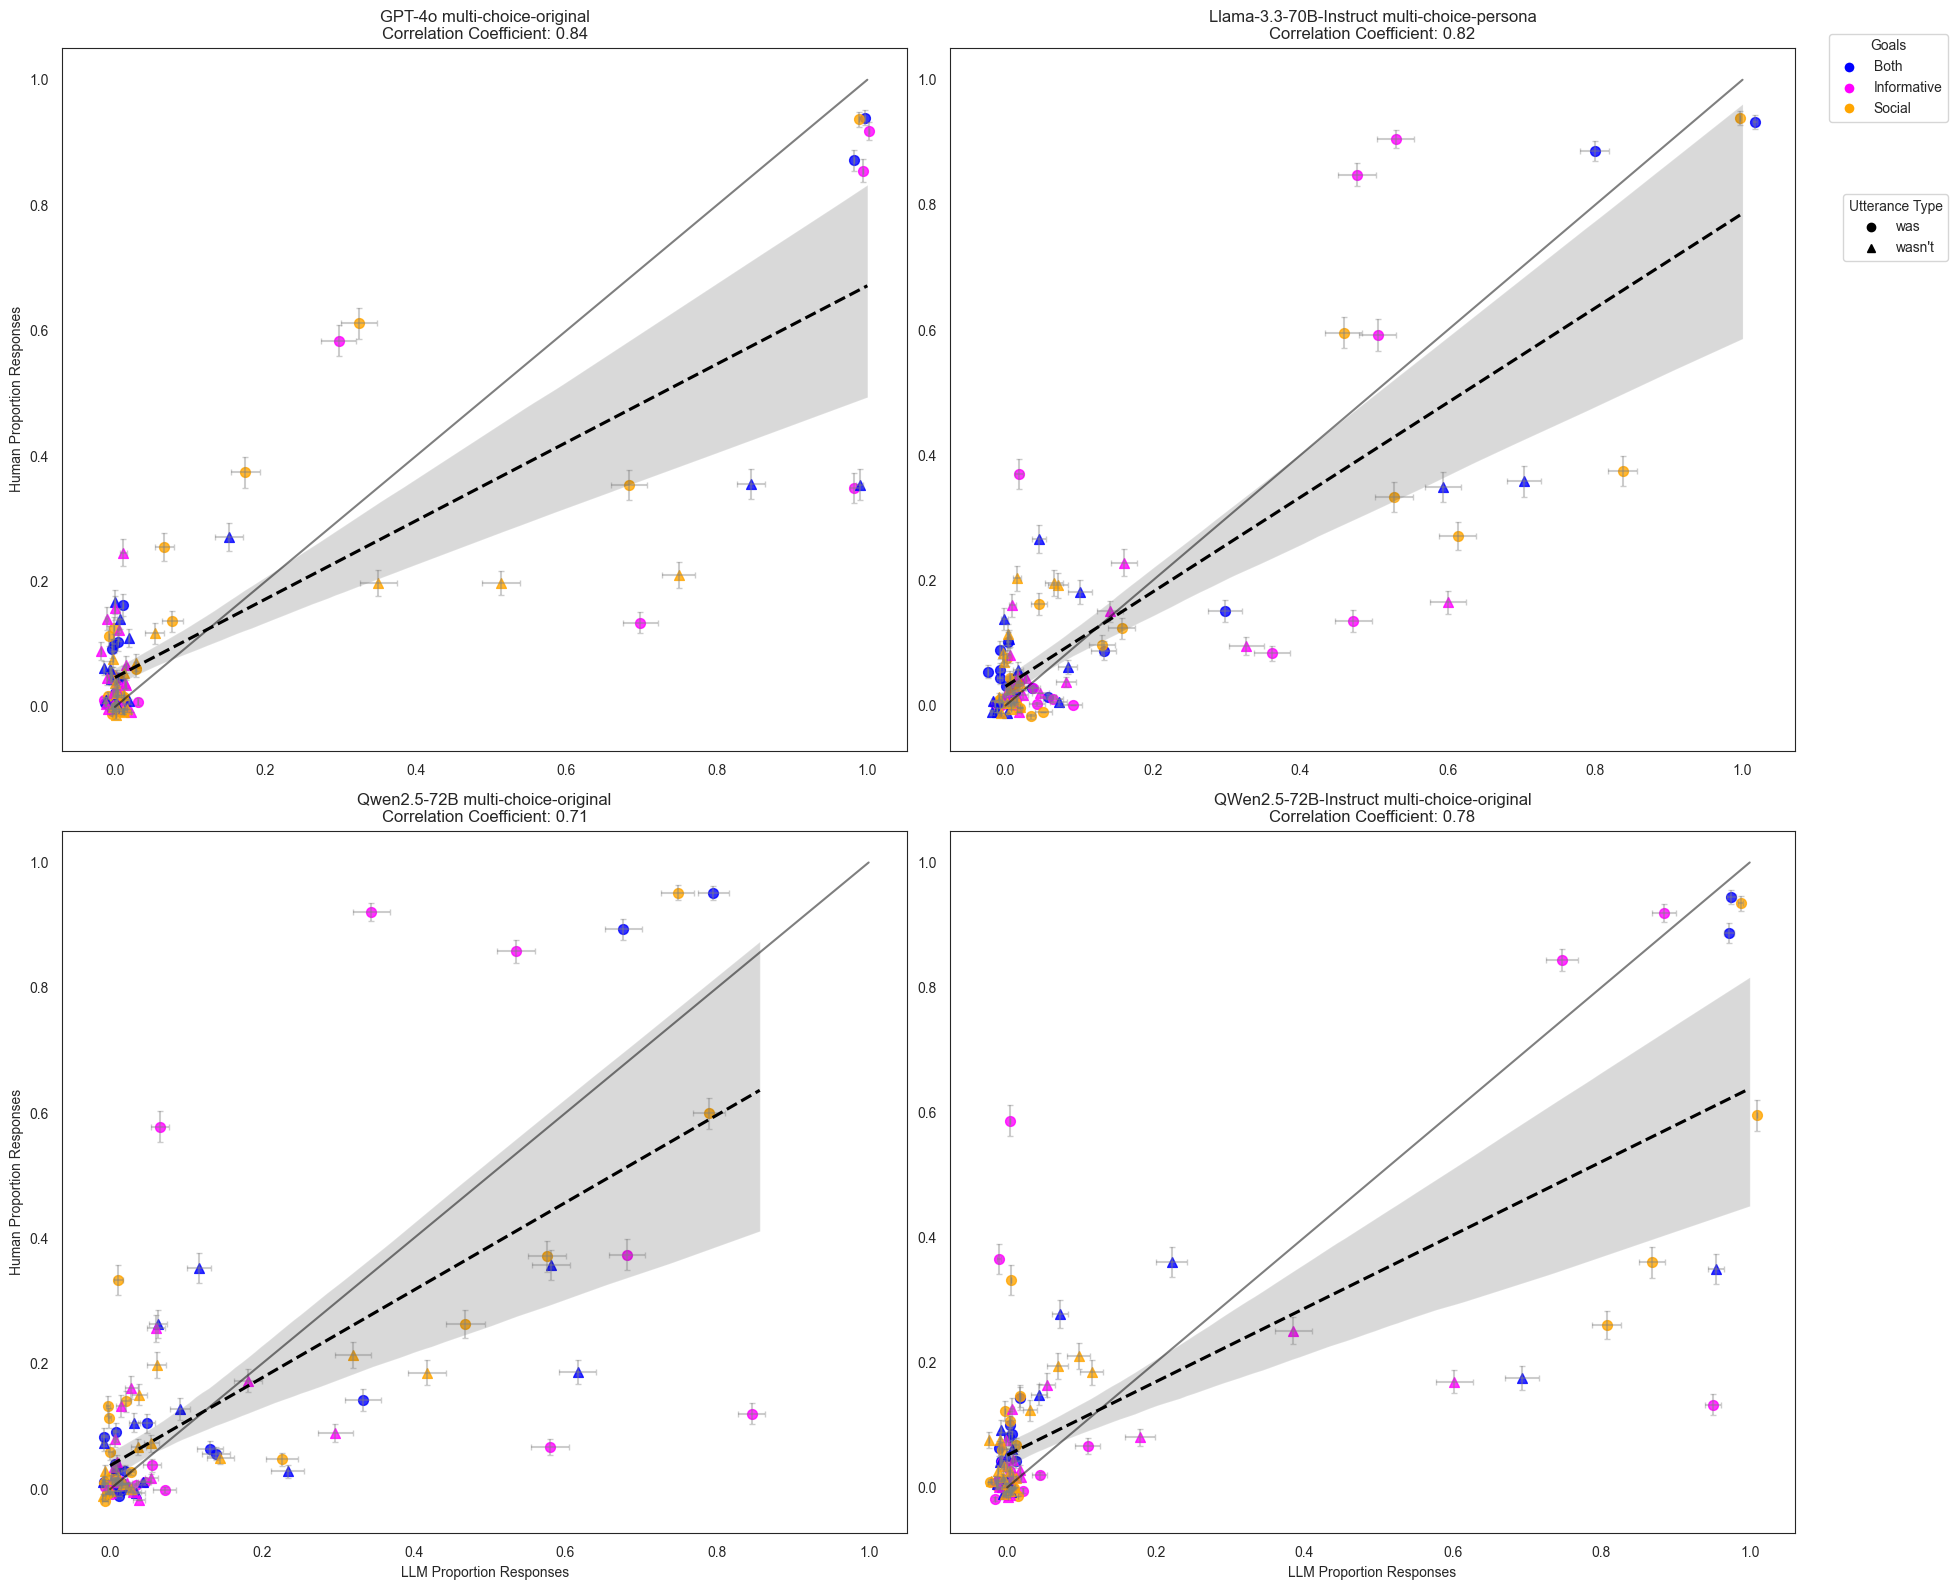

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
from matplotlib.lines import Line2D

import pandas as pd

gpt_data = pd.read_csv("./data_for_correlation/gpt-4o_multi-choice.csv")

proportion_gpt = gpt_data["proportation"].tolist()

llama_data = pd.read_csv("./data_for_correlation/Llama-3.3-70B-Instruct_multi-choice_persona.csv")

proportion_llama = llama_data["proportation"].tolist()

qwen_data = pd.read_csv("./data_for_correlation/Qwen2.5-72B_multi-choice.csv")

proportion_qwen = qwen_data["proportation"].tolist()

qwen_instruct_data = pd.read_csv("./data_for_correlation/Qwen2.5-72B-Instruct_multi-choice.csv")

proportion_qwen_instruct = qwen_instruct_data["proportation"].tolist()

df_human_sorted = pd.read_csv("../../results/human_data_grouped_finalized_sorted.csv")

proportion_human = df_human_sorted["proportation"].tolist()

def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

def create_correlation_plot(ax, list_1, list_2, model_name, show_xlabel=False, show_ylabel = False):

    # Calculate standard errors
    n = 390
    se_llm = np.sqrt((np.array(list_1) * (1 - np.array(list_1))) / n)
    se_human = np.sqrt((np.array(list_2) * (1 - np.array(list_2))) / n)
    
    # Calculate correlation
    correlation, _ = pearsonr(list_1, list_2)
    
    # Split data for categories
    n_samples = len(list_1)
    split_1 = n_samples // 3
    split_2 = 2 * split_1
    
    # Create categories and utterance types
    categories = ['both'] * split_1 + ['informative'] * (split_2 - split_1) + ['social'] * (n_samples - split_2)
    
    utterance_types = []
    utterance_types.extend(['was'] * (split_1//2))
    utterance_types.extend(['wasn\'t'] * (split_1//2))
    utterance_types.extend(['was'] * ((split_2-split_1)//2))
    utterance_types.extend(['wasn\'t'] * ((split_2-split_1)//2))
    utterance_types.extend(['was'] * ((n_samples-split_2)//2))
    utterance_types.extend(['wasn\'t'] * ((n_samples-split_2)//2))
    
    # Create DataFrame
    data = pd.DataFrame({
        'LLM_proportion': list_1,
        'Human_proportion': list_2,
        'Category': categories,
        'Utterance_type': utterance_types,
        'SE_LLM': se_llm,
        'SE_Human': se_human
    })
    
    # Apply jitter
    data['LLM_proportion_jittered'] = jitter(data['LLM_proportion'])
    data['Human_proportion_jittered'] = jitter(data['Human_proportion'])
    
    ax.tick_params(axis='x',direction='out', length=6, width=1)
    ax.tick_params(axis='y', direction='out', length=6, width=1)
    sns.set_style("white")  # Remove grid

    # Create scatter plot
    markers = {'was': 'o', 'wasn\'t': '^'}
    for utterance in ['was', 'wasn\'t']:
        for category, color in zip(['both', 'informative', 'social'], ['blue', 'magenta', 'orange']):
            mask = (data['Category'] == category) & (data['Utterance_type'] == utterance)
            
            ax.scatter(
                data.loc[mask, 'LLM_proportion_jittered'],
                data.loc[mask, 'Human_proportion_jittered'],
                c=color,
                marker=markers[utterance],
                s=50,
                alpha=0.8
            )
            
            ax.errorbar(
                data.loc[mask, 'LLM_proportion_jittered'],
                data.loc[mask, 'Human_proportion_jittered'],
                xerr=data.loc[mask, 'SE_LLM'],
                yerr=data.loc[mask, 'SE_Human'],
                fmt='none',
                ecolor="gray",
                alpha=0.4,
                capsize=2
            )
    
    # Add x=y line
    ax.plot([0, 1], [0, 1], 'k-', alpha=0.5)
    
    # Add regplot
    sns.regplot(
        x='LLM_proportion', y='Human_proportion', data=data, scatter=False,
        color="black", line_kws={"linestyle": "--"}, ax=ax
    )

    
    ax.set_title(f"{model_name}\nCorrelation Coefficient: {correlation:.2f}")
    # ax.set_xlabel("LLM Proportion Responses")
    # ax.set_ylabel("Human Proportion Responses")
    if show_xlabel:
        ax.set_xlabel("LLM Proportion Responses")
    else:
        ax.set_xlabel("")
    
    if show_ylabel:
        ax.set_ylabel("Human Proportion Responses")
    else:
        ax.set_ylabel("")

# Create main figure
plt.figure(figsize=(20, 16))


sns.set_style("white")

# Create subplots
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)


# Create plots for each model
create_correlation_plot(ax1, proportion_gpt[0:32] + proportion_gpt[64:], proportion_human, "GPT-4o multi-choice-original",show_ylabel = True)
create_correlation_plot(ax2, proportion_llama[0:32] + proportion_llama[64:], proportion_human, "Llama-3.3-70B-Instruct multi-choice-persona")
create_correlation_plot(ax3, proportion_qwen[0:32] + proportion_qwen[64:], proportion_human, "Qwen2.5-72B multi-choice-original", show_xlabel=True, show_ylabel = True)
create_correlation_plot(ax4, proportion_qwen_instruct[0:32] + proportion_qwen_instruct[64:], proportion_human, "QWen2.5-72B-Instruct multi-choice-original", show_xlabel=True)

# Create legend elements
category_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, label=l, markersize=8)
                    for c, l in zip(['blue', 'magenta', 'orange'], ['Both', 'Informative', 'Social'])]

utterance_elements = [Line2D([0], [0], marker=m, color='black', label=l, markersize=6, linestyle='None')
                     for m, l in zip(['o', '^'], ['was', 'wasn\'t'])]

# Add legends to the figure in the upper right corner
fig = plt.gcf()

# First legend
leg1 = fig.legend(handles=category_elements, title="Goals", 
                 bbox_to_anchor=(0.98, 0.98), loc='upper right')
# Second legend below the first one
fig.legend(handles=utterance_elements, title="Utterance Type", 
          bbox_to_anchor=(0.98, 0.88), loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()
# # Adjust the right margin to make room for legends
plt.subplots_adjust(right=0.9)

# save to pdf
plt.savefig("./plots/4_llms_correlation_plot.pdf", bbox_inches='tight')

plt.show()




In [ ]:
data_sources = [
    "./data_for_correlation/gpt-4o_multi-choice.csv",
    "./data_for_correlation/Llama-3.3-70B-Instruct_multi-choice_persona.csv",
    "./data_for_correlation/Qwen2.5-72B_multi-choice.csv",
    "./data_for_correlation/Qwen2.5-72B-Instruct_multi-choice.csv"
]

In [9]:
math.log(0.48)

-0.7339691750802004

/var/folders/rd/r290740569q845dpgz6y3r840000gn/T/ipykernel_3623/2764425858.py:79: RuntimeWarning: invalid value encountered in sqrt
  se_llm = np.sqrt((np.array(list_1) * (1 - np.array(list_1))) / n)
/var/folders/rd/r290740569q845dpgz6y3r840000gn/T/ipykernel_3623/2764425858.py:80: RuntimeWarning: invalid value encountered in sqrt
  se_human = np.sqrt((np.array(list_2) * (1 - np.array(list_2))) / n)
/var/folders/rd/r290740569q845dpgz6y3r840000gn/T/ipykernel_3623/2764425858.py:79: RuntimeWarning: invalid value encountered in sqrt
  se_llm = np.sqrt((np.array(list_1) * (1 - np.array(list_1))) / n)
/var/folders/rd/r290740569q845dpgz6y3r840000gn/T/ipykernel_3623/2764425858.py:80: RuntimeWarning: invalid value encountered in sqrt
  se_human = np.sqrt((np.array(list_2) * (1 - np.array(list_2))) / n)
/var/folders/rd/r290740569q845dpgz6y3r840000gn/T/ipykernel_3623/2764425858.py:79: RuntimeWarning: invalid value encountered in sqrt
  se_llm = np.sqrt((np.array(list_1) * (1 - np.array(list_1))) /

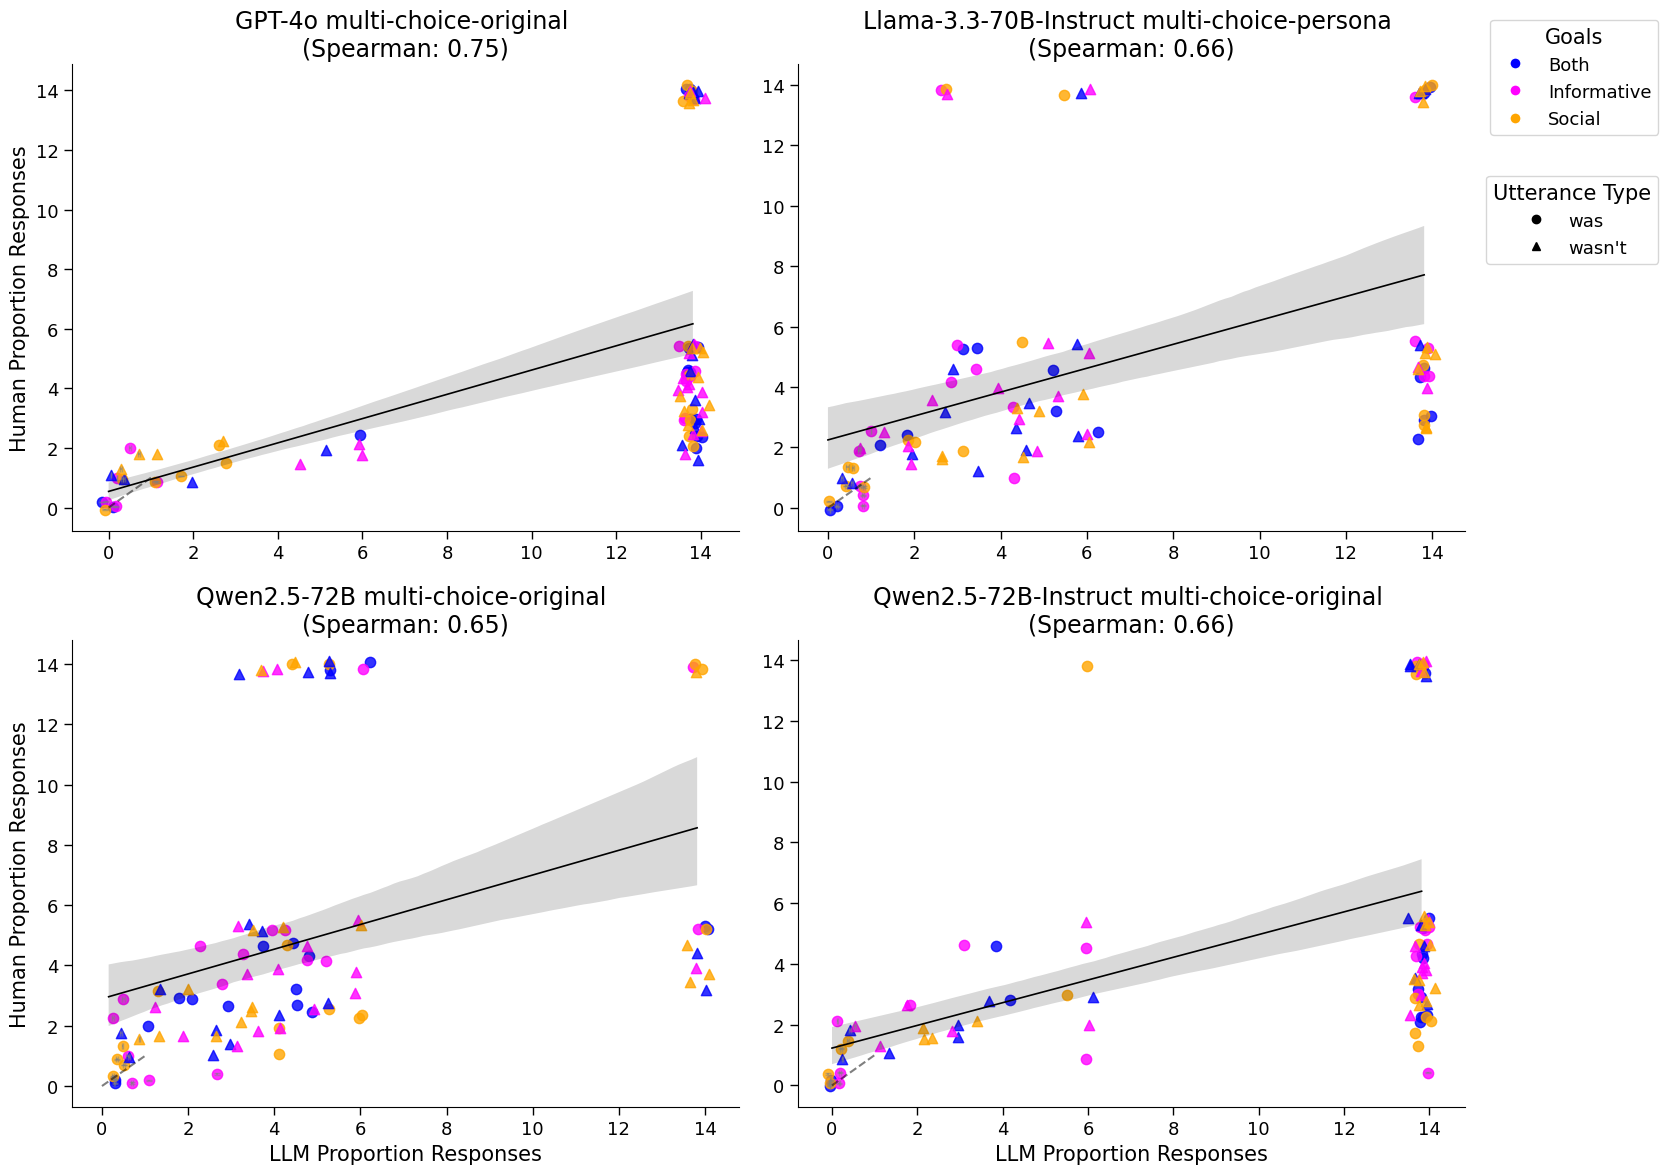

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib import rcParams
import math

# write above into a function
def normalize_log_probs(proportion):
    proportion_log = [-math.log(x+0.000001) for x in proportion]

    # proportaion_log_normalized = [(x - min(proportion_log)) / (max(proportion_log) - min(proportion_log)) for x in proportion_log]

    # return proportaion_log_normalized
    return proportion_log

# Set global font size
rcParams.update({
    'font.size': 15,           # General font size
    'axes.titlesize': 17,      # Titles of subplots
    'axes.labelsize': 15,      # Axis labels
    'xtick.labelsize': 13,     # X tick labels
    'ytick.labelsize': 13,     # Y tick labels
    'legend.fontsize': 13,     # Legend font size
    'figure.titlesize': 12     # Overall figure title size
})

# Replace these with the paths to your four different datasets
data_sources = [
    "./data_for_correlation/gpt-4o_multi-choice.csv",
    "./data_for_correlation/Llama-3.3-70B-Instruct_multi-choice_persona.csv",
    "./data_for_correlation/Qwen2.5-72B_multi-choice.csv",
    "./data_for_correlation/Qwen2.5-72B-Instruct_multi-choice.csv"
]

subplot_titles = [
    "GPT-4o multi-choice-original",
    "Llama-3.3-70B-Instruct multi-choice-persona",
    "Qwen2.5-72B multi-choice-original",
    "Qwen2.5-72B-Instruct multi-choice-original"
]

# Load all data sources
datasets = [pd.read_csv(source) for source in data_sources]

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Function to apply jitter
def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

# Store handles for the legend
category_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=c, label=l, markersize=8)
    for c, l in zip(['blue', 'magenta', 'orange'], ['Both', 'Informative', 'Social'])
]
utterance_handles = [
    Line2D([0], [0], marker=m, color='black', label=l, markersize=6, linestyle='None')
    for m, l in zip(['o', '^'], ['was', 'wasn\'t'])
]

# Iterate over datasets and create subplots
for idx, (ax, dataset) in enumerate(zip(axes.flat, datasets)):
    proportion_llm = dataset["proportation"].tolist()
    df_human_sorted = pd.read_csv("../../results/human_data_grouped_finalized_sorted.csv")
    proportion_human = df_human_sorted["proportation"].tolist()

    proportion_llm = normalize_log_probs(proportion_llm)
    proportion_human = normalize_log_probs(proportion_human)

    list_1 = proportion_llm[0:32] + proportion_llm[64:]
    list_2 = proportion_human

    n = 390  # Replace with your actual sample size
    se_llm = np.sqrt((np.array(list_1) * (1 - np.array(list_1))) / n)
    se_human = np.sqrt((np.array(list_2) * (1 - np.array(list_2))) / n)

    correlation, _ = spearmanr(list_1, list_2)

    n_samples = len(list_1)
    split_1 = n_samples // 3
    split_2 = 2 * split_1

    categories = ['both'] * split_1 + ['informative'] * (split_2 - split_1) + ['social'] * (n_samples - split_2)

    utterance_types = []
    utterance_types.extend(['was'] * (split_1 // 2))
    utterance_types.extend(['wasn\'t'] * (split_1 // 2))
    utterance_types.extend(['was'] * ((split_2 - split_1) // 2))
    utterance_types.extend(['wasn\'t'] * ((split_2 - split_1) // 2))
    utterance_types.extend(['was'] * ((n_samples - split_2) // 2))
    utterance_types.extend(['wasn\'t'] * ((n_samples - split_2) // 2))

    data = pd.DataFrame({
        'LLM_proportion': list_1,
        'Human_proportion': list_2,
        'Category': categories,
        'Utterance_type': utterance_types,
        'SE_LLM': se_llm,
        'SE_Human': se_human
    })

    data['LLM_proportion_jittered'] = jitter(data['LLM_proportion'])
    data['Human_proportion_jittered'] = jitter(data['Human_proportion'])

    markers = {'was': 'o', 'wasn\'t': '^'}
    for utterance in ['was', 'wasn\'t']:
        for category, color in zip(['both', 'informative', 'social'], ['blue', 'magenta', 'orange']):
            mask = (data['Category'] == category) & (data['Utterance_type'] == utterance)
            ax.scatter(
                data.loc[mask, 'LLM_proportion_jittered'],
                data.loc[mask, 'Human_proportion_jittered'],
                c=color,
                marker=markers[utterance],
                s=55,
                alpha=0.8
            )
            ax.errorbar(
                data.loc[mask, 'LLM_proportion_jittered'],
                data.loc[mask, 'Human_proportion_jittered'],
                xerr=data.loc[mask, 'SE_LLM'],
                yerr=data.loc[mask, 'SE_Human'],
                fmt='none',
                ecolor="gray",
                alpha=0.5,
                capsize=2
            )

    ax.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    sns.regplot(
        x='LLM_proportion', y='Human_proportion', data=data, scatter=False,
         color="black", line_kws={"linestyle": "-", "linewidth": 1.2}, ax=ax
    )

    ax.set_title(f"{subplot_titles[idx]} \n(Spearman: {correlation:.2f})")
    # Remove middle labels
    if idx % 2 == 1:  # Remove y-labels for the right column
        ax.set_ylabel("")
    else: 
        ax.set_ylabel("Human Proportion Responses")
    if idx < 2:  # Remove x-labels for the top row
        ax.set_xlabel("")
    else:
        ax.set_xlabel("LLM Proportion Responses")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # ax.set_xlim(0, 1)
    # ax.set_ylim(0, 1)
    ax.tick_params(axis='x', direction='out', length=6, width=1)
    ax.tick_params(axis='y', direction='out', length=6, width=1)

# First legend
leg1 = fig.legend(handles=category_handles, title="Goals", 
                 bbox_to_anchor=(1.12, 0.98), loc='upper right')
# Second legend below the first one
fig.legend(handles=utterance_handles, title="Utterance Type", 
          bbox_to_anchor=(1.12, 0.85), loc='upper right')


plt.tight_layout()

plt.savefig("./plots/4_llms_correlation_plot_log_probs.pdf", bbox_inches='tight')

plt.show()

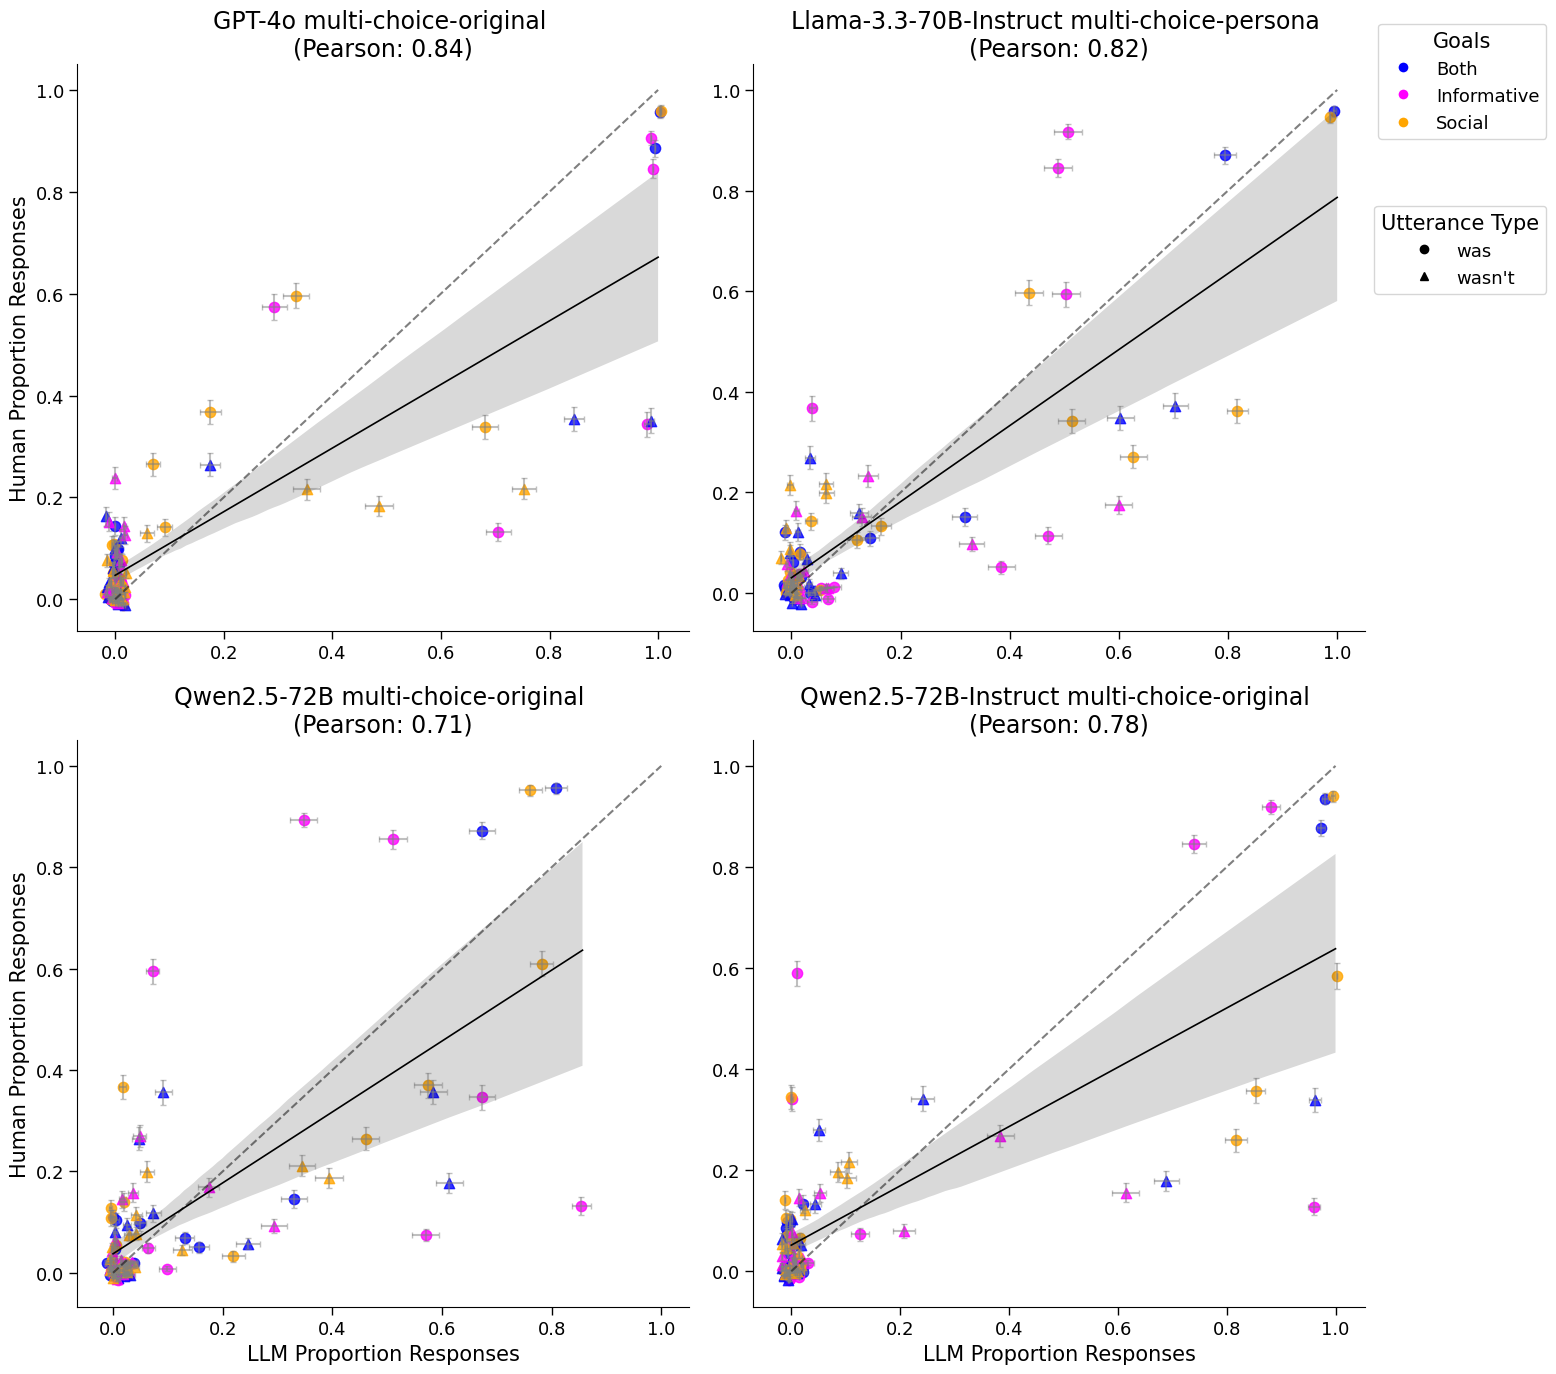

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib import rcParams
import math

# write above into a function
def normalize_log_probs(proportion):
    proportion_log = [-math.log(x+0.000001) for x in proportion]
    return [(x - min(proportion_log)) / (max(proportion_log) - min(proportion_log)) for x in proportion_log]

# Set global font size
rcParams.update({
    'font.size': 15,           # General font size
    'axes.titlesize': 17,      # Titles of subplots
    'axes.labelsize': 15,      # Axis labels
    'xtick.labelsize': 13,     # X tick labels
    'ytick.labelsize': 13,     # Y tick labels
    'legend.fontsize': 13,     # Legend font size
    'figure.titlesize': 12     # Overall figure title size
})

# Replace these with the paths to your four different datasets
data_sources = [
    "./data_for_correlation/gpt-4o_multi-choice.csv",
    "./data_for_correlation/Llama-3.3-70B-Instruct_multi-choice_persona.csv",
    "./data_for_correlation/Qwen2.5-72B_multi-choice.csv",
    "./data_for_correlation/Qwen2.5-72B-Instruct_multi-choice.csv"
]

subplot_titles = [
    "GPT-4o multi-choice-original",
    "Llama-3.3-70B-Instruct multi-choice-persona",
    "Qwen2.5-72B multi-choice-original",
    "Qwen2.5-72B-Instruct multi-choice-original"
]

# Load all data sources
datasets = [pd.read_csv(source) for source in data_sources]

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Function to apply jitter
def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

# Store handles for the legend
category_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=c, label=l, markersize=8)
    for c, l in zip(['blue', 'magenta', 'orange'], ['Both', 'Informative', 'Social'])
]
utterance_handles = [
    Line2D([0], [0], marker=m, color='black', label=l, markersize=6, linestyle='None')
    for m, l in zip(['o', '^'], ['was', 'wasn\'t'])
]

# Iterate over datasets and create subplots
for idx, (ax, dataset) in enumerate(zip(axes.flat, datasets)):
    proportion_llm = dataset["proportation"].tolist()
    df_human_sorted = pd.read_csv("../../results/human_data_grouped_finalized_sorted.csv")
    proportion_human = df_human_sorted["proportation"].tolist()

    list_1 = proportion_llm[0:32] + proportion_llm[64:]
    list_2 = proportion_human

    n = 390  # Replace with your actual sample size
    se_llm = np.sqrt((np.array(list_1) * (1 - np.array(list_1))) / n)
    se_human = np.sqrt((np.array(list_2) * (1 - np.array(list_2))) / n)

    correlation, _ = pearsonr(list_1, list_2)

    n_samples = len(list_1)
    split_1 = n_samples // 3
    split_2 = 2 * split_1

    categories = ['both'] * split_1 + ['informative'] * (split_2 - split_1) + ['social'] * (n_samples - split_2)

    utterance_types = []
    utterance_types.extend(['was'] * (split_1 // 2))
    utterance_types.extend(['wasn\'t'] * (split_1 // 2))
    utterance_types.extend(['was'] * ((split_2 - split_1) // 2))
    utterance_types.extend(['wasn\'t'] * ((split_2 - split_1) // 2))
    utterance_types.extend(['was'] * ((n_samples - split_2) // 2))
    utterance_types.extend(['wasn\'t'] * ((n_samples - split_2) // 2))

    data = pd.DataFrame({
        'LLM_proportion': list_1,
        'Human_proportion': list_2,
        'Category': categories,
        'Utterance_type': utterance_types,
        'SE_LLM': se_llm,
        'SE_Human': se_human
    })

    data['LLM_proportion_jittered'] = jitter(data['LLM_proportion'])
    data['Human_proportion_jittered'] = jitter(data['Human_proportion'])

    markers = {'was': 'o', 'wasn\'t': '^'}
    for utterance in ['was', 'wasn\'t']:
        for category, color in zip(['both', 'informative', 'social'], ['blue', 'magenta', 'orange']):
            mask = (data['Category'] == category) & (data['Utterance_type'] == utterance)
            ax.scatter(
                data.loc[mask, 'LLM_proportion_jittered'],
                data.loc[mask, 'Human_proportion_jittered'],
                c=color,
                marker=markers[utterance],
                s=55,
                alpha=0.8
            )
            ax.errorbar(
                data.loc[mask, 'LLM_proportion_jittered'],
                data.loc[mask, 'Human_proportion_jittered'],
                xerr=data.loc[mask, 'SE_LLM'],
                yerr=data.loc[mask, 'SE_Human'],
                fmt='none',
                ecolor="gray",
                alpha=0.5,
                capsize=2
            )

    ax.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    sns.regplot(
        x='LLM_proportion', y='Human_proportion', data=data, scatter=False,
         color="black", line_kws={"linestyle": "-", "linewidth": 1.2}, ax=ax
    )

    ax.set_title(f"{subplot_titles[idx]} \n(Pearson: {correlation:.2f})")
    # Remove middle labels
    if idx % 2 == 1:  # Remove y-labels for the right column
        ax.set_ylabel("")
    else: 
        ax.set_ylabel("Human Proportion Responses")
    if idx < 2:  # Remove x-labels for the top row
        ax.set_xlabel("")
    else:
        ax.set_xlabel("LLM Proportion Responses")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # ax.set_xlim(0, 1)
    # ax.set_ylim(0, 1)
    ax.tick_params(axis='x', direction='out', length=6, width=1)
    ax.tick_params(axis='y', direction='out', length=6, width=1)

# First legend
leg1 = fig.legend(handles=category_handles, title="Goals", 
                 bbox_to_anchor=(1.12, 0.98), loc='upper right')
# Second legend below the first one
fig.legend(handles=utterance_handles, title="Utterance Type", 
          bbox_to_anchor=(1.12, 0.85), loc='upper right')


plt.tight_layout()

plt.savefig("./plots/4_llms_correlation_plot.pdf", bbox_inches='tight')

plt.show()

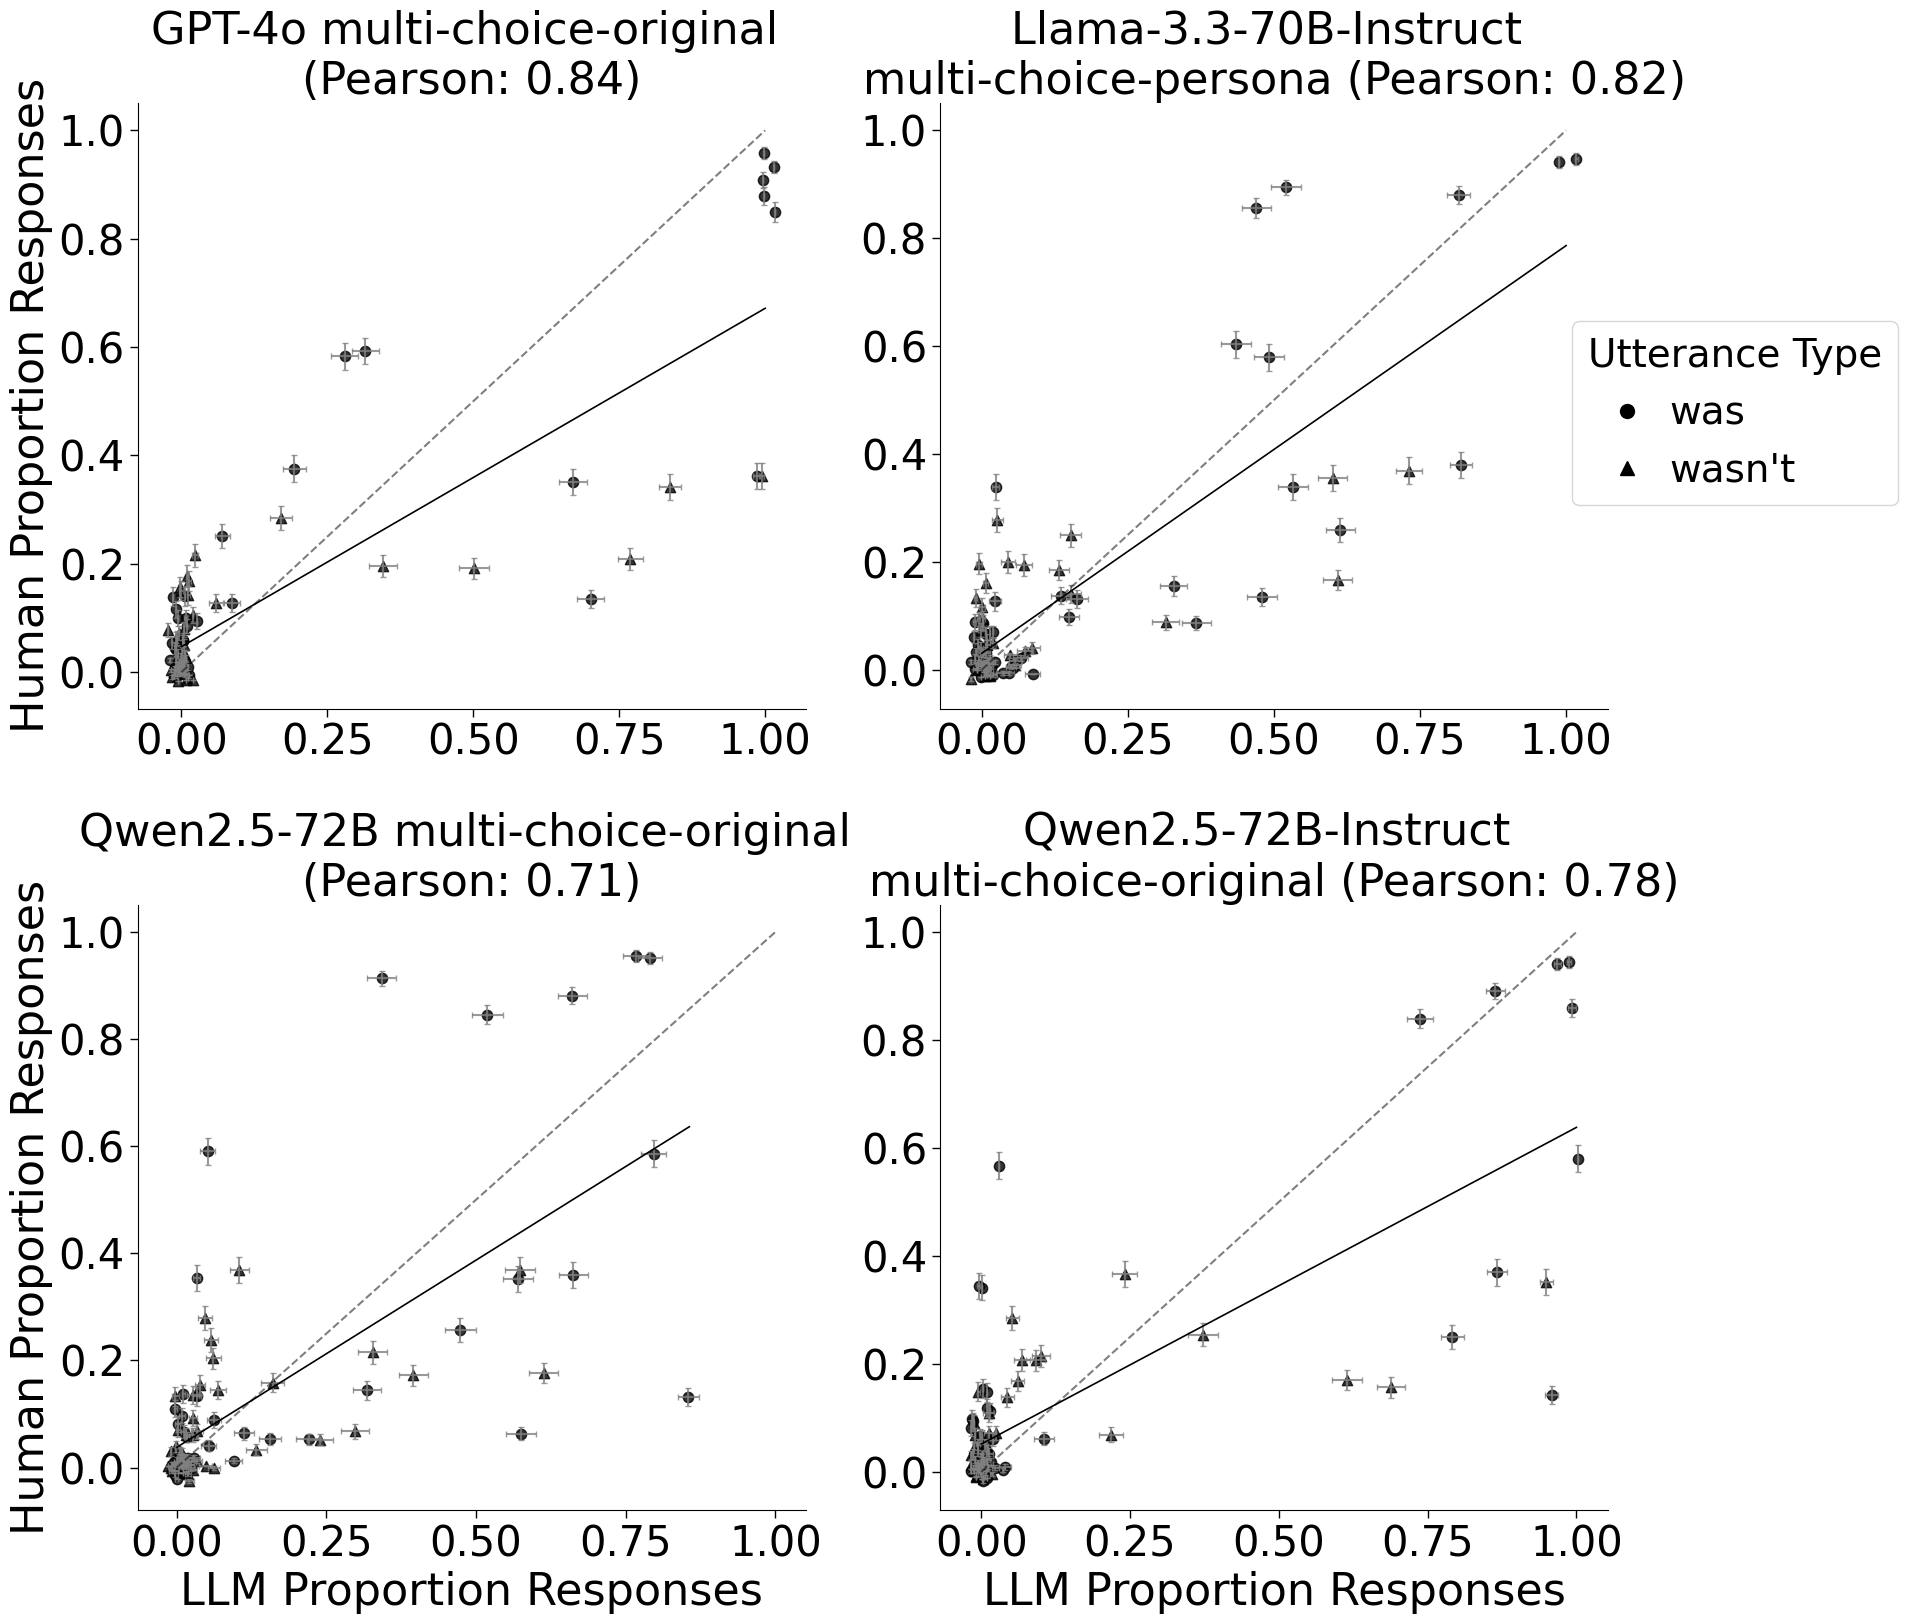

In [366]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib import rcParams
import math

# Function to normalize log probabilities
# def normalize_log_probs(proportion):
#     proportion_log = [math.log(x+1e-12) for x in proportion]
#     # return [(x - min(proportion_log)) / (max(proportion_log) - min(proportion_log)) for x in proportion_log]
#     return proportion_log

# Set global font size
rcParams.update({
    'font.size': 32,           # General font size
    'axes.titlesize': 32,      # Titles of subplots
    'axes.labelsize': 32,      # Axis labels
    'xtick.labelsize': 30,     # X tick labels
    'ytick.labelsize': 30,     # Y tick labels
    'legend.fontsize': 28,     # Legend font size
    'figure.titlesize': 32    # Overall figure title size
})

# Replace these with the paths to your four different datasets
data_sources = [
    "./data_for_correlation/gpt-4o_multi-choice.csv",
    "./data_for_correlation/Llama-3.3-70B-Instruct_multi-choice_persona.csv",
    "./data_for_correlation/Qwen2.5-72B_multi-choice.csv",
    "./data_for_correlation/Qwen2.5-72B-Instruct_multi-choice.csv"
]

subplot_titles = [
    "GPT-4o multi-choice-original",
    "Llama-3.3-70B-Instruct \nmulti-choice-persona",
    "Qwen2.5-72B multi-choice-original",
    "Qwen2.5-72B-Instruct \nmulti-choice-original"
]

# Load all data sources
datasets = [pd.read_csv(source) for source in data_sources]

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(17, 17))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Function to apply jitter
def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

# Store handles for the legend (all categories now black)
category_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', label='Goals', markersize=8)
]
utterance_handles = [
    Line2D([0], [0], marker=m, color='black', label=l, markersize=6, linestyle='None')
    for m, l in zip(['o', '^'], ['was', 'wasn\'t'])
]

# Iterate over datasets and create subplots
for idx, (ax, dataset) in enumerate(zip(axes.flat, datasets)):
    proportion_llm = dataset["proportation"].tolist()
    df_human_sorted = pd.read_csv("../../results/human_data_grouped_finalized_sorted.csv")
    proportion_human = df_human_sorted["proportation"].tolist()

    # proportion_llm = normalize_log_probs(proportion_llm)
    # proportion_human = normalize_log_probs(proportion_human)

    list_1 = proportion_llm[0:32] + proportion_llm[64:]
    list_2 = proportion_human

    n = 390  # Replace with your actual sample size
    se_llm = np.sqrt((np.array(list_1) * (1 - np.array(list_1))) / n)
    se_human = np.sqrt((np.array(list_2) * (1 - np.array(list_2))) / n)

    correlation, _ = pearsonr(list_1, list_2)

    n_samples = len(list_1)
    split_1 = n_samples // 3
    split_2 = 2 * split_1

    categories = ['both'] * split_1 + ['informative'] * (split_2 - split_1) + ['social'] * (n_samples - split_2)

    utterance_types = []
    utterance_types.extend(['was'] * (split_1 // 2))
    utterance_types.extend(['wasn\'t'] * (split_1 // 2))
    utterance_types.extend(['was'] * ((split_2 - split_1) // 2))
    utterance_types.extend(['wasn\'t'] * ((split_2 - split_1) // 2))
    utterance_types.extend(['was'] * ((n_samples - split_2) // 2))
    utterance_types.extend(['wasn\'t'] * ((n_samples - split_2) // 2))

    data = pd.DataFrame({
        'LLM_proportion': list_1,
        'Human_proportion': list_2,
        'Category': categories,
        'Utterance_type': utterance_types,
        'SE_LLM': se_llm,
        'SE_Human': se_human
    })

    data['LLM_proportion_jittered'] = jitter(data['LLM_proportion'])
    data['Human_proportion_jittered'] = jitter(data['Human_proportion'])

    markers = {'was': 'o', 'wasn\'t': '^'}
    for utterance in ['was', 'wasn\'t']:
        for category in ['both', 'informative', 'social']:  # All categories now have the same color
            mask = (data['Category'] == category) & (data['Utterance_type'] == utterance)
            ax.scatter(
                data.loc[mask, 'LLM_proportion_jittered'],
                data.loc[mask, 'Human_proportion_jittered'],
                c='black',  # Single color for all categories
                marker=markers[utterance],
                s=55,
                alpha=0.8
            )
            ax.errorbar(
                data.loc[mask, 'LLM_proportion_jittered'],
                data.loc[mask, 'Human_proportion_jittered'],
                xerr=data.loc[mask, 'SE_LLM'],
                yerr=data.loc[mask, 'SE_Human'],
                fmt='none',
                ecolor="gray",
                alpha=0.8,
                capsize=2
            )

    ax.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    sns.regplot(
        x='LLM_proportion', y='Human_proportion', data=data, scatter=False,
        color="black", line_kws={"linestyle": "-", "linewidth": 1.2}, ci = None, ax=ax
    )

    # ax.set_title(f"{subplot_titles[idx]} \n(Pearson: {correlation:.2f})")
    if idx % 2 == 1:  # Remove y-labels for the right column
        ax.set_ylabel("")
        ax.set_title(f"{subplot_titles[idx]} (Pearson: {correlation:.2f})")
    else: 
        ax.set_ylabel("Human Proportion Responses")
        ax.set_title(f"{subplot_titles[idx]} \n(Pearson: {correlation:.2f})")
    if idx < 2:  # Remove x-labels for the top row
        ax.set_xlabel("")
    else:
        ax.set_xlabel("LLM Proportion Responses")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis='x', direction='out', length=6, width=1)
    ax.tick_params(axis='y', direction='out', length=6, width=1)

# Single legend for all categories
# leg1 = fig.legend(handles=category_handles, title="Goals", 
#                  bbox_to_anchor=(1.12, 0.98), loc='upper right')
utterance_handles_legend = [
    Line2D([0], [0], marker=m, color='black', label=l, markersize=10, linestyle='None')
    for m, l in zip(['o', '^'], ['was', 'wasn\'t'])
]
fig.legend(handles=utterance_handles_legend, title="Utterance Type", title_fontsize=28, alignment='left',handletextpad=0.1,
          bbox_to_anchor=(1.15, 0.80), loc='upper right')

plt.tight_layout()

plt.savefig("./plots/4_llms_correlation_plot_black.pdf", bbox_inches='tight')

plt.show()

In [47]:
def normalize_log_probs(proportion):

    shifted_proportion = [x + 1e-6 for x in proportion]
    transformed_data, lambda_optimal = stats.boxcox(shifted_proportion)
    return list(transformed_data)

df_human_sorted = pd.read_csv("./data_for_correlation/gpt-4o_multi-choice.csv")

proportion_human = df_human_sorted["proportation"].tolist()

list_1 = normalize_log_probs(proportion_human)[0:32] + normalize_log_probs(proportion_human)[64:]

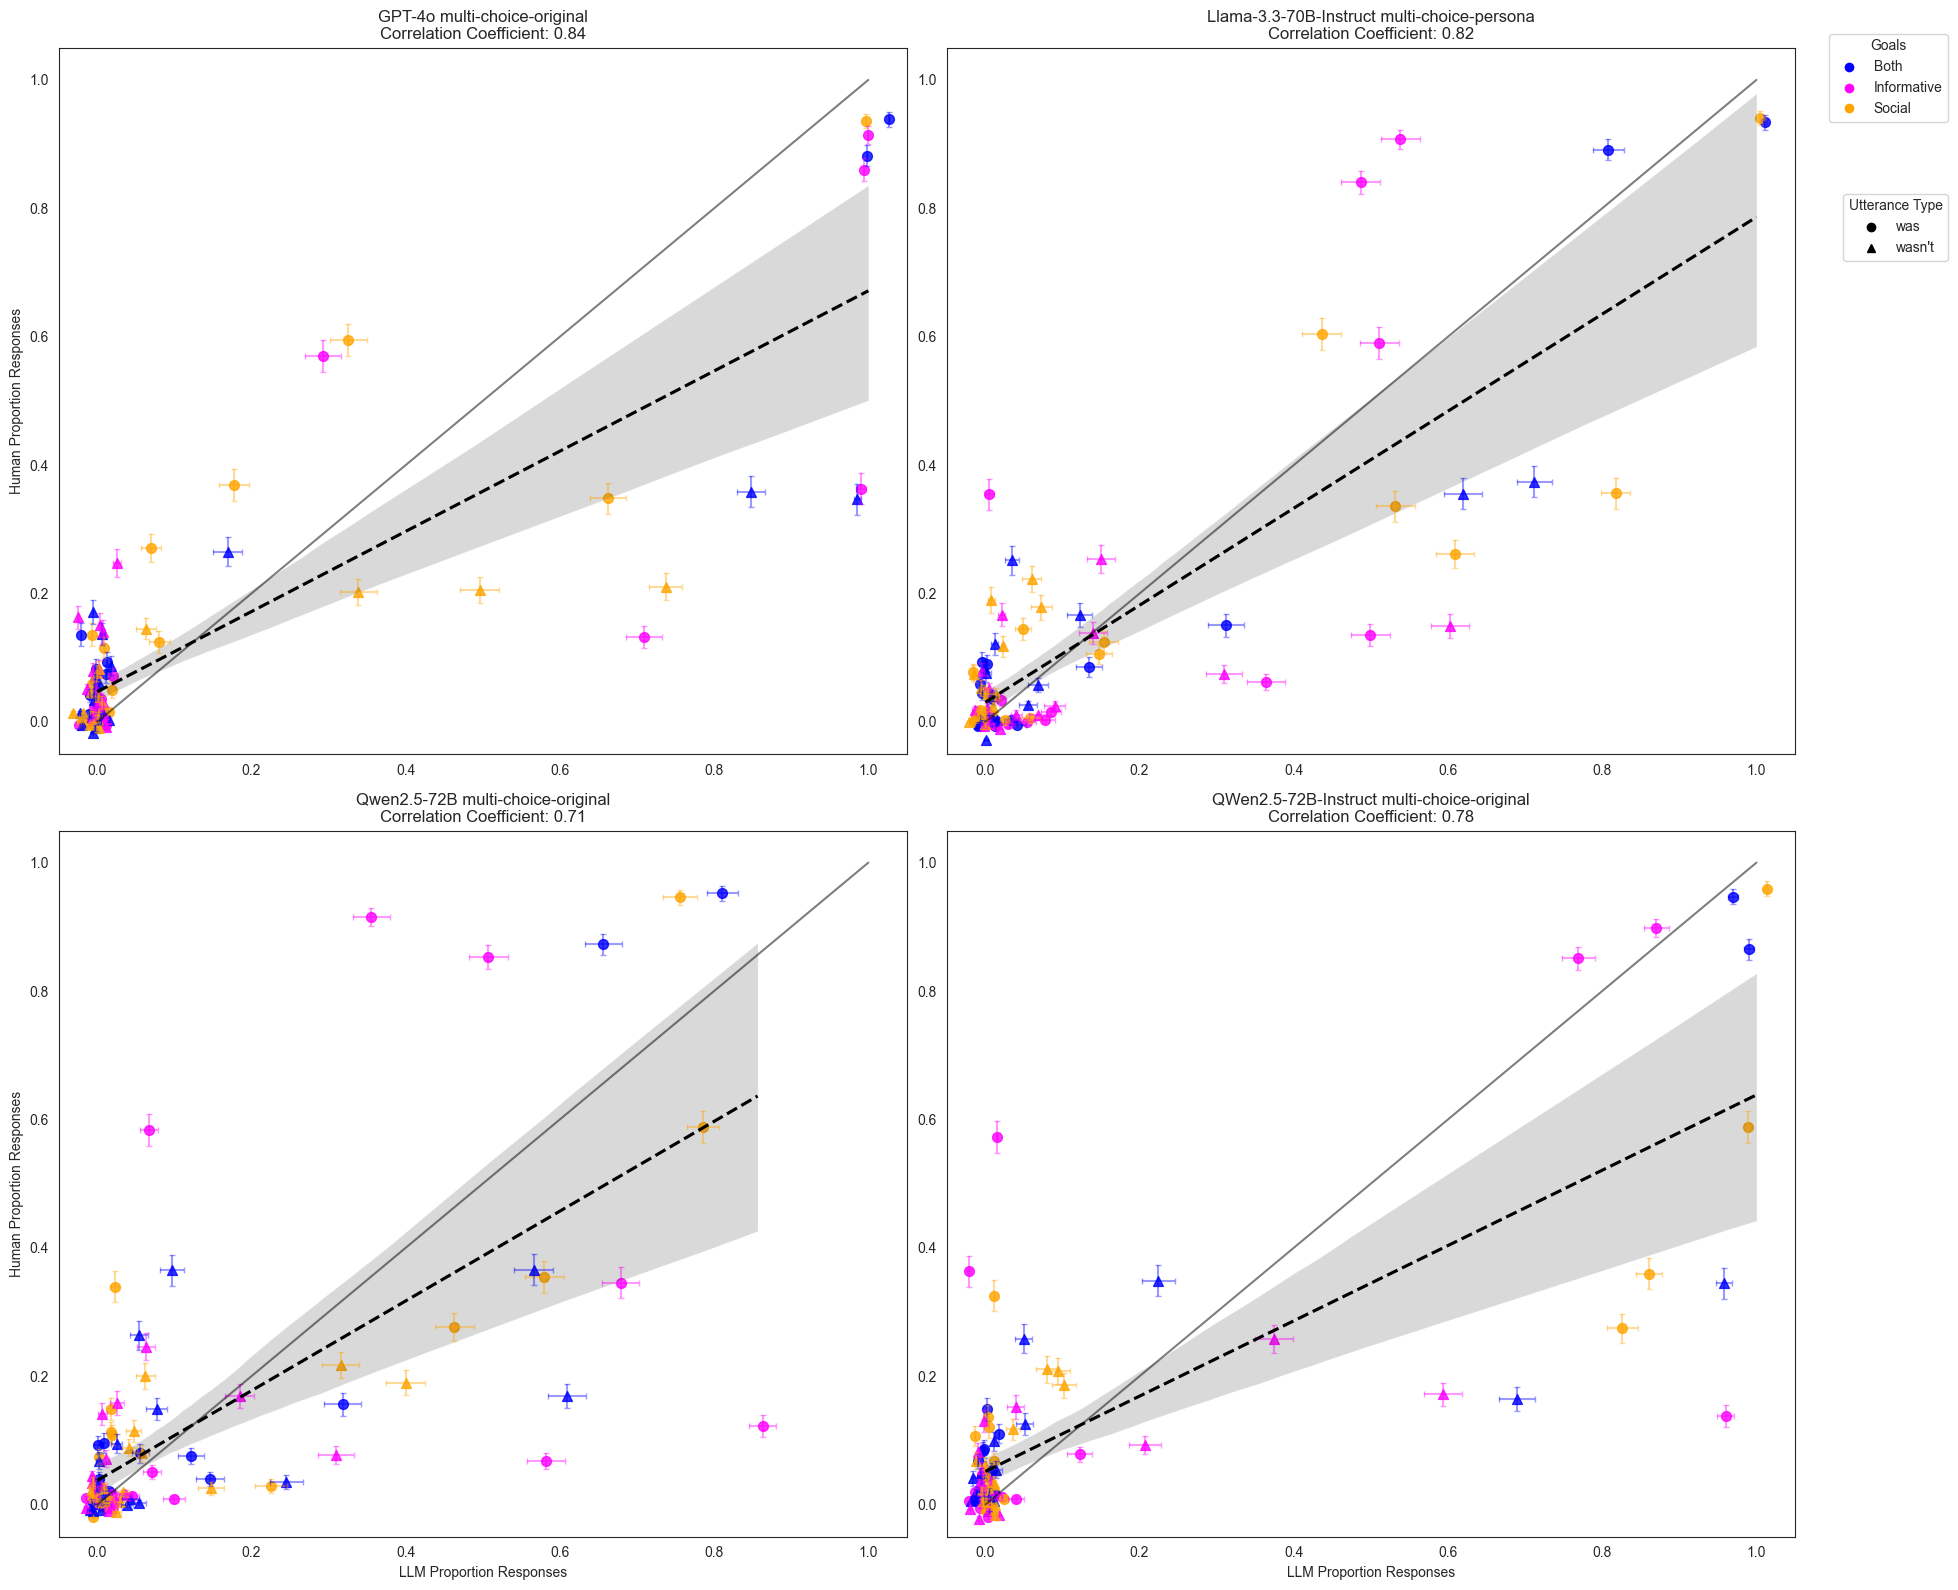

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
from matplotlib.lines import Line2D

def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

def create_correlation_plot(ax, list_1, list_2, model_name, show_xlabel=False, show_ylabel = False):
    # Calculate standard errors
    n = 390
    se_llm = np.sqrt((np.array(list_1) * (1 - np.array(list_1))) / n)
    se_human = np.sqrt((np.array(list_2) * (1 - np.array(list_2))) / n)
    
    # Calculate correlation
    correlation, _ = pearsonr(list_1, list_2)
    
    # Split data for categories
    n_samples = len(list_1)
    split_1 = n_samples // 3
    split_2 = 2 * split_1
    
    # Create categories and utterance types
    categories = ['both'] * split_1 + ['informative'] * (split_2 - split_1) + ['social'] * (n_samples - split_2)
    
    utterance_types = []
    utterance_types.extend(['was'] * (split_1//2))
    utterance_types.extend(['wasn\'t'] * (split_1//2))
    utterance_types.extend(['was'] * ((split_2-split_1)//2))
    utterance_types.extend(['wasn\'t'] * ((split_2-split_1)//2))
    utterance_types.extend(['was'] * ((n_samples-split_2)//2))
    utterance_types.extend(['wasn\'t'] * ((n_samples-split_2)//2))
    
    # Create DataFrame
    data = pd.DataFrame({
        'LLM_proportion': list_1,
        'Human_proportion': list_2,
        'Category': categories,
        'Utterance_type': utterance_types,
        'SE_LLM': se_llm,
        'SE_Human': se_human
    })
    
    # Apply jitter
    data['LLM_proportion_jittered'] = jitter(data['LLM_proportion'])
    data['Human_proportion_jittered'] = jitter(data['Human_proportion'])
    
    # Create scatter plot
    markers = {'was': 'o', 'wasn\'t': '^'}
    for utterance in ['was', 'wasn\'t']:
        for category, color in zip(['both', 'informative', 'social'], ['blue', 'magenta', 'orange']):
            mask = (data['Category'] == category) & (data['Utterance_type'] == utterance)
            
            ax.scatter(
                data.loc[mask, 'LLM_proportion_jittered'],
                data.loc[mask, 'Human_proportion_jittered'],
                c=color,
                marker=markers[utterance],
                s=50,
                alpha=0.8
            )
            
            ax.errorbar(
                data.loc[mask, 'LLM_proportion_jittered'],
                data.loc[mask, 'Human_proportion_jittered'],
                xerr=data.loc[mask, 'SE_LLM'],
                yerr=data.loc[mask, 'SE_Human'],
                fmt='none',
                ecolor=color,
                alpha=0.4,
                capsize=2
            )
    
    # Add x=y line
    ax.plot([0, 1], [0, 1], 'k-', alpha=0.5)
    
    # Add regplot
    sns.regplot(
        x='LLM_proportion', y='Human_proportion', data=data, scatter=False,
        color="black", line_kws={"linestyle": "--"}, ax=ax
    )

    ax.set_xticks(np.arange(0, 1.1, 0.2))
    ax.set_yticks(np.arange(0, 1.1, 0.2))
    
    # Optional: format tick labels to show only one decimal place
    ax.set_xticklabels([f'{x:.1f}' for x in np.arange(0, 1.1, 0.2)])
    ax.set_yticklabels([f'{x:.1f}' for x in np.arange(0, 1.1, 0.2)])
    
    # Set axis limits
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    
    ax.set_title(f"{model_name}\nCorrelation Coefficient: {correlation:.2f}")
    # ax.set_xlabel("LLM Proportion Responses")
    # ax.set_ylabel("Human Proportion Responses")
    if show_xlabel:
        ax.set_xlabel("LLM Proportion Responses")
    else:
        ax.set_xlabel("")
    
    if show_ylabel:
        ax.set_ylabel("Human Proportion Responses")
    else:
        ax.set_ylabel("")

# Create main figure
plt.figure(figsize=(20, 16))
sns.set_style("white")

# Create subplots
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

# Create plots for each model
create_correlation_plot(ax1, proportion_gpt[0:32] + proportion_gpt[64:], proportion_human, "GPT-4o multi-choice-original",show_ylabel = True)
create_correlation_plot(ax2, proportion_llama[0:32] + proportion_llama[64:], proportion_human, "Llama-3.3-70B-Instruct multi-choice-persona")
create_correlation_plot(ax3, proportion_qwen[0:32] + proportion_qwen[64:], proportion_human, "Qwen2.5-72B multi-choice-original", show_xlabel=True, show_ylabel = True)
create_correlation_plot(ax4, proportion_qwen_instruct[0:32] + proportion_qwen_instruct[64:], proportion_human, "QWen2.5-72B-Instruct multi-choice-original", show_xlabel=True)

# Create legend elements
category_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, label=l, markersize=8)
                    for c, l in zip(['blue', 'magenta', 'orange'], ['Both', 'Informative', 'Social'])]

utterance_elements = [Line2D([0], [0], marker=m, color='black', label=l, markersize=6, linestyle='None')
                     for m, l in zip(['o', '^'], ['was', 'wasn\'t'])]

# Add legends to the figure in the upper right corner
fig = plt.gcf()
# First legend
leg1 = fig.legend(handles=category_elements, title="Goals", 
                 bbox_to_anchor=(0.98, 0.98), loc='upper right')
# Second legend below the first one
fig.legend(handles=utterance_elements, title="Utterance Type", 
          bbox_to_anchor=(0.98, 0.88), loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()
# Adjust the right margin to make room for legends
plt.subplots_adjust(right=0.9)

# save to pdf
plt.savefig("./plots/4_llms_correlation_plot.pdf", bbox_inches='tight')

plt.show()




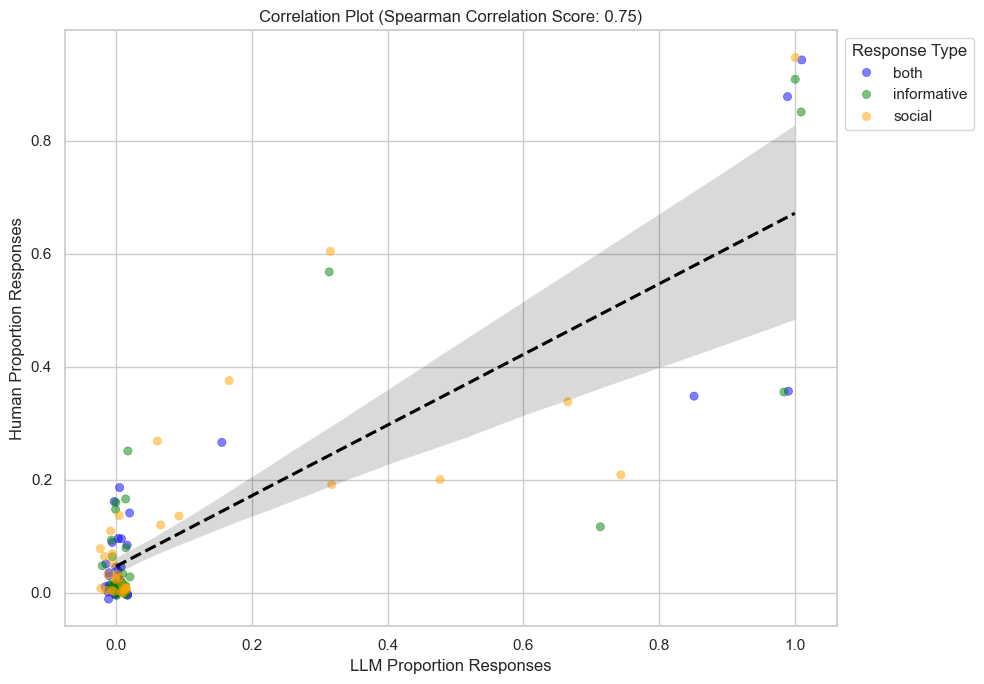

In [2612]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

# Data
list_1 = proportion_llm[0:32] + proportion_llm[64:]
list_2 = proportion_human

# Calculate Spearman correlation
correlation, _ = spearmanr(list_1, list_2)

# Split data for coloring
n = len(list_1)
split_1 = n // 3
split_2 = 2 * split_1

# Colors for different segments
colors = ['blue', 'green', 'orange']
categories = ['both'] * split_1 + ['informative'] * (split_2 - split_1) + ['social'] * (n - split_2)

# Create DataFrame for Seaborn
data = pd.DataFrame({
    'LLM_proportion': list_1,
    'Human_proportion': list_2,
    'Category': categories
})

# Apply jitter function
def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

data['LLM_proportion_jittered'] = jitter(data['LLM_proportion'])
data['Human_proportion_jittered'] = jitter(data['Human_proportion'])

plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# Scatter plot with jittered data and adjusted alpha, smaller size
sns.scatterplot(
    data=data, x='LLM_proportion_jittered', y='Human_proportion_jittered', 
    hue='Category', palette=colors, s=35, alpha=0.5, edgecolor=None
)

# Add regplot for fitted line without jitter
sns.regplot(
    x='LLM_proportion', y='Human_proportion', data=data, scatter=False, 
    color="black", line_kws={"linestyle": "--"}
)
# Title and labels
plt.title(f"Correlation Plot (Spearman Correlation Score: {correlation:.2f})")
plt.xlabel("LLM Proportion Responses")
plt.ylabel("Human Proportion Responses")

# Display legend with title
plt.legend(title="Response Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


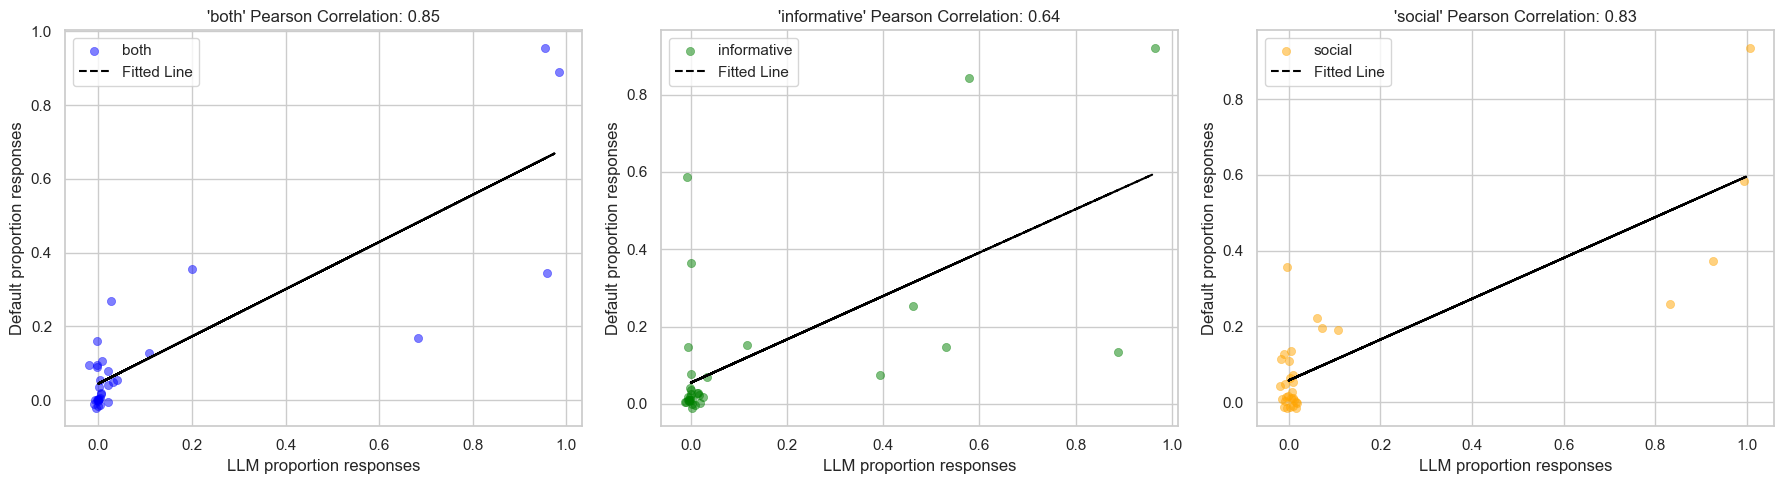

In [2526]:
list_1 = proportion_llm[0:32] + proportion_llm[64:]
# list_2 = proportion_llm[32:64]
list_2 = proportion_human

# Split data for segments
n = len(list_1)
split_1 = n // 3
split_2 = 2 * split_1
segments = [(list_1[:split_1], list_2[:split_1]), 
            (list_1[split_1:split_2], list_2[split_1:split_2]), 
            (list_1[split_2:], list_2[split_2:])]

# Colors for each segment
segment_colors = ['blue', 'green', 'orange']
goal_list = ["both", 'informative', 'social']

# Function to add jitter
def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

# Create subplots for each 1/3 correlation
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.set(style="whitegrid")

# Plot each segment in a separate subplot
for i, (x, y) in enumerate(segments):
    # Calculate correlation for each segment
    segment_correlation, _ = pearsonr(x, y)
    
    # Apply jitter
    x_jittered = jitter(x)
    y_jittered = jitter(y)
    
    # Scatter plot with jittered data
    sns.scatterplot(
        x=x_jittered, y=y_jittered, ax=axs[i], color=segment_colors[i], 
        label=goal_list[i], s=35, alpha=0.5, edgecolor=None
    )
    
    # Fitted line without jitter
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * np.array(x) + b, color="black", linestyle="--", label="Fitted Line")
    
    # Title, labels, and legend
    axs[i].set_title(f"'{goal_list[i]}' Pearson Correlation: {segment_correlation:.2f}")
    axs[i].set_xlabel("LLM proportion responses")
    axs[i].set_ylabel("Default proportion responses")
    axs[i].legend()

# Adjust layout for clarity
plt.tight_layout()
plt.show()


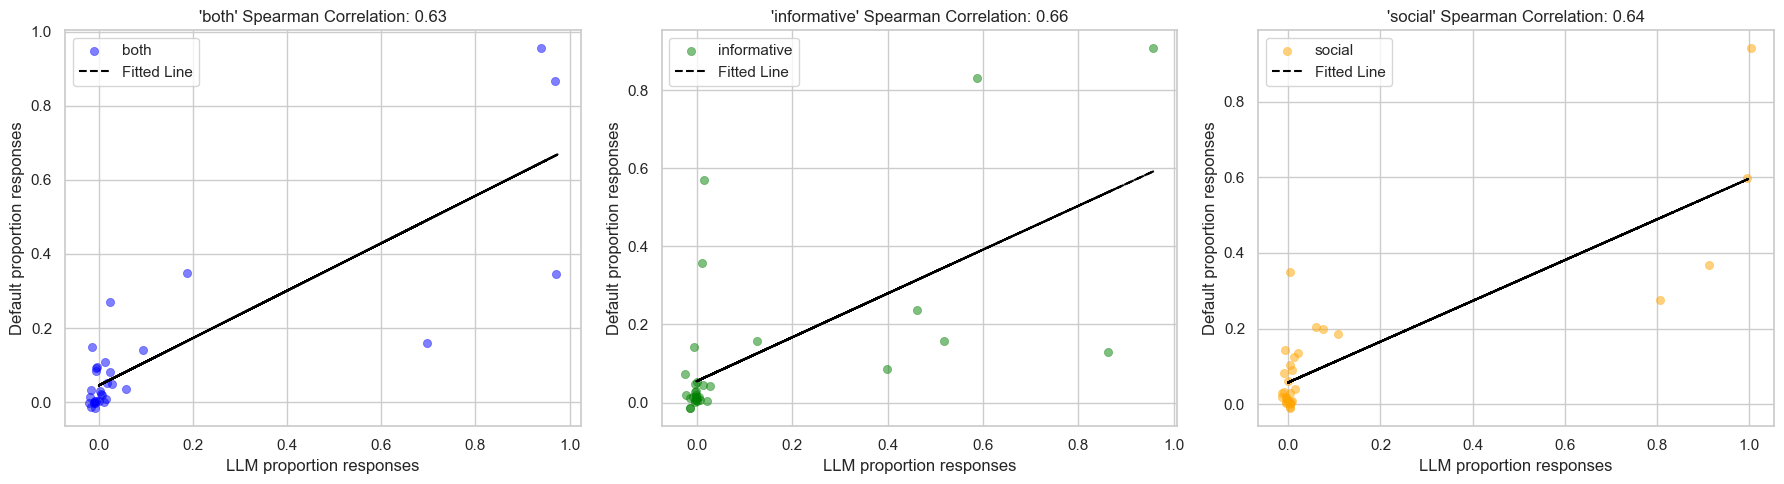

In [2527]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns

# Data
list_1 = proportion_llm[0:32] + proportion_llm[64:]
# list_2 = proportion_llm[32:64]
list_2 = proportion_human

# Split data for segments
n = len(list_1)
split_1 = n // 3
split_2 = 2 * split_1
segments = [(list_1[:split_1], list_2[:split_1]), 
            (list_1[split_1:split_2], list_2[split_1:split_2]), 
            (list_1[split_2:], list_2[split_2:])]

# Colors for each segment
segment_colors = ['blue', 'green', 'orange']
goal_list = ["both", 'informative', 'social']

# Function to add jitter
def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

# Create subplots for each 1/3 correlation
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.set(style="whitegrid")

# Plot each segment in a separate subplot
for i, (x, y) in enumerate(segments):
    # Calculate correlation for each segment
    segment_correlation, _ = spearmanr(x, y)
    
    # Apply jitter
    x_jittered = jitter(x)
    y_jittered = jitter(y)
    
    # Scatter plot with jittered data
    sns.scatterplot(
        x=x_jittered, y=y_jittered, ax=axs[i], color=segment_colors[i], 
        label=goal_list[i], s=35, alpha=0.5, edgecolor=None
    )
    
    # Fitted line without jitter
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * np.array(x) + b, color="black", linestyle="--", label="Fitted Line")
    
    # Title, labels, and legend
    axs[i].set_title(f"'{goal_list[i]}' Spearman Correlation: {segment_correlation:.2f}")
    axs[i].set_xlabel("LLM proportion responses")
    axs[i].set_ylabel("Default proportion responses")
    axs[i].legend()

# Adjust layout for clarity
plt.tight_layout()
plt.show()


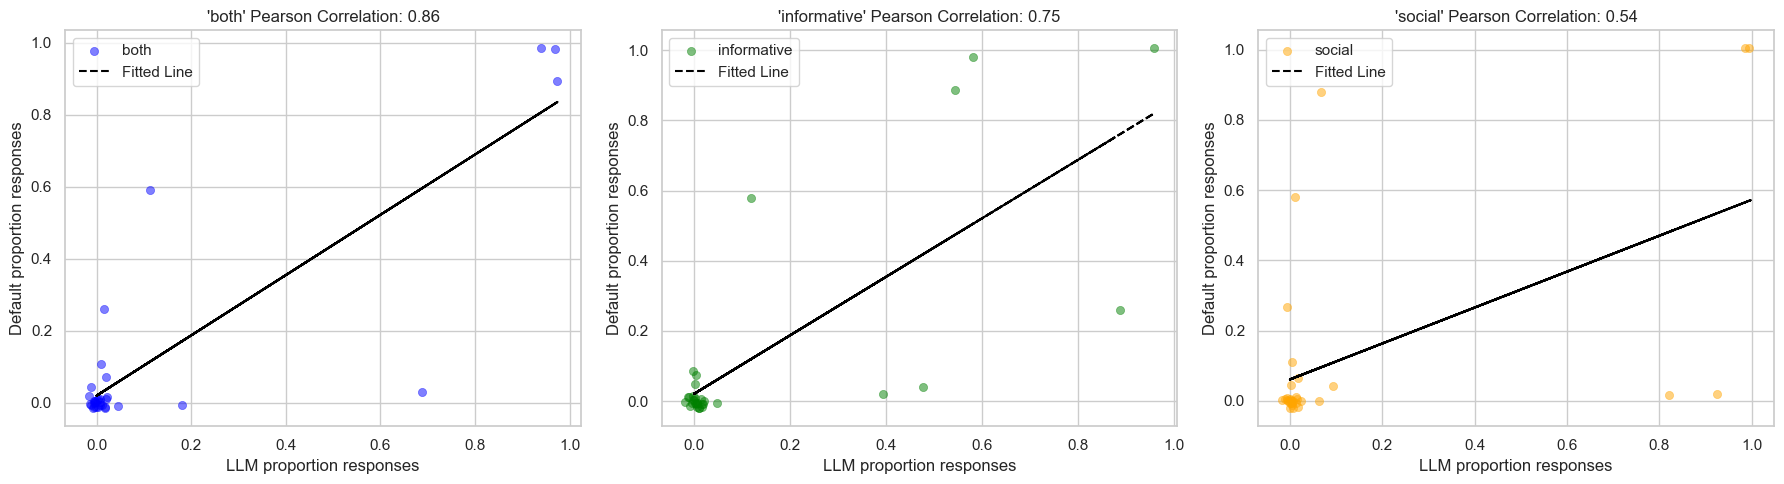

In [2528]:
list_1 = proportion_llm[0:32] + proportion_llm[64:]
list_2 = proportion_llm[32:64]

# Split data for segments
n = len(list_1)
split_1 = n // 3
split_2 = 2 * split_1
segments = [(list_1[:split_1], list_2), 
            (list_1[split_1:split_2], list_2), 
            (list_1[split_2:], list_2)]

# Colors for each segment
segment_colors = ['blue', 'green', 'orange']
goal_list = ["both", 'informative', 'social']

# Function to add jitter
def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

# Create subplots for each 1/3 correlation
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.set(style="whitegrid")

# Plot each segment in a separate subplot
for i, (x, y) in enumerate(segments):
    # Calculate correlation for each segment
    segment_correlation, _ = pearsonr(x, y)
    
    # Apply jitter
    x_jittered = jitter(x)
    y_jittered = jitter(y)
    
    # Scatter plot with jittered data
    sns.scatterplot(
        x=x_jittered, y=y_jittered, ax=axs[i], color=segment_colors[i], 
        label=goal_list[i], s=35, alpha=0.5, edgecolor=None
    )
    
    # Fitted line without jitter
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * np.array(x) + b, color="black", linestyle="--", label="Fitted Line")
    
    # Title, labels, and legend
    axs[i].set_title(f"'{goal_list[i]}' Pearson Correlation: {segment_correlation:.2f}")
    axs[i].set_xlabel("LLM proportion responses")
    axs[i].set_ylabel("Default proportion responses")
    axs[i].legend()

# Adjust layout for clarity
plt.tight_layout()
plt.show()


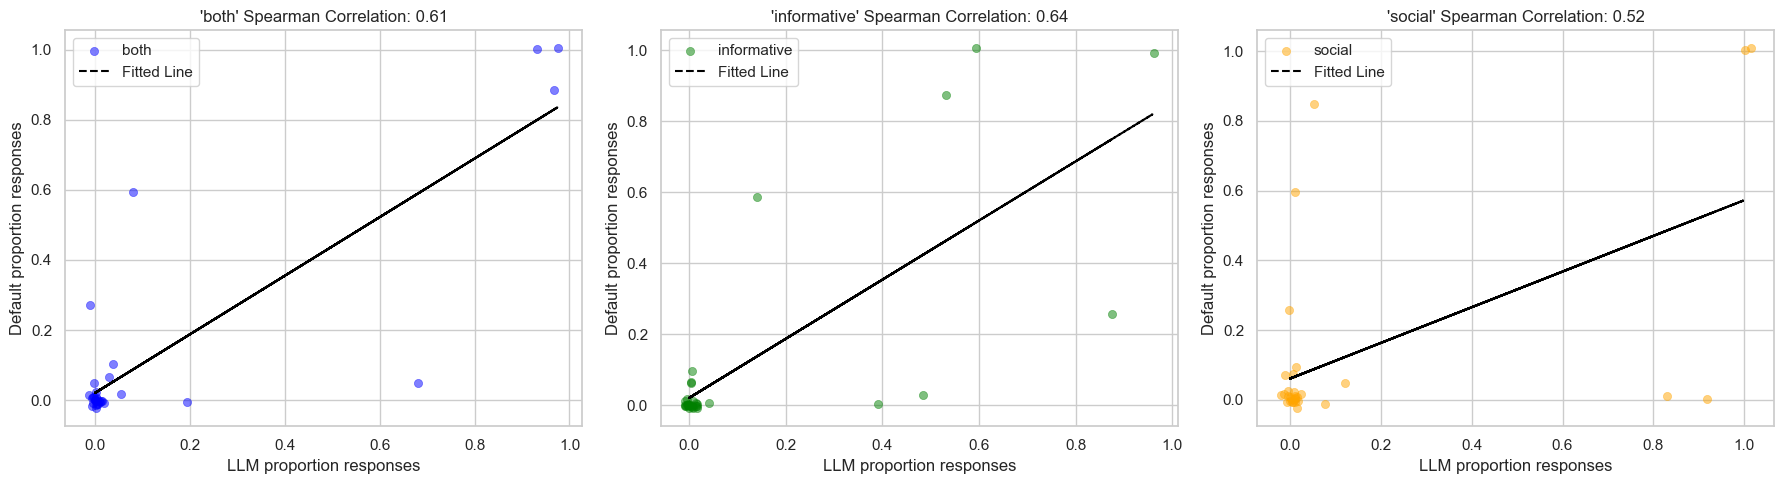

In [2529]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns

# Data

# Split data for segments
n = len(list_1)
split_1 = n // 3
split_2 = 2 * split_1
segments = [(list_1[:split_1], list_2), 
            (list_1[split_1:split_2], list_2), 
            (list_1[split_2:], list_2)]

# Colors for each segment
segment_colors = ['blue', 'green', 'orange']
goal_list = ["both", 'informative', 'social']

# Function to add jitter
def jitter(arr, factor=0.01):
    return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

# Create subplots for each 1/3 correlation
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.set(style="whitegrid")

# Plot each segment in a separate subplot
for i, (x, y) in enumerate(segments):
    # Calculate correlation for each segment
    segment_correlation, _ = spearmanr(x, y)
    
    # Apply jitter
    x_jittered = jitter(x)
    y_jittered = jitter(y)
    
    # Scatter plot with jittered data
    sns.scatterplot(
        x=x_jittered, y=y_jittered, ax=axs[i], color=segment_colors[i], 
        label=goal_list[i], s=35, alpha=0.5, edgecolor=None
    )
    
    # Fitted line without jitter
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * np.array(x) + b, color="black", linestyle="--", label="Fitted Line")
    
    # Title, labels, and legend
    axs[i].set_title(f"'{goal_list[i]}' Spearman Correlation: {segment_correlation:.2f}")
    axs[i].set_xlabel("LLM proportion responses")
    axs[i].set_ylabel("Default proportion responses")
    axs[i].legend()

# Adjust layout for clarity
plt.tight_layout()
plt.show()


In [2360]:
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import spearmanr
# import seaborn as sns

# # Data

# # Split data for segments
# n = len(list_1)
# split_1 = n // 3
# split_2 = 2 * split_1
# segments = [(list_1[:split_1], list_2[:split_1]), 
#             (list_1[split_1:split_2], list_2[split_1:split_2]), 
#             (list_1[split_2:], list_2[split_2:])]

# # Colors for each segment
# segment_colors = ['blue', 'green', 'orange']
# goal_list = ["both", 'informative', 'social']

# # Function to add jitter
# def jitter(arr, factor=0.01):
#     return arr + np.random.normal(0, factor * (max(arr) - min(arr)), len(arr))

# # Create subplots for each 1/3 correlation
# fig, axs = plt.subplots(1, 3, figsize=(18, 5))
# sns.set(style="whitegrid")

# # Plot each segment in a separate subplot
# for i, (x, y) in enumerate(segments):
#     # Calculate correlation for each segment
#     segment_correlation, _ = spearmanr(x, y)
    
#     # Apply jitter
#     x_jittered = jitter(x)
#     y_jittered = jitter(y)
    
#     # Scatter plot with jittered data
#     sns.scatterplot(
#         x=x_jittered, y=y_jittered, ax=axs[i], color=segment_colors[i], 
#         label=goal_list[i], s=35, alpha=0.5, edgecolor=None
#     )
    
#     # Fitted line without jitter
#     m, b = np.polyfit(x, y, 1)  # Fit using non-jittered data
#     axs[i].plot(np.array(x), m * np.array(x) + b, color="black", linestyle="-", label="Fitted Line")
    
#     # Title, labels, and legend
#     axs[i].set_title(f"'{goal_list[i]}' Spearman Correlation: {segment_correlation:.2f}")
#     axs[i].set_xlabel("LLM proportion responses")
#     axs[i].set_ylabel("Default proportion responses")
#     axs[i].legend()

# # Adjust layout for clarity
# plt.tight_layout()
# plt.show()

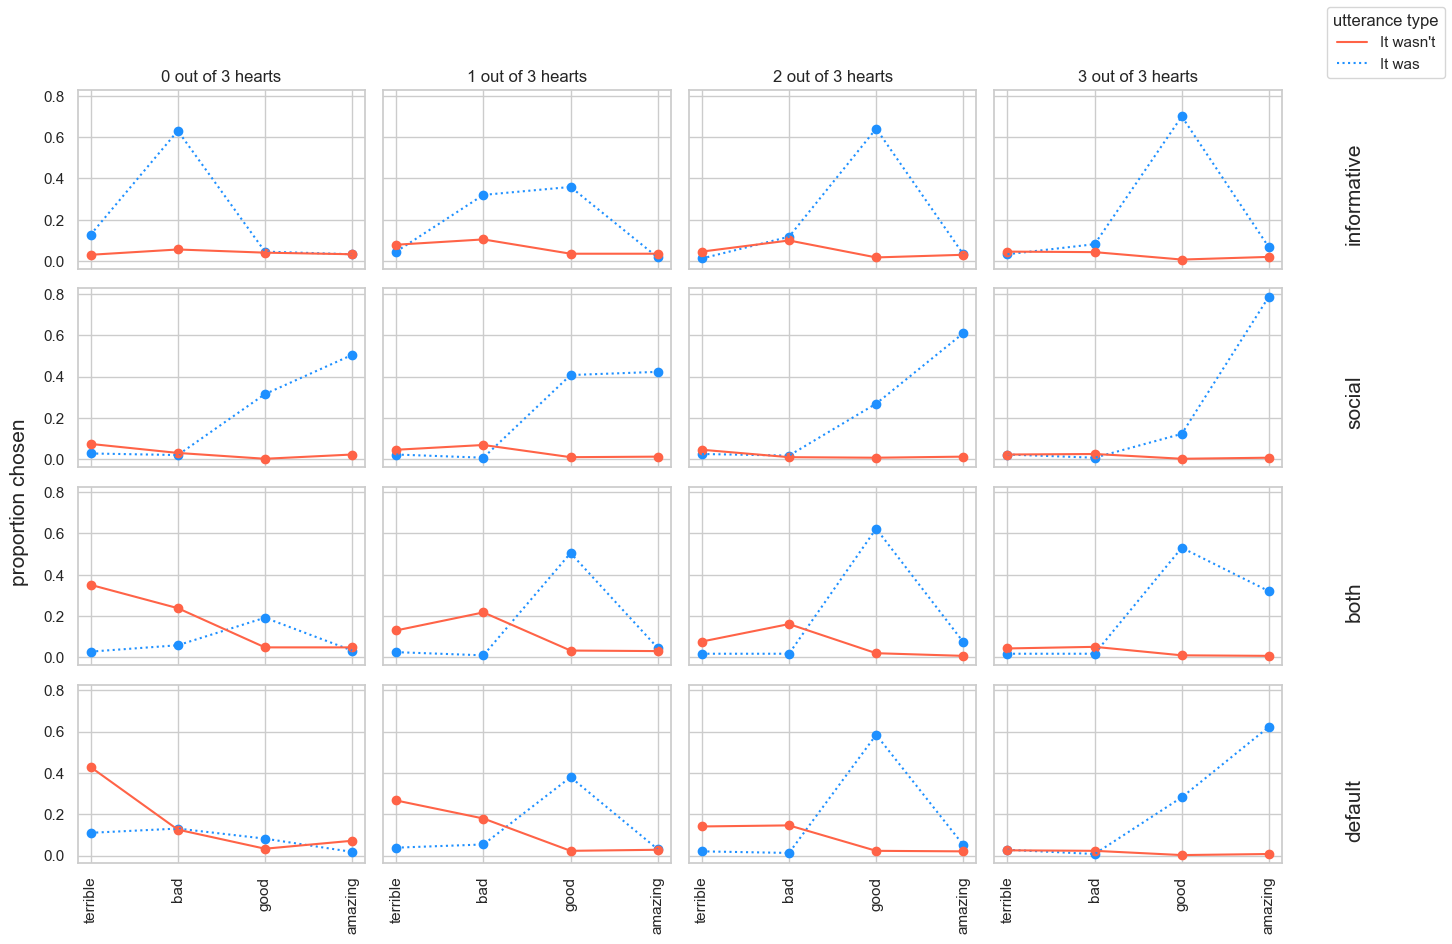

In [1226]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `updated_df`, `unique_goals`, `unique_num_hearts`, and `unique_llm_negations` are already defined.

unique_goals = ["both", "default", "informative", "social"]
unique_num_hearts = ["0 out of 3 hearts", "1 out of 3 hearts", "2 out of 3 hearts", "3 out of 3 hearts"]
unique_llm_negations = ["It was", "It wasn't"]

# Define the desired order for llm_adjectives
desired_order = ["terrible", "bad", "good", "amazing"]

# Convert llm_adjectives to a categorical type with the specified order
updated_df["llm_adjectives"] = pd.Categorical(updated_df["llm_adjectives"], categories=desired_order, ordered=True)

# Define a colorblind-friendly color palette and line styles
colors = {"It wasn't": "tomato", "It was": "dodgerblue"}  # Customize these colors
line_styles = {"It wasn't": "-", "It was": ":"}  # Solid for "It wasn't" and dotted for "It was"

# Map each goal to a specific row
goal_row_mapping = {"informative": 0, "social": 1, "both": 2, "default": 3}

fig, axs = plt.subplots(4, len(unique_num_hearts), figsize=(15, 10), sharex=True, sharey=True)

for goal in unique_goals:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        for llm_negation in unique_llm_negations:
            data = updated_df[(updated_df["goal"] == goal) & (updated_df["num_hearts"] == num_heart) & (updated_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")  # Sort by llm_adjectives which is categorical
            color = colors[llm_negation]  # Get the color for the current llm_negation
            linestyle = line_styles[llm_negation]  # Get the line style for the current llm_negation
            axs[row, j].scatter(data["llm_adjectives"].cat.codes, data["proportation"], color=color)
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], color=color, linestyle=linestyle)  # Customize the line color and style
            if row == 0:
                axs[row, j].set_title(f"{num_heart}")

# Set common labels with adjusted padding
fig.text(0.04, 0.5, 'proportion chosen', va='center', rotation='vertical', size=15)  # Moved slightly left to avoid overlap

# Add text on the upper right of the plot
fig.text(0.93, 0.86, 'informative', va='top', rotation='vertical', size=15)
fig.text(0.93, 0.60, 'social', va='center', rotation='vertical', size=15)
fig.text(0.93, 0.38, 'both', va='bottom', rotation='vertical', size=15)
fig.text(0.93, 0.16, 'default', va='bottom', rotation='vertical', size=15)

# Set x-axis tick labels on the bottom row
for ax in axs[-1, :]:  # Apply rotation only to the bottom row for better readability
    ax.set_xticks(range(len(desired_order)))
    ax.set_xticklabels(desired_order, rotation=90)

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 0.9, 0.95])  # Adjust layout for better spacing

# Create a separate legend
handles = [
    plt.Line2D([0], [0], color="tomato", linestyle='-', label="It wasn't"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle=':', label="It was")
]
fig.legend(handles=handles, loc='upper right', title='utterance type')

plt.show()

In [391]:
updated_df.to_csv("gpt-4o original results.csv", index=False)

In [95]:
updated_df.to_csv("llama-3.3-70B-Instruct persona results.csv", index=False)

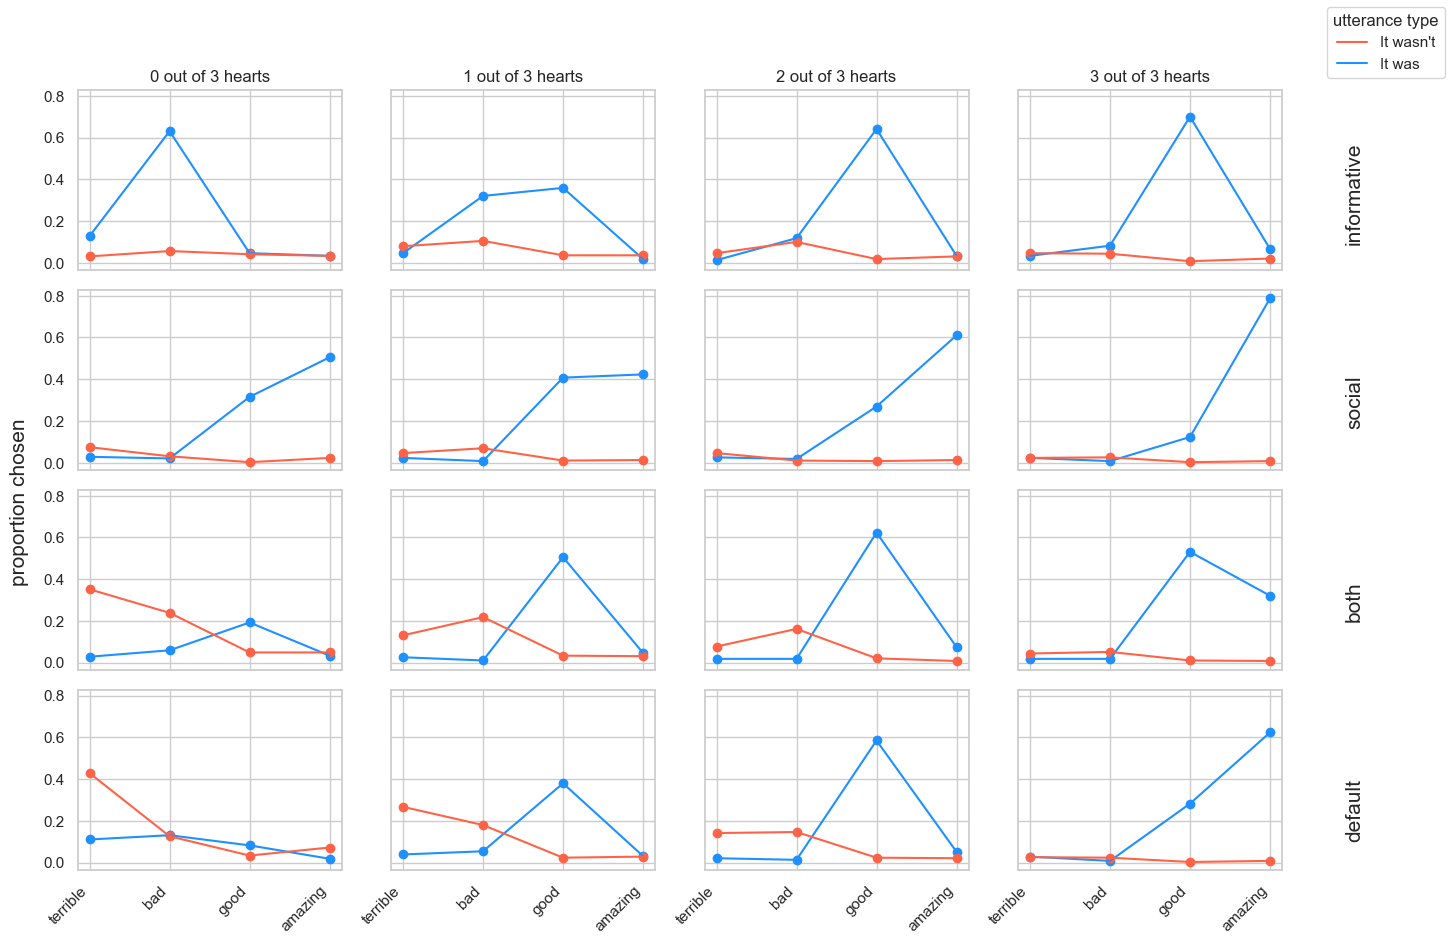

In [974]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `updated_df`, `unique_goals`, `unique_num_hearts`, and `unique_llm_negations` are already defined.

updated_df = pd.read_csv("llama-3.3-70B-Instruct persona results.csv")

unique_goals = ["both", "default", "informative", "social"]
unique_num_hearts = ["0 out of 3 hearts", "1 out of 3 hearts", "2 out of 3 hearts", "3 out of 3 hearts"]
unique_llm_negations = ["It was", "It wasn't"]

# Define the desired order for llm_adjectives
desired_order = ["terrible", "bad", "good", "amazing"]

# Convert llm_adjectives to a categorical type with the specified order
updated_df["llm_adjectives"] = pd.Categorical(updated_df["llm_adjectives"], categories=desired_order, ordered=True)

# Define a colorblind-friendly color palette and line styles
colors = {"It wasn't": "tomato", "It was": "dodgerblue"}  # Customize these colors
line_styles = {"It wasn't": "-", "It was": "-"}  # Solid for "It wasn't" and dotted for "It was"

# Map each goal to a specific row
goal_row_mapping = {"informative": 0, "social": 1, "both": 2, "default": 3}

fig, axs = plt.subplots(4, len(unique_num_hearts), figsize=(15, 10), sharex=True, sharey=True)

for goal in unique_goals:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        for llm_negation in unique_llm_negations:
            data = updated_df[(updated_df["goal"] == goal) & (updated_df["num_hearts"] == num_heart) & (updated_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")  # Sort by llm_adjectives which is categorical
            color = colors[llm_negation]  # Get the color for the current llm_negation
            linestyle = line_styles[llm_negation]  # Get the line style for the current llm_negation
            axs[row, j].scatter(data["llm_adjectives"].cat.codes, data["proportation"], color=color)
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], color=color, linestyle=linestyle)  # Customize the line color and style
            if row == 0:
                axs[row, j].set_title(f"{num_heart}")

# Set common labels with adjusted padding
fig.text(0.04, 0.5, 'proportion chosen', va='center', rotation='vertical', size=15)  # Moved slightly left to avoid overlap

# Add text on the upper right of the plot
fig.text(0.93, 0.86, 'informative', va='top', rotation='vertical', size=15)
fig.text(0.93, 0.60, 'social', va='center', rotation='vertical', size=15)
fig.text(0.93, 0.38, 'both', va='bottom', rotation='vertical', size=15)
fig.text(0.93, 0.16, 'default', va='bottom', rotation='vertical', size=15)

# Set x-axis tick labels on the bottom row with a 45-degree rotation
for ax in axs[-1, :]:  # Apply rotation only to the bottom row for better readability
    ax.set_xticks(range(len(desired_order)))
    ax.set_xticklabels(desired_order, rotation=45, ha='right')  # Rotate 45 degrees and align to the right

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 0.9, 0.95])  # Adjust layout for better spacing

# Create a separate legend
handles = [
    plt.Line2D([0], [0], color="tomato",  label="It wasn't"),
    plt.Line2D([0], [0], color="dodgerblue", label="It was")
]
fig.legend(handles=handles, loc='upper right', title='utterance type')

plt.show()

# plot save as pdf
fig.savefig("./plots/llama-3.1-70b-multi-choice_format_results.pdf", bbox_inches='tight')

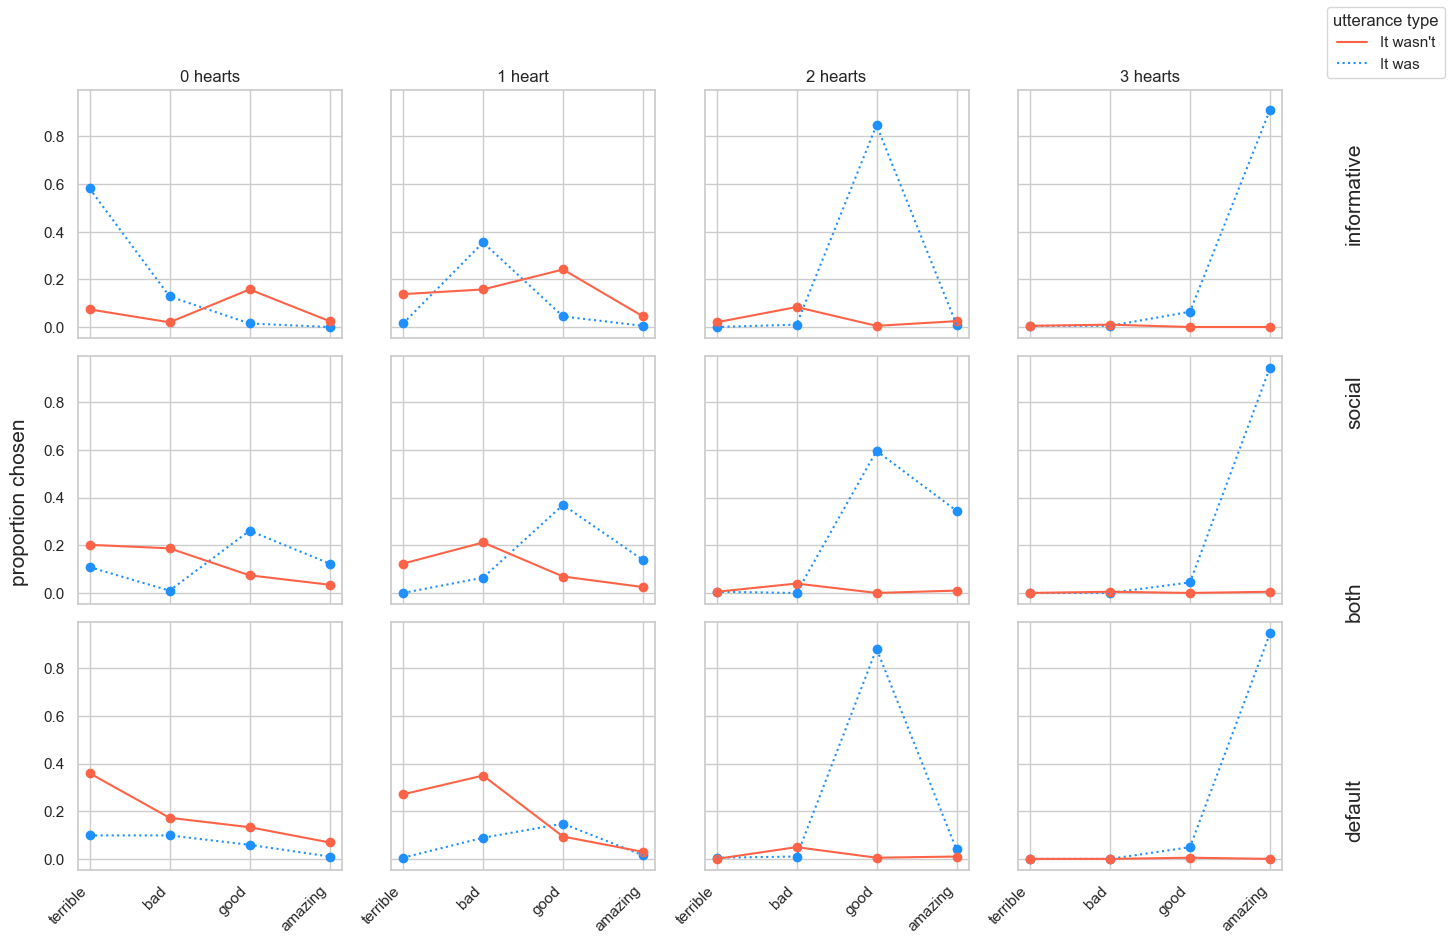

In [927]:
import matplotlib.pyplot as plt
import pandas as pd

updated_df = pd.read_csv("../../results/human_data_grouped_finalized.csv")

# Assuming `updated_df`, `unique_goals`, `unique_num_hearts`, and `unique_llm_negations` are already defined.

# Define the desired order for llm_adjectives
desired_order = ["terrible", "bad", "good", "amazing"]
unique_goals = ["both", "informative", "social"]
unique_num_hearts = ["0 hearts", "1 heart", "2 hearts", "3 hearts"]

# Convert llm_adjectives to a categorical type with the specified order
updated_df["llm_adjectives"] = pd.Categorical(updated_df["llm_adjectives"], categories=desired_order, ordered=True)

# Define a colorblind-friendly color palette and line styles
colors = {"It wasn't": "tomato", "It was": "dodgerblue"}  # Customize these colors
line_styles = {"It wasn't": "-", "It was": ":"}  # Solid for "It wasn't" and dotted for "It was"

# Map each goal to a specific row
goal_row_mapping = {"informative": 0, "social": 1, "both": 2}

fig, axs = plt.subplots(3, len(unique_num_hearts), figsize=(15, 10), sharex=True, sharey=True)

for goal in unique_goals:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        for llm_negation in unique_llm_negations:
            data = updated_df[(updated_df["goal"] == goal) & (updated_df["num_hearts"] == num_heart) & (updated_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")  # Sort by llm_adjectives which is categorical
            color = colors[llm_negation]  # Get the color for the current llm_negation
            linestyle = line_styles[llm_negation]  # Get the line style for the current llm_negation
            axs[row, j].scatter(data["llm_adjectives"].cat.codes, data["proportation"], color=color)
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], color=color, linestyle=linestyle)  # Customize the line color and style
            if row == 0:
                axs[row, j].set_title(f"{num_heart}")

# Set common labels with adjusted padding
fig.text(0.04, 0.5, 'proportion chosen', va='center', rotation='vertical', size=15)  # Moved slightly left to avoid overlap

# Add text on the upper right of the plot
fig.text(0.93, 0.86, 'informative', va='top', rotation='vertical', size=15)
fig.text(0.93, 0.60, 'social', va='center', rotation='vertical', size=15)
fig.text(0.93, 0.38, 'both', va='bottom', rotation='vertical', size=15)
fig.text(0.93, 0.16, 'default', va='bottom', rotation='vertical', size=15)

# Set x-axis tick labels on the bottom row with a 45-degree rotation
for ax in axs[-1, :]:  # Apply rotation only to the bottom row for better readability
    ax.set_xticks(range(len(desired_order)))
    ax.set_xticklabels(desired_order, rotation=45, ha='right')  # Rotate 45 degrees and align to the right

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 0.9, 0.95])  # Adjust layout for better spacing

# Create a separate legend
handles = [
    plt.Line2D([0], [0], color="tomato", linestyle='-', label="It wasn't"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle=':', label="It was")
]
fig.legend(handles=handles, loc='upper right', title='utterance type')

plt.show()

# plot save as pdf
fig.savefig("./plots/human_results.pdf", bbox_inches='tight')

In [984]:
4*4*4*2, 32*3

(128, 96)

In [993]:
128/8*390

6240.0

In [990]:
results_experiment_2_grouped_t_1_multi_choice

goal         num_hearts llm_negations llm_adjectives  count
0      both  0 out of 3 hearts        It was           good     75
1      both  0 out of 3 hearts        It was            bad     23
2      both  0 out of 3 hearts        It was        amazing     13
3      both  0 out of 3 hearts        It was       terrible     11
4      both  0 out of 3 hearts     It wasn't       terrible    137
..      ...                ...           ...            ...    ...
123  social  3 out of 3 hearts        It was            bad      3
124  social  3 out of 3 hearts     It wasn't            bad     10
125  social  3 out of 3 hearts     It wasn't       terrible      9
126  social  3 out of 3 hearts     It wasn't        amazing      3
127  social  3 out of 3 hearts     It wasn't           good      1

[128 rows x 5 columns]

In [989]:
llama_df

goal         num_hearts llm_negations llm_adjectives  proportation
0      both  0 out of 3 hearts        It was           good      0.192308
1      both  0 out of 3 hearts        It was            bad      0.058974
2      both  0 out of 3 hearts        It was        amazing      0.033333
3      both  0 out of 3 hearts        It was       terrible      0.028205
4      both  0 out of 3 hearts     It wasn't       terrible      0.351282
..      ...                ...           ...            ...           ...
123  social  3 out of 3 hearts        It was            bad      0.007692
124  social  3 out of 3 hearts     It wasn't            bad      0.025641
125  social  3 out of 3 hearts     It wasn't       terrible      0.023077
126  social  3 out of 3 hearts     It wasn't        amazing      0.007692
127  social  3 out of 3 hearts     It wasn't           good      0.002564

[128 rows x 5 columns]

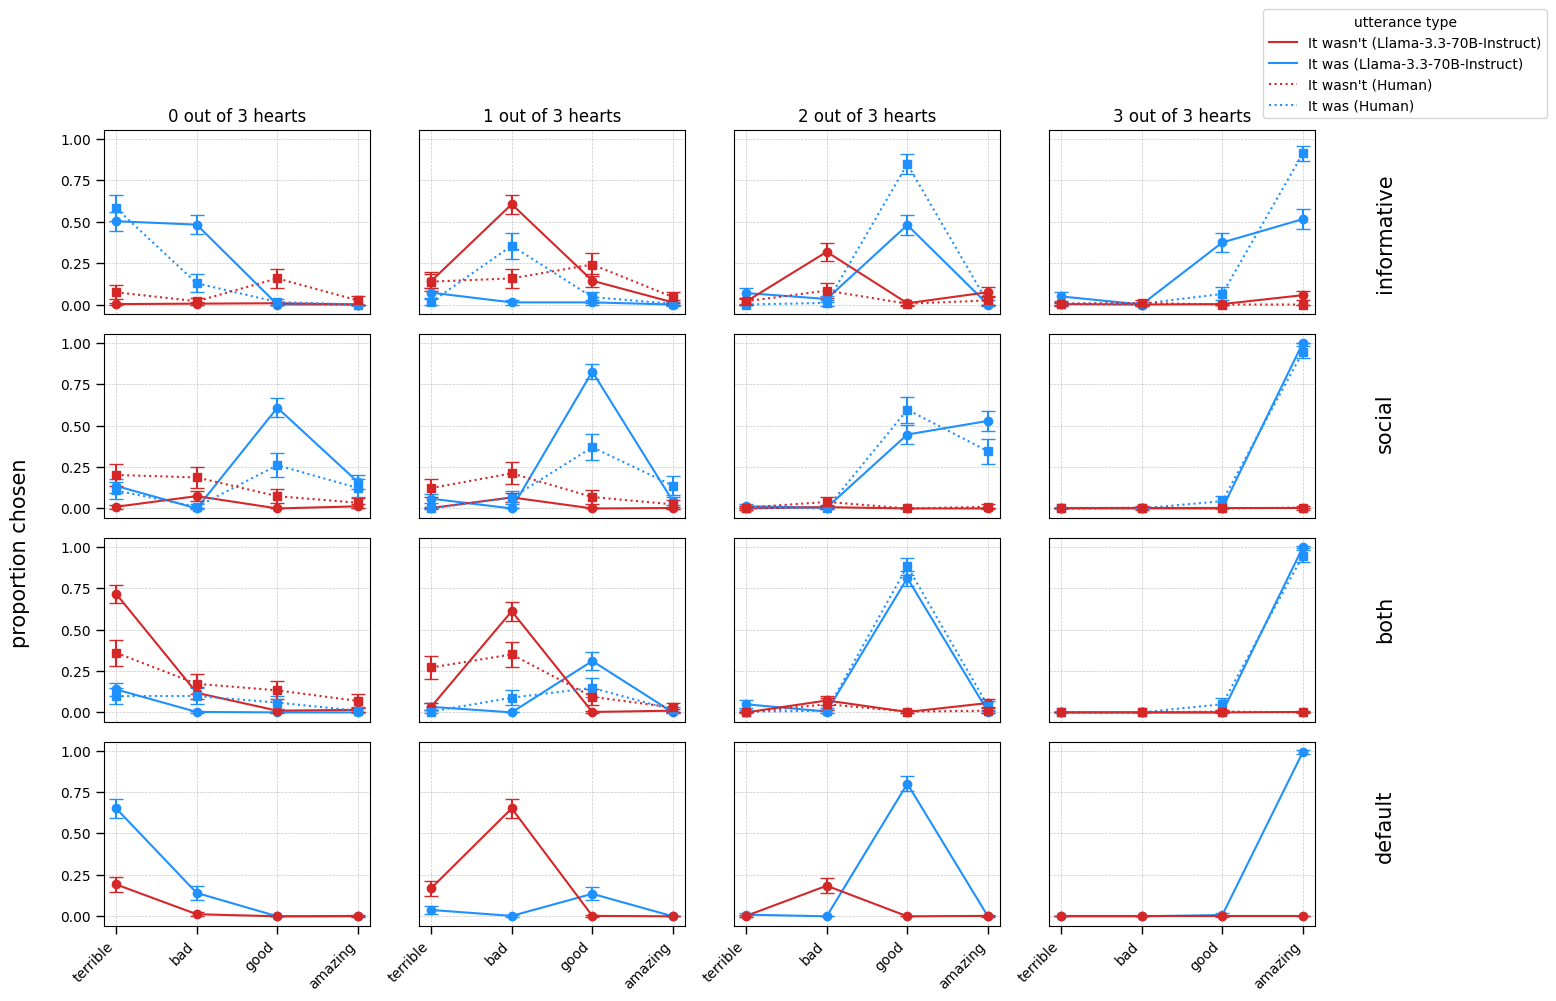

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create legend
handles = [
    plt.Line2D([0], [0], color="#D62728", linestyle='-', label="It wasn't (Llama-3.3-70B-Instruct)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle='-', label="It was (Llama-3.3-70B-Instruct)"),
    plt.Line2D([0], [0], color="#D62728", linestyle=':', label="It wasn't (Human)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle=':', label="It was (Human)")
]
# fig.legend(handles=handles, loc='upper right', title='utterance type')


# Load both datasets
llama_df = pd.read_csv("llama-3.3-70B-Instruct persona results.csv")
human_df = pd.read_csv("../../results/human_data_grouped_finalized.csv")

# Add total_responses columns
llama_df['total_responses'] = 390
human_df['total_responses'] = 203

# Function to calculate binomial proportion confidence interval
def binomial_ci(p, n):
    if n == 0:
        return 0
    se = np.sqrt((p * (1-p)) / n) * 2.3
    return se

desired_order = ["terrible", "bad", "good", "amazing"]
unique_goals = ["both", "default", "informative", "social"]
unique_num_hearts = ["0 out of 3 hearts", "1 out of 3 hearts", "2 out of 3 hearts", "3 out of 3 hearts"]
unique_llm_negations = ["It was", "It wasn't"]

# Convert llm_adjectives to categorical for both datasets
llama_df["llm_adjectives"] = pd.Categorical(llama_df["llm_adjectives"], categories=desired_order, ordered=True)
human_df["llm_adjectives"] = pd.Categorical(human_df["llm_adjectives"], categories=desired_order, ordered=True)

# Define colors and styles
colors = {"It wasn't": "#D62728", "It was": "dodgerblue"}
line_styles = {"llama": "-", "human": ":"}

# Map goals to rows
goal_row_mapping = {"informative": 0, "social": 1, "both": 2, "default": 3}

fig, axs = plt.subplots(4, len(unique_num_hearts), figsize=(15, 10), sharex=True, sharey=True)

# Create a mapping between LLaMA and human heart formats
heart_mapping = {
    "0 out of 3 hearts": "0 hearts",
    "1 out of 3 hearts": "1 heart",
    "2 out of 3 hearts": "2 hearts",
    "3 out of 3 hearts": "3 hearts"
}

# Plot LLaMA data
for goal in unique_goals:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        for llm_negation in unique_llm_negations:
            data = llama_df[(llama_df["goal"] == goal) & 
                          (llama_df["num_hearts"] == num_heart) & 
                          (llama_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")
            color = colors[llm_negation]
            
            # Calculate error bars
            yerr = [binomial_ci(p, 390) for p in data["proportation"]]
            
            axs[row, j].errorbar(data["llm_adjectives"].cat.codes, data["proportation"], 
                                yerr=yerr, color=color, fmt='o', capsize=5)
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
                           color=color, linestyle=line_styles["llama"])
            if row == 0:
                axs[row, j].set_title(f"{num_heart}")

# Plot human data (only for first three rows)
for goal in ["informative", "social", "both"]:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        human_num_heart = heart_mapping[num_heart]
        for llm_negation in unique_llm_negations:
            data = human_df[(human_df["goal"] == goal) & 
                          (human_df["num_hearts"] == human_num_heart) & 
                          (human_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")
            color = colors[llm_negation]
            
            # Calculate error bars
            yerr = [binomial_ci(p, 203) for p in data["proportation"]]
            
            axs[row, j].errorbar(data["llm_adjectives"].cat.codes, data["proportation"], 
                                yerr=yerr, color=color, fmt='s', capsize=5)
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
                           color=color, linestyle=line_styles["human"])

# Labels and formatting
fig.text(0.02, 0.5, 'proportion chosen', va='center', rotation='vertical', size=15)

fig.text(0.93, 0.88, 'informative', va='top', rotation='vertical', size=15)
fig.text(0.93, 0.63, 'social', va='center', rotation='vertical', size=15)
fig.text(0.93, 0.41, 'both', va='bottom', rotation='vertical', size=15)
fig.text(0.93, 0.19, 'default', va='bottom', rotation='vertical', size=15)

for ax in axs[-1, :]:
    ax.set_xticks(range(len(desired_order)))
    ax.set_xticklabels(desired_order, rotation=45, ha='right')

plt.tight_layout(rect=[0.05, 0.05, 0.9, 0.96])

fig.legend(
    handles=handles,
    loc='upper center',  # Position it at the upper center
    bbox_to_anchor=(0.95, 1.05),  # Shift it slightly to the right and above the plot area
    title='utterance type',
    ncol=1  # Arrange items in a single column to save space
)

for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        # Enable ticks only for the leftmost and bottom axes
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
        if j != 0:  # Not the leftmost column
            ax.tick_params(axis='y', left=False)  # Remove y-axis ticks
        if i != len(axs) - 1:  # Not the bottom row
            ax.tick_params(axis='x', bottom=False)  # Remove x-axis ticks
        
        # Set ticks for the leftmost column and bottom row
        if j == 0:  # Leftmost column
            ax.tick_params(axis='y', direction='out', length=6, width=1)  # Prominent y-axis ticks
            ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])  # y-axis tick positions
        if i == len(axs) - 1:  # Bottom row
            ax.tick_params(axis='x', direction='out', length=6, width=1)  # Prominent x-axis ticks
            ax.set_xticks(range(len(desired_order)))  # x-axis tick positions
            ax.set_xticklabels(desired_order, rotation=45, ha='right')  # Rotate labels for readability

# Create legend
handles = [
    plt.Line2D([0], [0], color="#D62728", linestyle='-', label="It wasn't (Llama-3.3-70B-Instruct)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle='-', label="It was (Llama-3.3-70B-Instruct)"),
    plt.Line2D([0], [0], color="#D62728", linestyle=':', label="It wasn't (Human)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle=':', label="It was (Human)")
]
# fig.legend(handles=handles, loc='upper right', title='utterance type')

plt.show()

# Save plot
fig.savefig("./plots/human_llama_combined_results_with_marker_with_grid.pdf", bbox_inches='tight')

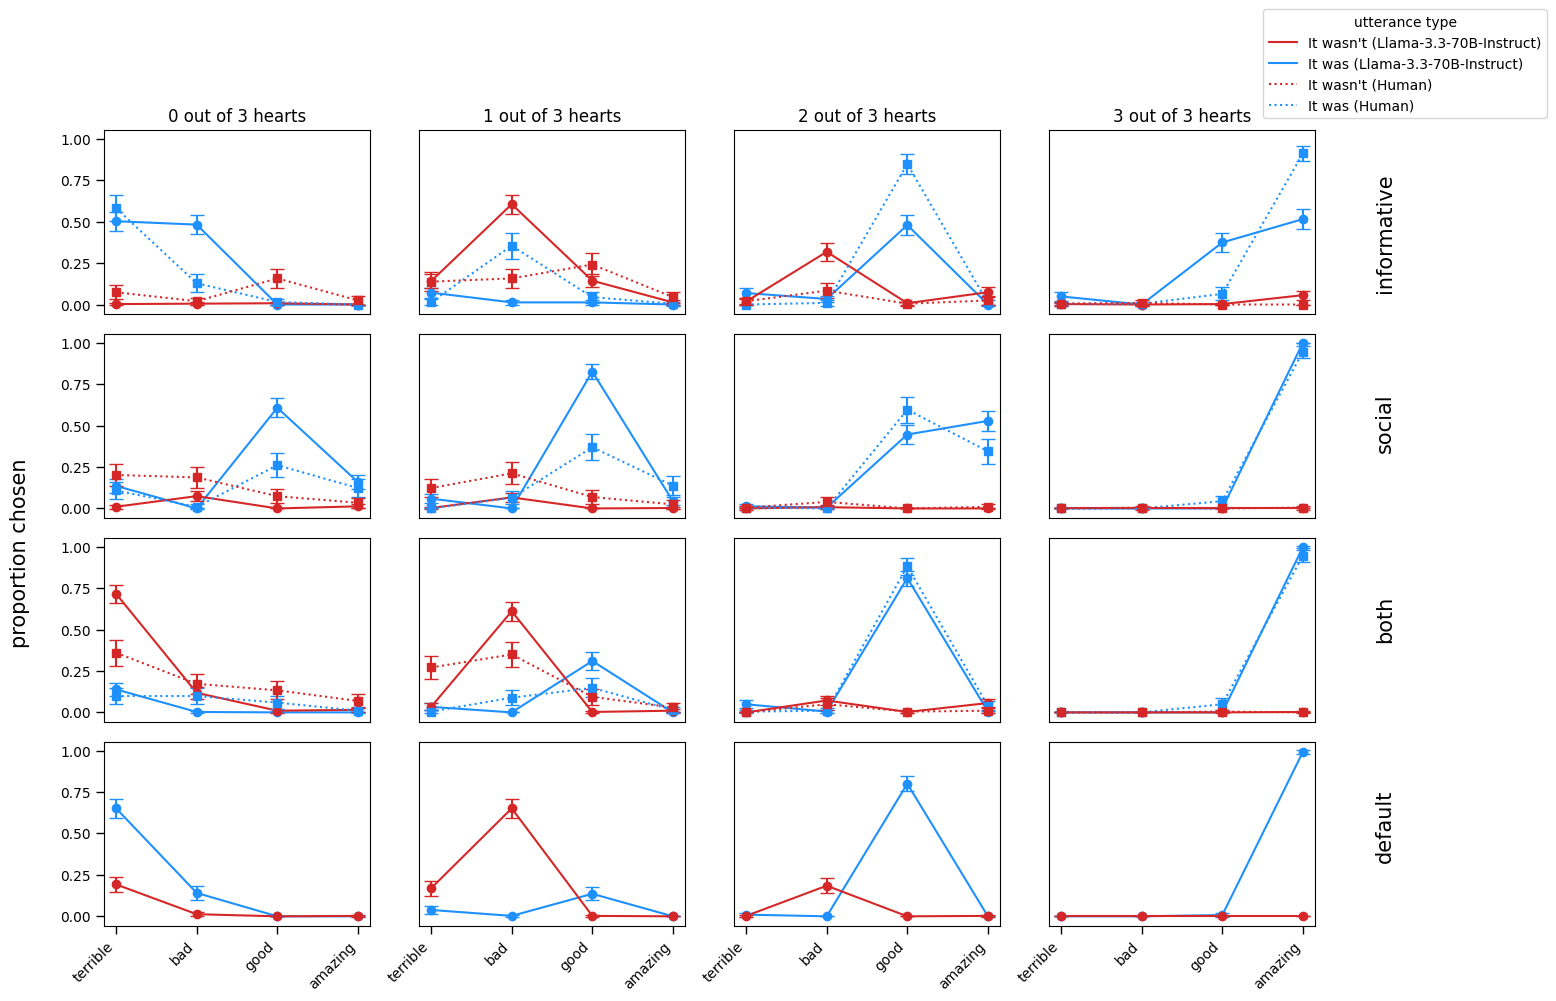

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load both datasets
llama_df = pd.read_csv("llama-3.3-70B-Instruct persona results.csv")
human_df = pd.read_csv("../../results/human_data_grouped_finalized.csv")

# Add total_responses columns
llama_df['total_responses'] = 390
human_df['total_responses'] = 203

# Function to calculate binomial proportion confidence interval
def binomial_ci(p, n):
    if n == 0:
        return 0
    se = np.sqrt((p * (1-p)) / n) * 2.3
    return se

desired_order = ["terrible", "bad", "good", "amazing"]
unique_goals = ["both", "default", "informative", "social"]
unique_num_hearts = ["0 out of 3 hearts", "1 out of 3 hearts", "2 out of 3 hearts", "3 out of 3 hearts"]
unique_llm_negations = ["It was", "It wasn't"]

# Convert llm_adjectives to categorical for both datasets
llama_df["llm_adjectives"] = pd.Categorical(llama_df["llm_adjectives"], categories=desired_order, ordered=True)
human_df["llm_adjectives"] = pd.Categorical(human_df["llm_adjectives"], categories=desired_order, ordered=True)

# Define colors and styles
colors = {"It wasn't": "#D62728", "It was": "dodgerblue"}
line_styles = {"llama": "-", "human": ":"}

# Map goals to rows
goal_row_mapping = {"informative": 0, "social": 1, "both": 2, "default": 3}

fig, axs = plt.subplots(4, len(unique_num_hearts), figsize=(15, 10), sharex=True, sharey=True)

for ax_row in axs:
    for ax in ax_row:
        ax.grid(False)

# Create a mapping between LLaMA and human heart formats
heart_mapping = {
    "0 out of 3 hearts": "0 hearts",
    "1 out of 3 hearts": "1 heart",
    "2 out of 3 hearts": "2 hearts",
    "3 out of 3 hearts": "3 hearts"
}

# Plot LLaMA data
for goal in unique_goals:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        for llm_negation in unique_llm_negations:
            data = llama_df[(llama_df["goal"] == goal) & 
                          (llama_df["num_hearts"] == num_heart) & 
                          (llama_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")
            color = colors[llm_negation]
            
            # Calculate error bars
            yerr = [binomial_ci(p, 390) for p in data["proportation"]]
            
            axs[row, j].errorbar(data["llm_adjectives"].cat.codes, data["proportation"], 
                                yerr=yerr, color=color, fmt='o', capsize=5)
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
                           color=color, linestyle=line_styles["llama"])
            if row == 0:
                axs[row, j].set_title(f"{num_heart}")

# Plot human data (only for first three rows)
for goal in ["informative", "social", "both"]:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        human_num_heart = heart_mapping[num_heart]
        for llm_negation in unique_llm_negations:
            data = human_df[(human_df["goal"] == goal) & 
                          (human_df["num_hearts"] == human_num_heart) & 
                          (human_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")
            color = colors[llm_negation]
            
            # Calculate error bars
            yerr = [binomial_ci(p, 203) for p in data["proportation"]]
            
            axs[row, j].errorbar(data["llm_adjectives"].cat.codes, data["proportation"], 
                                yerr=yerr, color=color, fmt='s', capsize=5)
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
                           color=color, linestyle=line_styles["human"])

# Labels and formatting
fig.text(0.02, 0.5, 'proportion chosen', va='center', rotation='vertical', size=15)

fig.text(0.93, 0.88, 'informative', va='top', rotation='vertical', size=15)
fig.text(0.93, 0.63, 'social', va='center', rotation='vertical', size=15)
fig.text(0.93, 0.41, 'both', va='bottom', rotation='vertical', size=15)
fig.text(0.93, 0.19, 'default', va='bottom', rotation='vertical', size=15)

for ax in axs[-1, :]:
    ax.set_xticks(range(len(desired_order)))
    ax.set_xticklabels(desired_order, rotation=45, ha='right')

plt.tight_layout(rect=[0.05, 0.05, 0.9, 0.96])

fig.legend(
    handles=handles,
    loc='upper center',  # Position it at the upper center
    bbox_to_anchor=(0.95, 1.05),  # Shift it slightly to the right and above the plot area
    title='utterance type',
    ncol=1  # Arrange items in a single column to save space
)

for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        # Enable ticks only for the leftmost and bottom axes
        if j != 0:  # Not the leftmost column
            ax.tick_params(axis='y', left=False)  # Remove y-axis ticks
        if i != len(axs) - 1:  # Not the bottom row
            ax.tick_params(axis='x', bottom=False)  # Remove x-axis ticks
        
        # Set ticks for the leftmost column and bottom row
        if j == 0:  # Leftmost column
            ax.tick_params(axis='y', direction='out', length=6, width=1)  # Prominent y-axis ticks
            ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])  # y-axis tick positions
        if i == len(axs) - 1:  # Bottom row
            ax.tick_params(axis='x', direction='out', length=6, width=1)  # Prominent x-axis ticks
            ax.set_xticks(range(len(desired_order)))  # x-axis tick positions
            ax.set_xticklabels(desired_order, rotation=45, ha='right')  # Rotate labels for readability

# Create legend
handles = [
    plt.Line2D([0], [0], color="#D62728", linestyle='-', label="It wasn't (Llama-3.3-70B-Instruct)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle='-', label="It was (Llama-3.3-70B-Instruct)"),
    plt.Line2D([0], [0], color="#D62728", linestyle=':', label="It wasn't (Human)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle=':', label="It was (Human)")
]
# fig.legend(handles=handles, loc='upper right', title='utterance type')

plt.show()

# Save plot
fig.savefig("./plots/human_llama_combined_results_with_marker_without_grid.pdf", bbox_inches='tight')

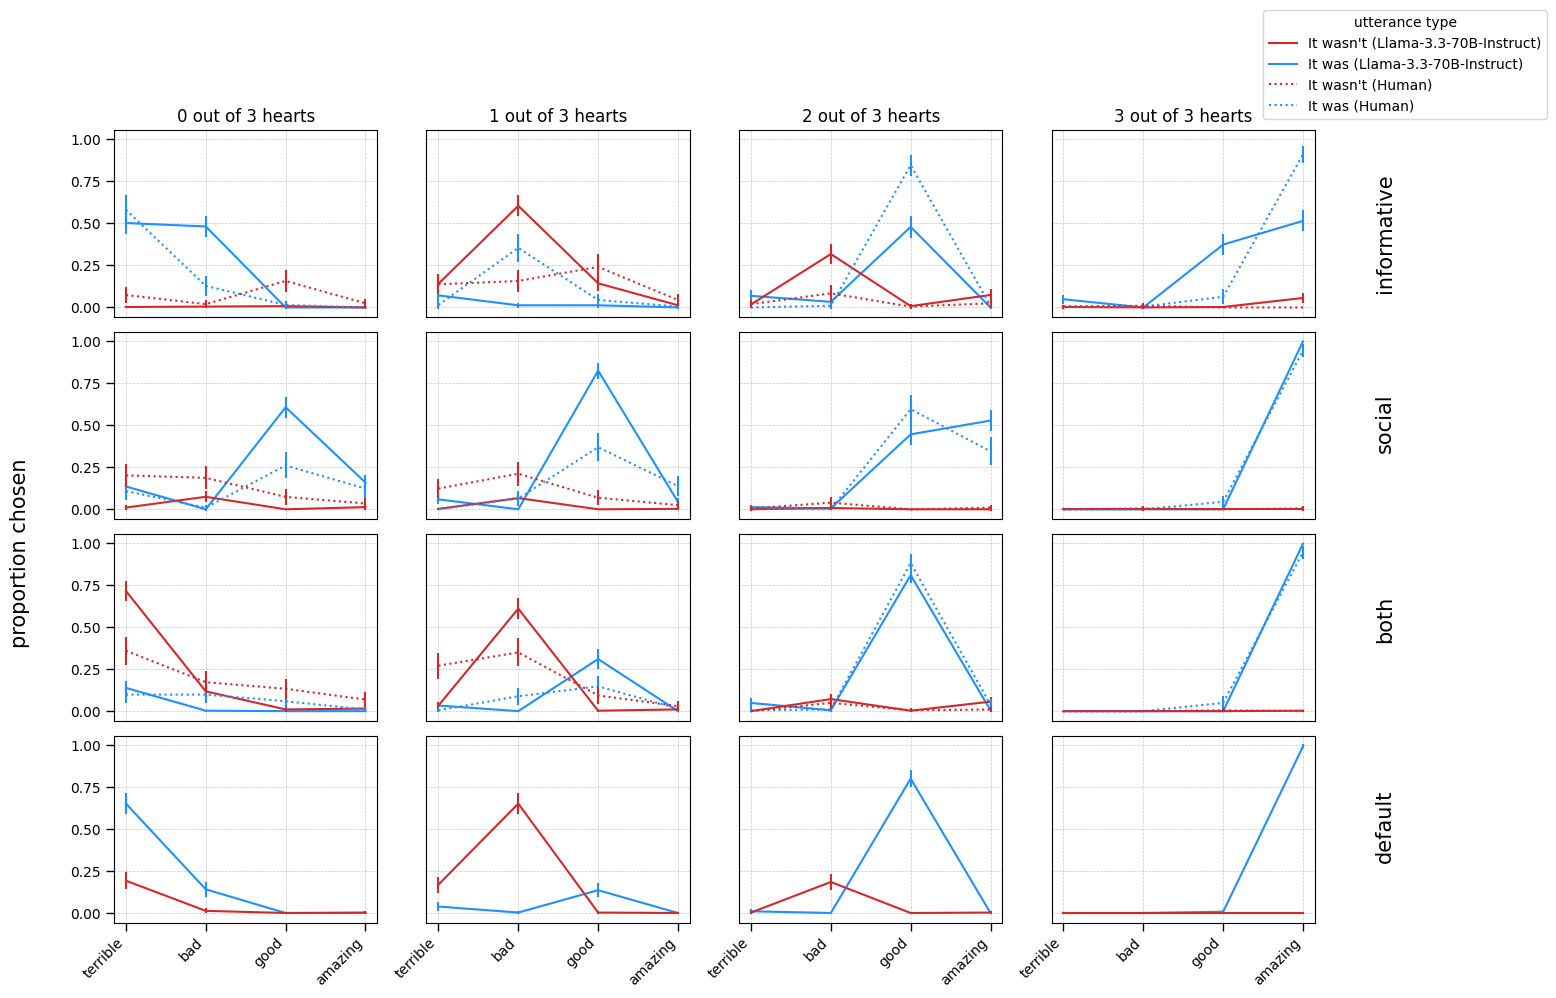

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load both datasets
llama_df = pd.read_csv("llama-3.3-70B-Instruct persona results.csv")
human_df = pd.read_csv("../../results/human_data_grouped_finalized.csv")

# Add total_responses columns
llama_df['total_responses'] = 390
human_df['total_responses'] = 203

# Function to calculate binomial proportion confidence interval

error_scale_factor = 2.5

def binomial_ci(p, n):
    if n == 0:
        return 0
    se = np.sqrt((p * (1-p)) / n) * error_scale_factor
    return se

desired_order = ["terrible", "bad", "good", "amazing"]
unique_goals = ["both", "default", "informative", "social"]
unique_num_hearts = ["0 out of 3 hearts", "1 out of 3 hearts", "2 out of 3 hearts", "3 out of 3 hearts"]
unique_llm_negations = ["It was", "It wasn't"]

# Convert llm_adjectives to categorical for both datasets
llama_df["llm_adjectives"] = pd.Categorical(llama_df["llm_adjectives"], categories=desired_order, ordered=True)
human_df["llm_adjectives"] = pd.Categorical(human_df["llm_adjectives"], categories=desired_order, ordered=True)

# Define colors and styles
# colors = {"It wasn't": "tomato", "It was": "dodgerblue"}
# line_styles = {"llama": "-", "human": ":"}

# Define colors and styles (color-blind friendly palette)
colors = {"It wasn't": "#D62728", "It was": "dodgerblue"}  # Blood-red and Blue
line_styles = {"llama": "-", "human": ":"}

# Map goals to rows
goal_row_mapping = {"informative": 0, "social": 1, "both": 2, "default": 3}

fig, axs = plt.subplots(4, len(unique_num_hearts), figsize=(15, 10), sharex=True, sharey=True)


for ax_row in axs:
    for ax in ax_row:
        ax.grid(False)

# Create a mapping between LLaMA and human heart formats
heart_mapping = {
    "0 out of 3 hearts": "0 hearts",
    "1 out of 3 hearts": "1 heart",
    "2 out of 3 hearts": "2 hearts",
    "3 out of 3 hearts": "3 hearts"
}

# Plot LLaMA data
for goal in unique_goals:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        for llm_negation in unique_llm_negations:
            data = llama_df[(llama_df["goal"] == goal) & 
                          (llama_df["num_hearts"] == num_heart) & 
                          (llama_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")
            color = colors[llm_negation]
            
            # Calculate error bars
            yerr = [binomial_ci(p, 390) for p in data["proportation"]]
            
            # Plot points and lines
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
                           color=color, linestyle=line_styles["llama"])
            
            # Add error bars as vertical lines
            for x, y, err in zip(data["llm_adjectives"].cat.codes, data["proportation"], yerr):
                axs[row, j].vlines(x=x, ymin=y-err, ymax=y+err, color=color, alpha=1)
            
            if row == 0:
                axs[row, j].set_title(f"{num_heart}")

# Plot human data (only for first three rows)
for goal in ["informative", "social", "both"]:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        human_num_heart = heart_mapping[num_heart]
        for llm_negation in unique_llm_negations:
            data = human_df[(human_df["goal"] == goal) & 
                          (human_df["num_hearts"] == human_num_heart) & 
                          (human_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")
            color = colors[llm_negation]
            
            # Calculate error bars
            yerr = [binomial_ci(p, 203) for p in data["proportation"]]
            
            # Plot points and lines
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
                           color=color, linestyle=line_styles["human"])
            
            # Add error bars as vertical lines
            for x, y, err in zip(data["llm_adjectives"].cat.codes, data["proportation"], yerr):
                axs[row, j].vlines(x=x, ymin=y-err, ymax=y+err, color=color, alpha=1)

# Labels and formatting
fig.text(0.02, 0.5, 'proportion chosen', va='center', rotation='vertical', size=15)

fig.text(0.93, 0.88, 'informative', va='top', rotation='vertical', size=15)
fig.text(0.93, 0.63, 'social', va='center', rotation='vertical', size=15)
fig.text(0.93, 0.41, 'both', va='bottom', rotation='vertical', size=15)
fig.text(0.93, 0.19, 'default', va='bottom', rotation='vertical', size=15)

for ax in axs[-1, :]:
    ax.set_xticks(range(len(desired_order)))
    ax.set_xticklabels(desired_order, rotation=45, ha='right')

fig.legend(
    handles=handles,
    loc='upper center',  # Position it at the upper center
    bbox_to_anchor=(0.95, 1.05),  # Shift it slightly to the right and above the plot area
    title='utterance type',
    ncol=1  # Arrange items in a single column to save space
)

for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        # Enable ticks only for the leftmost and bottom axes
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
        if j != 0:  # Not the leftmost column
            ax.tick_params(axis='y', left=False)  # Remove y-axis ticks
        if i != len(axs) - 1:  # Not the bottom row
            ax.tick_params(axis='x', bottom=False)  # Remove x-axis ticks
        
        # Set ticks for the leftmost column and bottom row
        if j == 0:  # Leftmost column
            ax.tick_params(axis='y', direction='out', length=6, width=1)  # Prominent y-axis ticks
            ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])  # y-axis tick positions
        if i == len(axs) - 1:  # Bottom row
            ax.tick_params(axis='x', direction='out', length=6, width=1)  # Prominent x-axis ticks
            ax.set_xticks(range(len(desired_order)))  # x-axis tick positions
            ax.set_xticklabels(desired_order, rotation=45, ha='right')  # Rotate labels for readability

# Set x-axis ticks for the bottom row
for ax in axs[-1, :]:
    ax.set_xticks(range(len(desired_order)))

plt.tight_layout(rect=[0.05, 0.05, 0.9, 0.96])
# plt.tight_layout(rect=[0.03, 0.03, 0.97, 0.97])  # Add padding

# Create legend
handles = [
    plt.Line2D([0], [0], color="#D62728", linestyle='-', label="It wasn't (Llama-3.3-70B-Instruct)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle='-', label="It was (Llama-3.3-70B-Instruct)"),
    plt.Line2D([0], [0], color="#D62728", linestyle=':', label="It wasn't (Human)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle=':', label="It was (Human)")
]
# fig.legend(handles=handles, loc='upper right', title='utterance type')

plt.show()

# Save plot
fig.savefig("./plots/human_llama_combined_results_without_marker_with_grid.pdf", bbox_inches='tight')

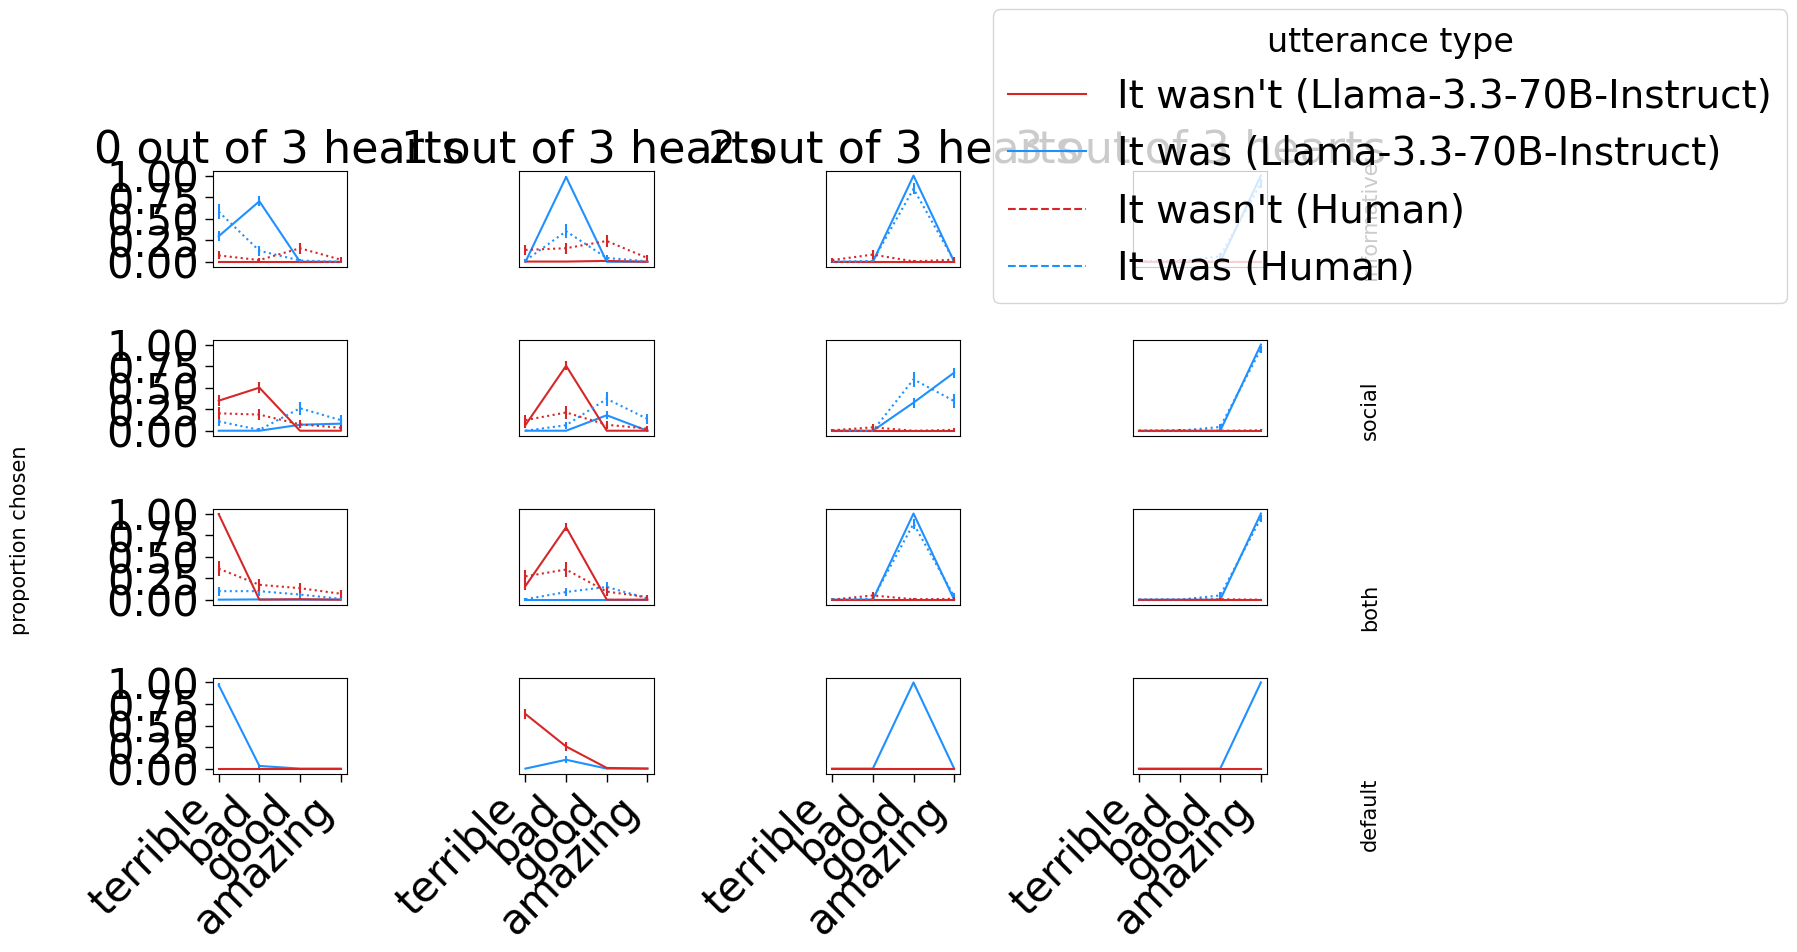

In [392]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load both datasets
llama_df = pd.read_csv("gpt-4o original results.csv")
human_df = pd.read_csv("../../results/human_data_grouped_finalized.csv")

# Add total_responses columns
llama_df['total_responses'] = 390
human_df['total_responses'] = 203

# Function to calculate binomial proportion confidence interval

error_scale_factor = 2.5

def binomial_ci(p, n):
    if n == 0:
        return 0
    se = np.sqrt((p * (1-p)) / n) * error_scale_factor
    return se

desired_order = ["terrible", "bad", "good", "amazing"]
unique_goals = ["both", "default", "informative", "social"]
unique_num_hearts = ["0 out of 3 hearts", "1 out of 3 hearts", "2 out of 3 hearts", "3 out of 3 hearts"]
unique_llm_negations = ["It was", "It wasn't"]

# Convert llm_adjectives to categorical for both datasets
llama_df["llm_adjectives"] = pd.Categorical(llama_df["llm_adjectives"], categories=desired_order, ordered=True)
human_df["llm_adjectives"] = pd.Categorical(human_df["llm_adjectives"], categories=desired_order, ordered=True)

# Define colors and styles
# colors = {"It wasn't": "tomato", "It was": "dodgerblue"}
# line_styles = {"llama": "-", "human": ":"}

# Define colors and styles (color-blind friendly palette)
colors = {"It wasn't": "#D62728", "It was": "dodgerblue"}  # Blood-red and Blue
line_styles = {"llama": "-", "human": ":"}

# Map goals to rows
goal_row_mapping = {"informative": 0, "social": 1, "both": 2, "default": 3}

fig, axs = plt.subplots(4, len(unique_num_hearts), figsize=(15, 10), sharex=True, sharey=True)

# Create a mapping between LLaMA and human heart formats
heart_mapping = {
    "0 out of 3 hearts": "0 hearts",
    "1 out of 3 hearts": "1 heart",
    "2 out of 3 hearts": "2 hearts",
    "3 out of 3 hearts": "3 hearts"
}

# Plot LLaMA data
for goal in unique_goals:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        for llm_negation in unique_llm_negations:
            data = llama_df[(llama_df["goal"] == goal) & 
                          (llama_df["num_hearts"] == num_heart) & 
                          (llama_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")
            color = colors[llm_negation]
            
            # Calculate error bars
            yerr = [binomial_ci(p, 390) for p in data["proportation"]]
            
            # Plot points and lines
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
                           color=color, linestyle=line_styles["llama"])
            
            # Add error bars as vertical lines
            for x, y, err in zip(data["llm_adjectives"].cat.codes, data["proportation"], yerr):
                axs[row, j].vlines(x=x, ymin=y-err, ymax=y+err, color=color, alpha=1)
            
            if row == 0:
                axs[row, j].set_title(f"{num_heart}")

# Plot human data (only for first three rows)
for goal in ["informative", "social", "both"]:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        human_num_heart = heart_mapping[num_heart]
        for llm_negation in unique_llm_negations:
            data = human_df[(human_df["goal"] == goal) & 
                          (human_df["num_hearts"] == human_num_heart) & 
                          (human_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")
            color = colors[llm_negation]
            
            # Calculate error bars
            yerr = [binomial_ci(p, 203) for p in data["proportation"]]
            
            # Plot points and lines
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
                           color=color, linestyle=line_styles["human"])
            
            # Add error bars as vertical lines
            for x, y, err in zip(data["llm_adjectives"].cat.codes, data["proportation"], yerr):
                axs[row, j].vlines(x=x, ymin=y-err, ymax=y+err, color=color, alpha=1)

# Labels and formatting
fig.text(0.03, 0.5, 'proportion chosen', va='center', rotation='vertical', size=15)

fig.text(0.93, 0.88, 'informative', va='top', rotation='vertical', size=15)
fig.text(0.93, 0.63, 'social', va='center', rotation='vertical', size=15)
fig.text(0.93, 0.41, 'both', va='bottom', rotation='vertical', size=15)
fig.text(0.93, 0.19, 'default', va='bottom', rotation='vertical', size=15)

for ax in axs[-1, :]:
    ax.set_xticks(range(len(desired_order)))
    ax.set_xticklabels(desired_order, rotation=45, ha='right')

fig.legend(
    handles=handles,
    loc='upper center',  # Position it at the upper center
    bbox_to_anchor=(0.95, 1.05),  # Shift it slightly to the right and above the plot area
    title='utterance type',
    title_fontsize=24,  # fontsize='large',
    # fontsize='large',
    ncol=1  # Arrange items in a single column to save space
)
# Add ticks to x-axis and y-axis
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        # Enable ticks only for the leftmost and bottom axes
        if j != 0:  # Not the leftmost column
            ax.tick_params(axis='y', left=False)  # Remove y-axis ticks
        if i != len(axs) - 1:  # Not the bottom row
            ax.tick_params(axis='x', bottom=False)  # Remove x-axis ticks
        
        # Set ticks for the leftmost column and bottom row
        if j == 0:  # Leftmost column
            ax.tick_params(axis='y', direction='out', length=6, width=1)  # Prominent y-axis ticks
            ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])  # y-axis tick positions
        if i == len(axs) - 1:  # Bottom row
            ax.tick_params(axis='x', direction='out', length=6, width=1)  # Prominent x-axis ticks
            ax.set_xticks(range(len(desired_order)))  # x-axis tick positions
            ax.set_xticklabels(desired_order, rotation=45, ha='right')  # Rotate labels for readability

# Set x-axis ticks for the bottom row
for ax in axs[-1, :]:
    ax.set_xticks(range(len(desired_order)))

plt.tight_layout(rect=[0.05, 0.05, 0.9, 0.96])

# Create legend
handles = [
    plt.Line2D([0], [0], color="#D62728", linestyle='-', label="It wasn't (Llama-3.3-70B-Instruct)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle='-', label="It was (Llama-3.3-70B-Instruct)"),
    plt.Line2D([0], [0], color="#D62728", linestyle=':', label="It wasn't (Human)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle=':', label="It was (Human)")
]
# fig.legend(handles=handles, loc='upper right', title='utterance type')

plt.show()

# Save plot
fig.savefig("./plots/human_llama_combined_results_without_marker_without_grid.pdf", bbox_inches='tight')

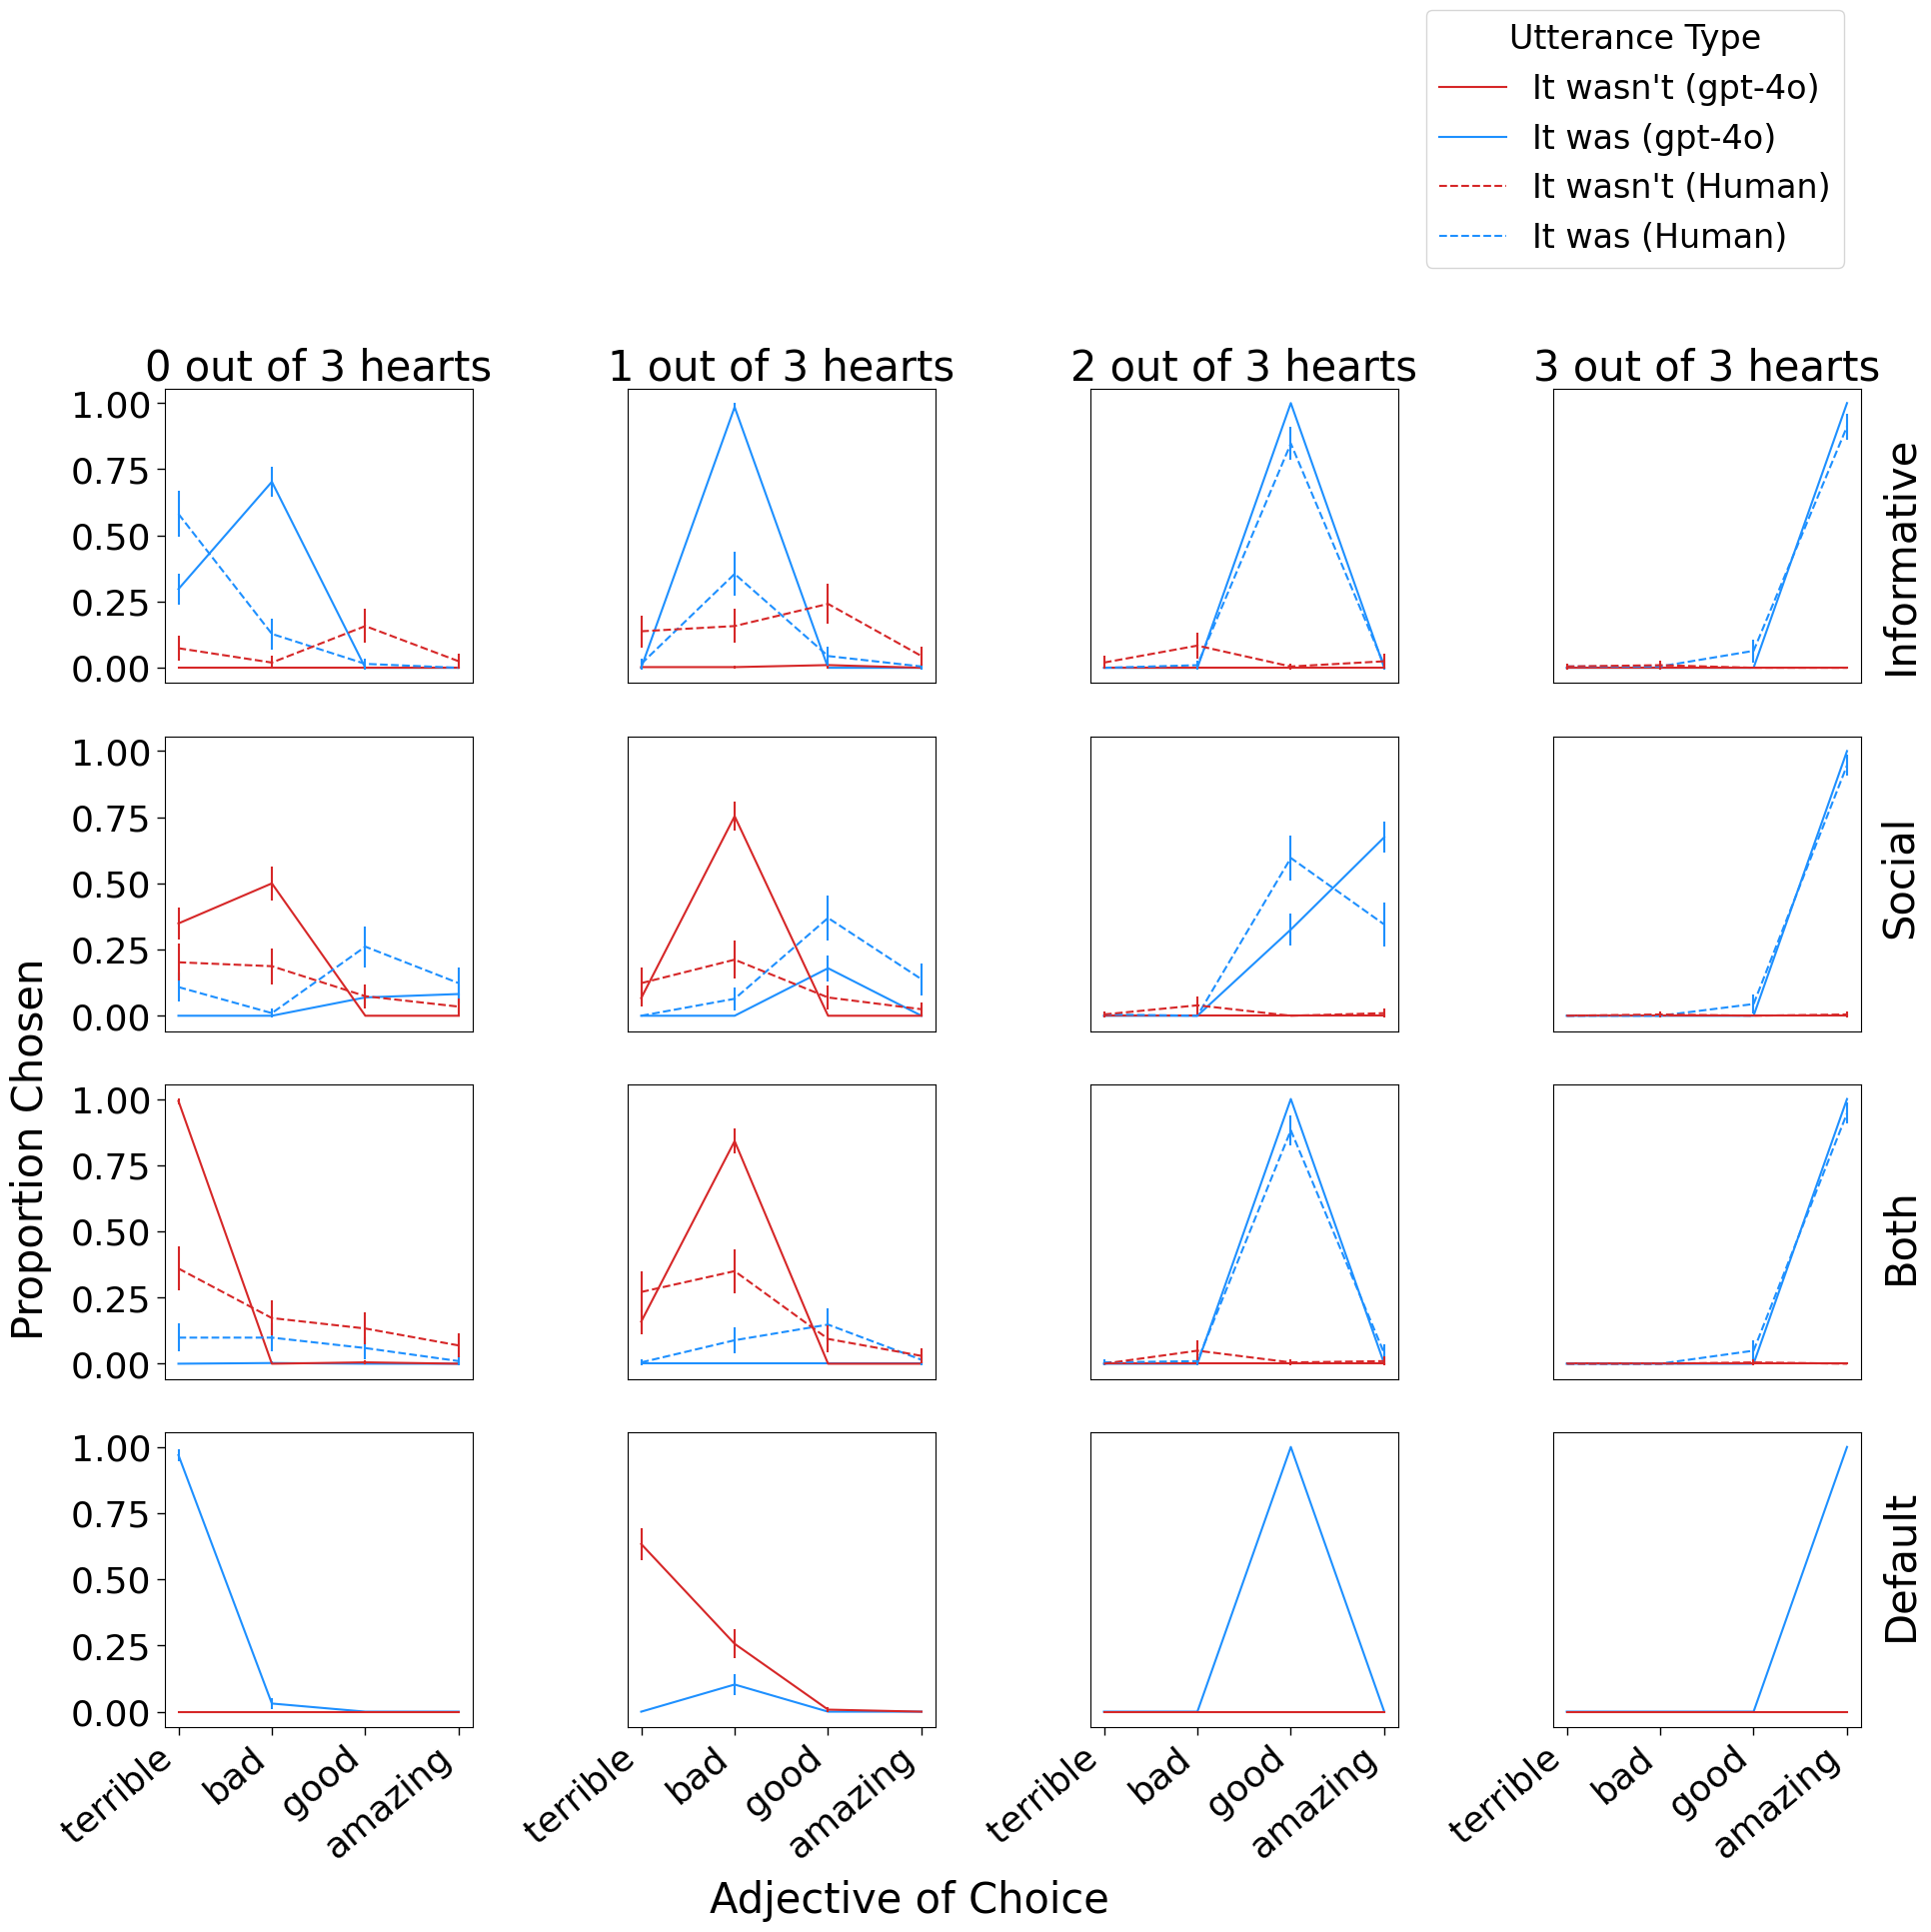

In [395]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define font sizes
# TITLE_FONT_SIZE = 5
LABEL_FONT_SIZE = 30
TICK_FONT_SIZE = 26
ANNOTATION_FONT_SIZE = 24
LEGEND_FONT_SIZE = 24

# Load both datasets
llama_df = pd.read_csv("gpt-4o original results.csv")
human_df = pd.read_csv("../../results/human_data_grouped_finalized.csv")

# Add total_responses columns
llama_df['total_responses'] = 390
human_df['total_responses'] = 203

# Function to calculate binomial proportion confidence interval
error_scale_factor = 2.5

def binomial_ci(p, n):
    if n == 0:
        return 0
    se = np.sqrt((p * (1-p)) / n) * error_scale_factor
    return se

desired_order = ["terrible", "bad", "good", "amazing"]
unique_goals = ["both", "default", "informative", "social"]
unique_num_hearts = ["0 out of 3 hearts", "1 out of 3 hearts", "2 out of 3 hearts", "3 out of 3 hearts"]
unique_llm_negations = ["It was", "It wasn't"]

# Convert llm_adjectives to categorical for both datasets
llama_df["llm_adjectives"] = pd.Categorical(llama_df["llm_adjectives"], categories=desired_order, ordered=True)
human_df["llm_adjectives"] = pd.Categorical(human_df["llm_adjectives"], categories=desired_order, ordered=True)

# Define colors and styles (color-blind friendly palette)
colors = {"It wasn't": "#D62728", "It was": "dodgerblue"}  # Blood-red and Blue
line_styles = {"llama": "-", "human": "--"}

# Map goals to rows
goal_row_mapping = {"informative": 0, "social": 1, "both": 2, "default": 3}

fig, axs = plt.subplots(4, len(unique_num_hearts), figsize=(20, 17), sharex=True, sharey=True)

# Create a mapping between LLaMA and human heart formats
heart_mapping = {
    "0 out of 3 hearts": "0 hearts",
    "1 out of 3 hearts": "1 heart",
    "2 out of 3 hearts": "2 hearts",
    "3 out of 3 hearts": "3 hearts"
}

# Plot LLaMA data
for goal in unique_goals:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        for llm_negation in unique_llm_negations:
            data = llama_df[(llama_df["goal"] == goal) & 
                          (llama_df["num_hearts"] == num_heart) & 
                          (llama_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")
            color = colors[llm_negation]
            
            # Calculate error bars
            yerr = [binomial_ci(p, 390) for p in data["proportation"]]
            
            # Plot points and lines
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
                           color=color, linestyle=line_styles["llama"])
            
            # Add error bars as vertical lines
            for x, y, err in zip(data["llm_adjectives"].cat.codes, data["proportation"], yerr):
                axs[row, j].vlines(x=x, ymin=y-err, ymax=y+err, color=color, alpha=1)
            
            if row == 0:
                axs[row, j].set_title(f"{num_heart}", fontsize=LABEL_FONT_SIZE)

# Plot human data (only for first three rows)
for goal in ["informative", "social", "both"]:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        human_num_heart = heart_mapping[num_heart]
        for llm_negation in unique_llm_negations:
            data = human_df[(human_df["goal"] == goal) & 
                          (human_df["num_hearts"] == human_num_heart) & 
                          (human_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")
            color = colors[llm_negation]
            
            # Calculate error bars
            yerr = [binomial_ci(p, 203) for p in data["proportation"]]
            
            # Plot points and lines
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
                           color=color, linestyle=line_styles["human"])
            
            # Add error bars as vertical lines
            for x, y, err in zip(data["llm_adjectives"].cat.codes, data["proportation"], yerr):
                axs[row, j].vlines(x=x, ymin=y-err, ymax=y+err, color=color, alpha=1)

# Labels and formatting
fig.text(0.05, 0.5, 'Proportion Chosen', va='center', rotation='vertical', fontsize=LABEL_FONT_SIZE)
# add x-label
fig.text(0.5, 0.05, 'Adjective of Choice', ha='center', fontsize=LABEL_FONT_SIZE)

fig.text(0.985, 0.92, 'Informative', va='top', rotation='vertical', fontsize=LABEL_FONT_SIZE)
fig.text(0.985, 0.66, 'Social', va='center', rotation='vertical', fontsize=LABEL_FONT_SIZE)
fig.text(0.985, 0.42, 'Both', va='bottom', rotation='vertical', fontsize=LABEL_FONT_SIZE)
fig.text(0.985, 0.21, 'Default', va='bottom', rotation='vertical', fontsize=LABEL_FONT_SIZE)

# Set x-axis tick labels
for ax in axs[-1, :]:
    ax.set_xticks(range(len(desired_order)))
    ax.set_xticklabels(desired_order, rotation=45, ha='right', fontsize=TICK_FONT_SIZE)

# Add ticks to x-axis and y-axis
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        # Enable ticks only for the leftmost and bottom axes
        if j != 0:  # Not the leftmost column
            ax.tick_params(axis='y', left=False)  # Remove y-axis ticks
        if i != len(axs) - 1:  # Not the bottom row
            ax.tick_params(axis='x', bottom=False)  # Remove x-axis ticks
        
        # Set ticks for the leftmost column and bottom row
        if j == 0:  # Leftmost column
            ax.tick_params(axis='y', direction='out', length=6, width=1, labelsize=TICK_FONT_SIZE)  # Prominent y-axis ticks
            ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])  # y-axis tick positions
        if i == len(axs) - 1:  # Bottom row
            ax.tick_params(axis='x', direction='out', length=6, width=1, labelsize=TICK_FONT_SIZE)  # Prominent x-axis ticks
            ax.set_xticks(range(len(desired_order)))  # x-axis tick positions
            ax.set_xticklabels(desired_order, rotation=40, ha='right', fontsize=TICK_FONT_SIZE)  # Rotate labels for readability

# Create legend
handles = [
    plt.Line2D([0], [0], color="#D62728", linestyle='-', label="It wasn't (gpt-4o)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle='-', label="It was (gpt-4o)"),
    plt.Line2D([0], [0], color="#D62728", linestyle='--', label="It wasn't (Human)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle='--', label="It was (Human)")
]
# fig.legend(handles=handles, loc='upper right', title='Utterance Type', title_fontsize=15, fontsize=LEGEND_FONT_SIZE)
fig.legend(handles=handles, loc='upper left', bbox_to_anchor=(0.75, 1.18), title='Utterance Type', title_fontsize=24, fontsize=LEGEND_FONT_SIZE)

# add title for the whole plot
# fig.suptitle('Proportion of Adjective Choices by Llama-3.3-70B and Human Participants', fontsize=LABEL_FONT_SIZE)

plt.tight_layout(rect=[0.05, 0.05, 1.00, 1.0])
plt.show()

# Save plot
fig.savefig("./plots/human_llama_combined_results_without_marker_without_grid.pdf", bbox_inches='tight')

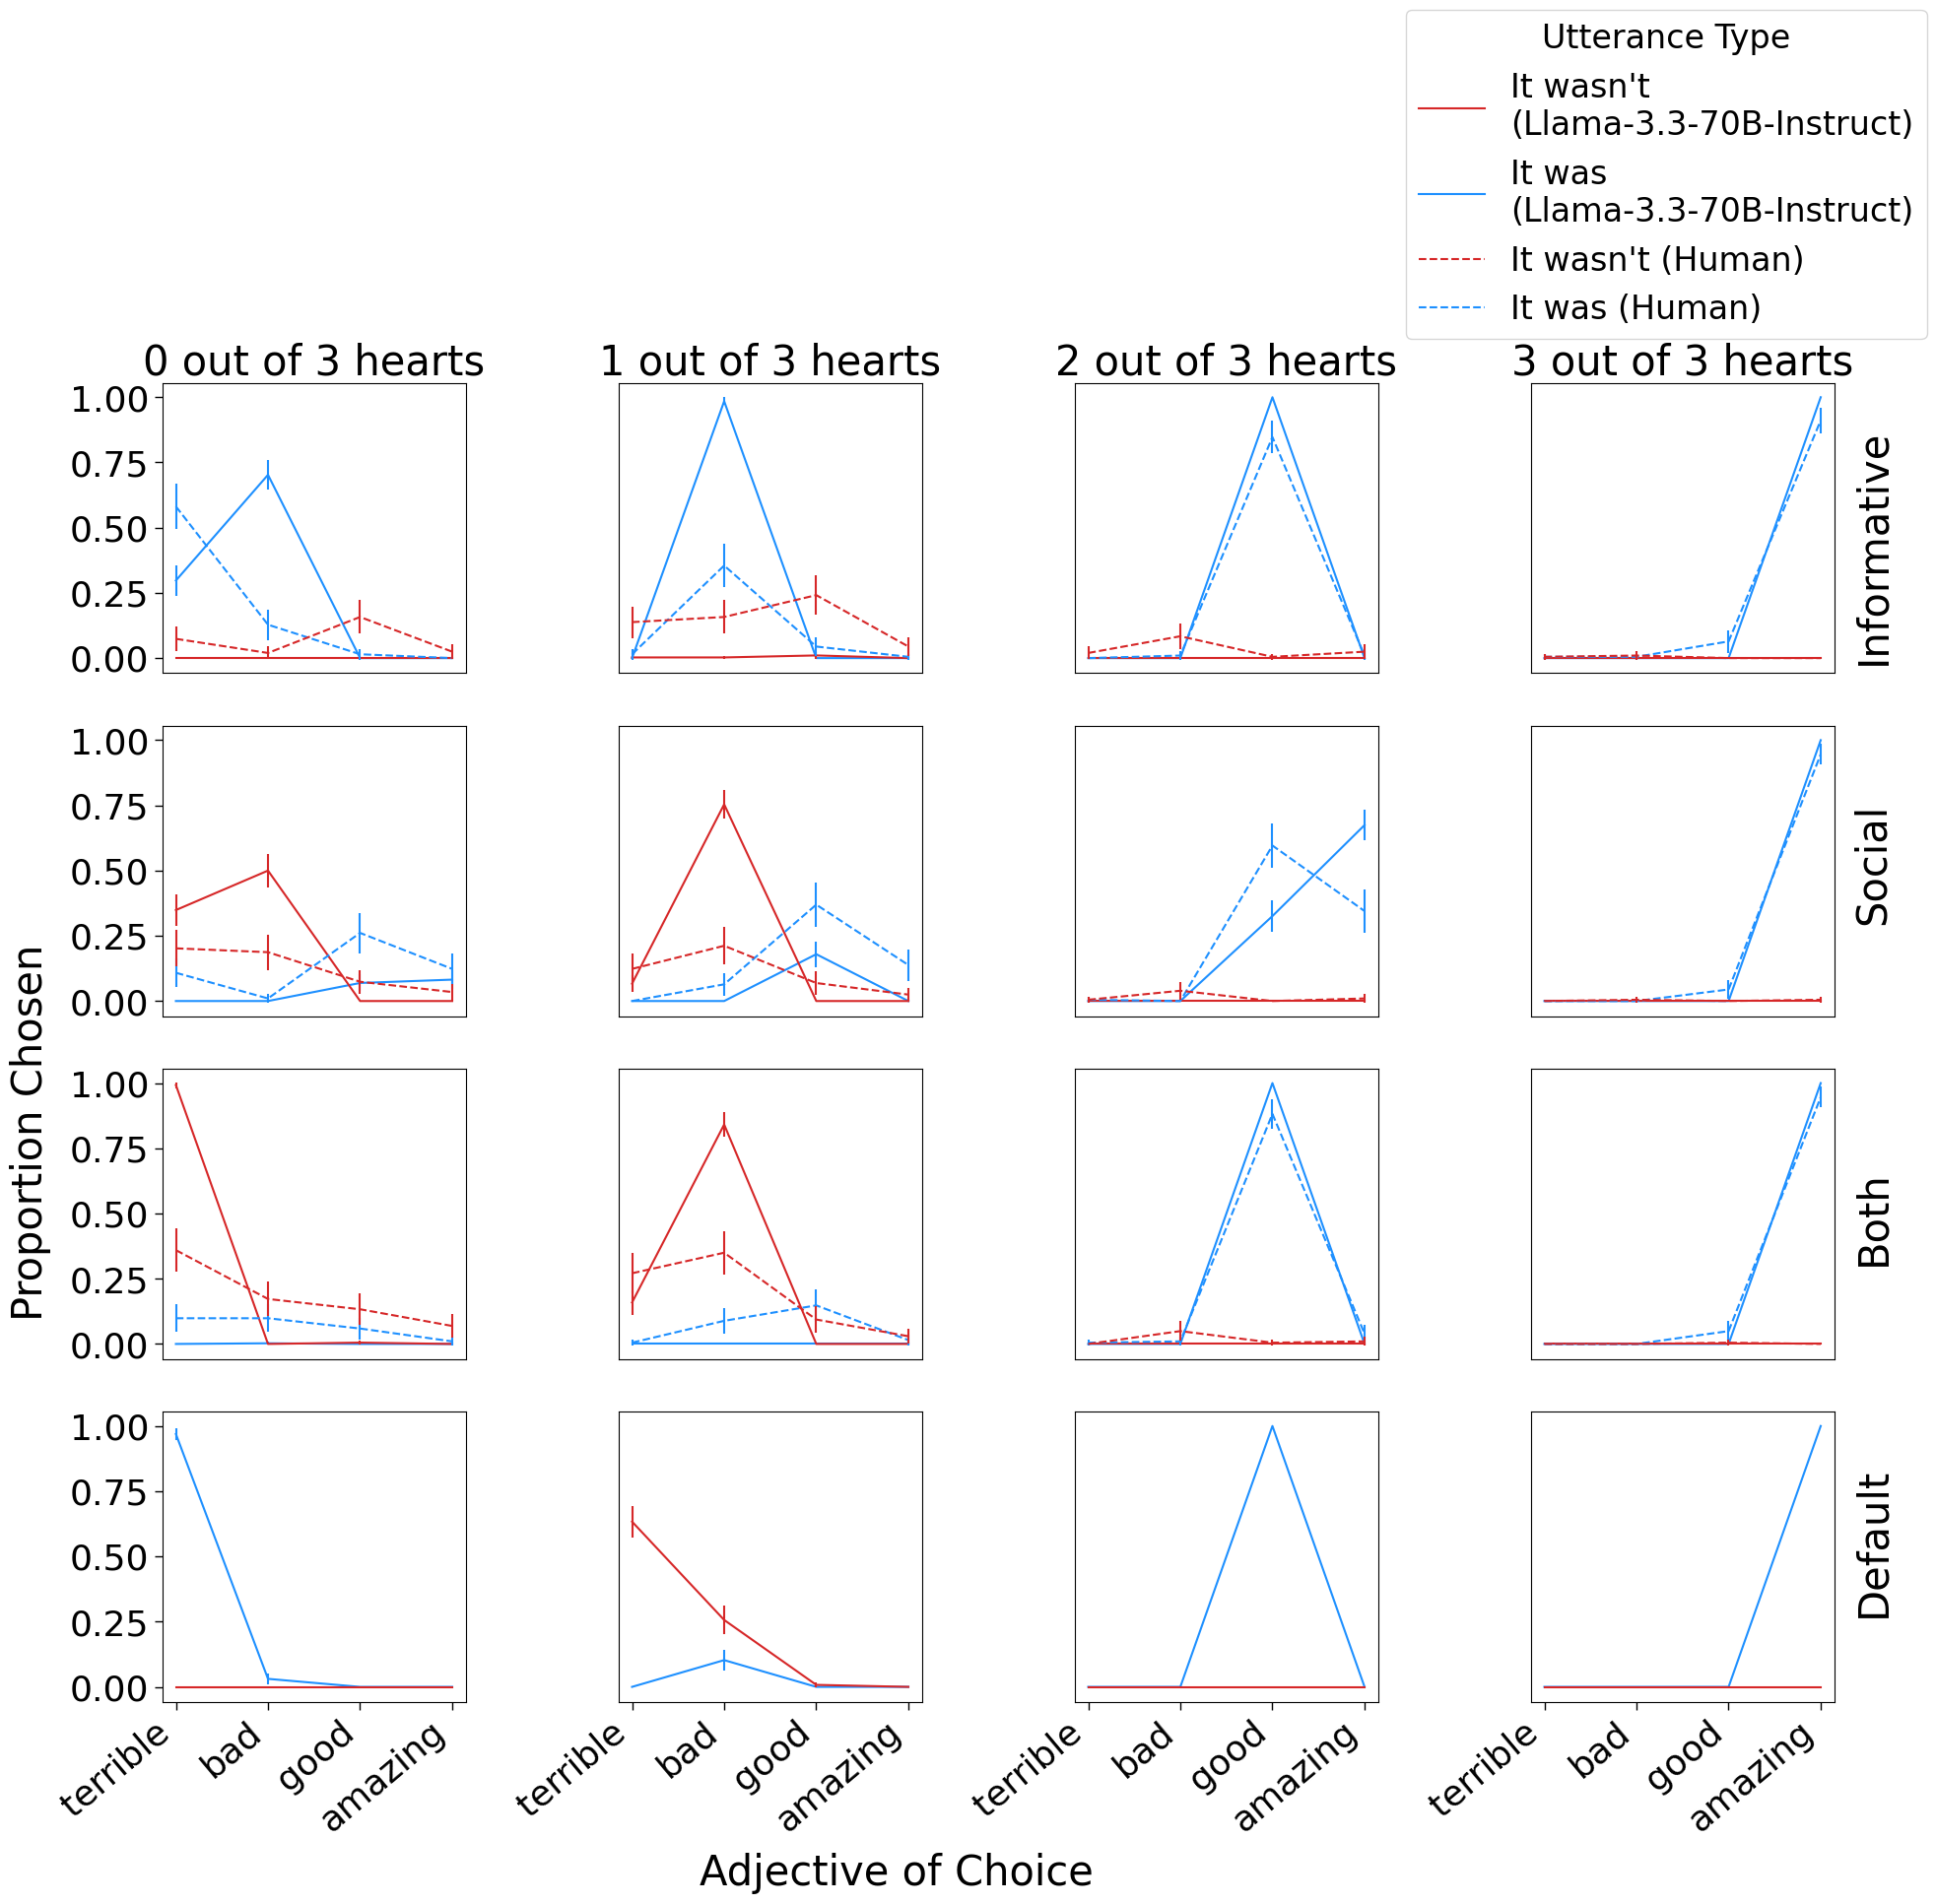

In [393]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define font sizes
# TITLE_FONT_SIZE = 5
LABEL_FONT_SIZE = 30
TICK_FONT_SIZE = 26
ANNOTATION_FONT_SIZE = 24
LEGEND_FONT_SIZE = 24

# Load both datasets
llama_df = pd.read_csv("gpt-4o original results.csv")
human_df = pd.read_csv("../../results/human_data_grouped_finalized.csv")

# Add total_responses columns
llama_df['total_responses'] = 390
human_df['total_responses'] = 203

# Function to calculate binomial proportion confidence interval
error_scale_factor = 2.5

def binomial_ci(p, n):
    if n == 0:
        return 0
    se = np.sqrt((p * (1-p)) / n) * error_scale_factor
    return se

desired_order = ["terrible", "bad", "good", "amazing"]
unique_goals = ["both", "default", "informative", "social"]
unique_num_hearts = ["0 out of 3 hearts", "1 out of 3 hearts", "2 out of 3 hearts", "3 out of 3 hearts"]
unique_llm_negations = ["It was", "It wasn't"]

# Convert llm_adjectives to categorical for both datasets
llama_df["llm_adjectives"] = pd.Categorical(llama_df["llm_adjectives"], categories=desired_order, ordered=True)
human_df["llm_adjectives"] = pd.Categorical(human_df["llm_adjectives"], categories=desired_order, ordered=True)

# Define colors and styles (color-blind friendly palette)
colors = {"It wasn't": "#D62728", "It was": "dodgerblue"}  # Blood-red and Blue
line_styles = {"llama": "-", "human": "--"}

# Map goals to rows
goal_row_mapping = {"informative": 0, "social": 1, "both": 2, "default": 3}

fig, axs = plt.subplots(4, len(unique_num_hearts), figsize=(20, 17), sharex=True, sharey=True)

# Create a mapping between LLaMA and human heart formats
heart_mapping = {
    "0 out of 3 hearts": "0 hearts",
    "1 out of 3 hearts": "1 heart",
    "2 out of 3 hearts": "2 hearts",
    "3 out of 3 hearts": "3 hearts"
}

# Plot LLaMA data
for goal in unique_goals:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        for llm_negation in unique_llm_negations:
            data = llama_df[(llama_df["goal"] == goal) & 
                          (llama_df["num_hearts"] == num_heart) & 
                          (llama_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")
            color = colors[llm_negation]
            
            # Calculate error bars
            yerr = [binomial_ci(p, 390) for p in data["proportation"]]
            
            # Plot points and lines
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
                           color=color, linestyle=line_styles["llama"])
            
            # Add error bars as vertical lines
            for x, y, err in zip(data["llm_adjectives"].cat.codes, data["proportation"], yerr):
                axs[row, j].vlines(x=x, ymin=y-err, ymax=y+err, color=color, alpha=1)
            
            if row == 0:
                axs[row, j].set_title(f"{num_heart}", fontsize=LABEL_FONT_SIZE)

# Plot human data (only for first three rows)
for goal in ["informative", "social", "both"]:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        human_num_heart = heart_mapping[num_heart]
        for llm_negation in unique_llm_negations:
            data = human_df[(human_df["goal"] == goal) & 
                          (human_df["num_hearts"] == human_num_heart) & 
                          (human_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")
            color = colors[llm_negation]
            
            # Calculate error bars
            yerr = [binomial_ci(p, 203) for p in data["proportation"]]
            
            # Plot points and lines
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
                           color=color, linestyle=line_styles["human"])
            
            # Add error bars as vertical lines
            for x, y, err in zip(data["llm_adjectives"].cat.codes, data["proportation"], yerr):
                axs[row, j].vlines(x=x, ymin=y-err, ymax=y+err, color=color, alpha=1)

# Labels and formatting
fig.text(0.05, 0.5, 'Proportion Chosen', va='center', rotation='vertical', fontsize=LABEL_FONT_SIZE)
# add x-label
fig.text(0.5, 0.05, 'Adjective of Choice', ha='center', fontsize=LABEL_FONT_SIZE)

fig.text(0.985, 0.92, 'Informative', va='top', rotation='vertical', fontsize=LABEL_FONT_SIZE)
fig.text(0.985, 0.66, 'Social', va='center', rotation='vertical', fontsize=LABEL_FONT_SIZE)
fig.text(0.985, 0.42, 'Both', va='bottom', rotation='vertical', fontsize=LABEL_FONT_SIZE)
fig.text(0.985, 0.21, 'Default', va='bottom', rotation='vertical', fontsize=LABEL_FONT_SIZE)

# Set x-axis tick labels
for ax in axs[-1, :]:
    ax.set_xticks(range(len(desired_order)))
    ax.set_xticklabels(desired_order, rotation=45, ha='right', fontsize=TICK_FONT_SIZE)

# Add ticks to x-axis and y-axis
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        # Enable ticks only for the leftmost and bottom axes
        if j != 0:  # Not the leftmost column
            ax.tick_params(axis='y', left=False)  # Remove y-axis ticks
        if i != len(axs) - 1:  # Not the bottom row
            ax.tick_params(axis='x', bottom=False)  # Remove x-axis ticks
        
        # Set ticks for the leftmost column and bottom row
        if j == 0:  # Leftmost column
            ax.tick_params(axis='y', direction='out', length=6, width=1, labelsize=TICK_FONT_SIZE)  # Prominent y-axis ticks
            ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])  # y-axis tick positions
        if i == len(axs) - 1:  # Bottom row
            ax.tick_params(axis='x', direction='out', length=6, width=1, labelsize=TICK_FONT_SIZE)  # Prominent x-axis ticks
            ax.set_xticks(range(len(desired_order)))  # x-axis tick positions
            ax.set_xticklabels(desired_order, rotation=40, ha='right', fontsize=TICK_FONT_SIZE)  # Rotate labels for readability

# Create legend
handles = [
    plt.Line2D([0], [0], color="#D62728", linestyle='-', label="It wasn't \n(Llama-3.3-70B-Instruct)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle='-', label="It was \n(Llama-3.3-70B-Instruct)"),
    plt.Line2D([0], [0], color="#D62728", linestyle='--', label="It wasn't (Human)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle='--', label="It was (Human)")
]
# fig.legend(handles=handles, loc='upper right', title='Utterance Type', title_fontsize=15, fontsize=LEGEND_FONT_SIZE)
fig.legend(handles=handles, loc='upper left', bbox_to_anchor=(0.75, 1.18), title='Utterance Type', title_fontsize=24, fontsize=LEGEND_FONT_SIZE)

# add title for the whole plot
# fig.suptitle('Proportion of Adjective Choices by Llama-3.3-70B and Human Participants', fontsize=LABEL_FONT_SIZE)

plt.tight_layout(rect=[0.05, 0.05, 1.00, 1.0])
plt.show()

# Save plot
fig.savefig("./plots/human_llama_combined_results_without_marker_without_grid.pdf", bbox_inches='tight')

In [309]:
human_df = pd.read_csv("../../results/human_data_grouped_finalized.csv")

human_df

goal num_hearts  proportation llm_negations llm_adjectives
0     both   0 hearts      0.359606     It wasn't       terrible
1     both   0 hearts      0.172414     It wasn't            bad
2     both   0 hearts      0.133005     It wasn't           good
3     both   0 hearts      0.098522        It was            bad
4     both   0 hearts      0.098522        It was       terrible
..     ...        ...           ...           ...            ...
91  social   3 hearts      0.004926     It wasn't            bad
92  social   3 hearts      0.000000     It wasn't       terrible
93  social   3 hearts      0.000000        It was            bad
94  social   3 hearts      0.000000        It was       terrible
95  social   3 hearts      0.000000     It wasn't           good

[96 rows x 5 columns]

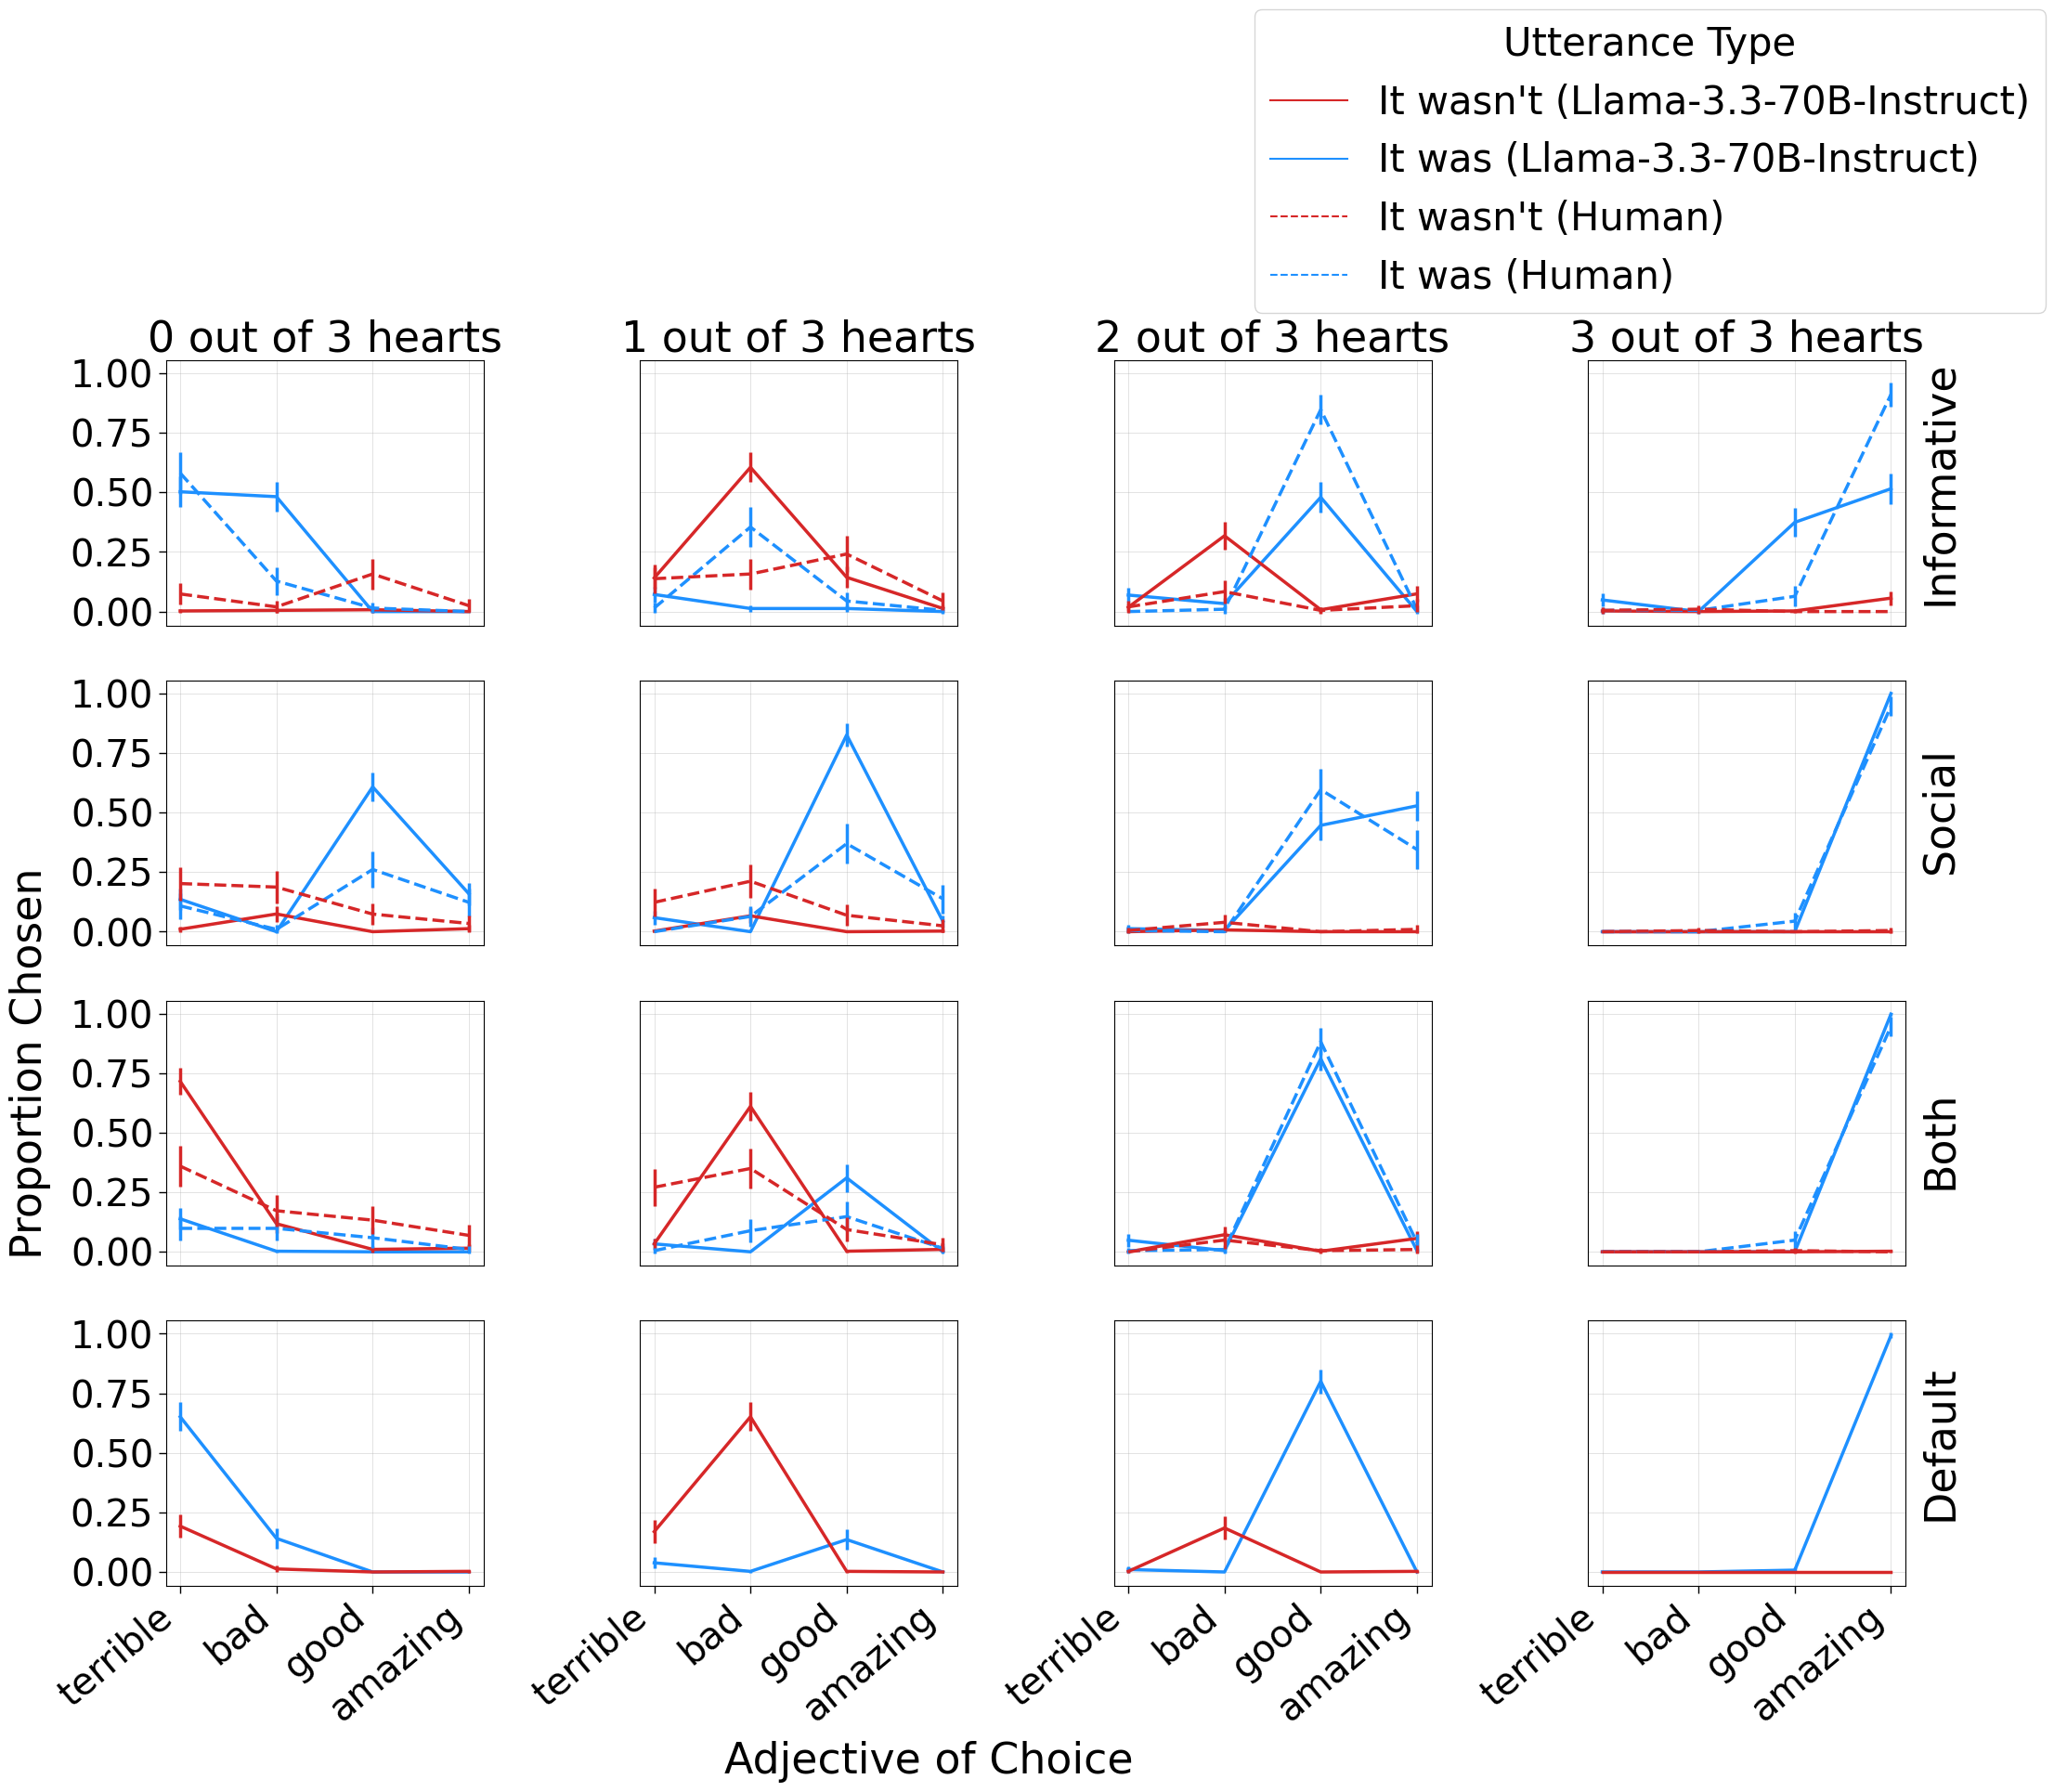

In [361]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define font sizes
# TITLE_FONT_SIZE = 5
LABEL_FONT_SIZE = 33
TICK_FONT_SIZE = 29
ANNOTATION_FONT_SIZE = 24
LEGEND_FONT_SIZE = 30

# Load both datasets
llama_df = pd.read_csv("llama-3.3-70B-Instruct persona results.csv")
human_df = pd.read_csv("../../results/human_data_grouped_finalized.csv")

# Add total_responses columns
llama_df['total_responses'] = 390
human_df['total_responses'] = 203

# Function to calculate binomial proportion confidence interval
error_scale_factor = 2.5

def binomial_ci(p, n):
    if n == 0:
        return 0
    se = np.sqrt((p * (1-p)) / n) * error_scale_factor
    return se

desired_order = ["terrible", "bad", "good", "amazing"]
unique_goals = ["both", "default", "informative", "social"]
unique_num_hearts = ["0 out of 3 hearts", "1 out of 3 hearts", "2 out of 3 hearts", "3 out of 3 hearts"]
unique_llm_negations = ["It was", "It wasn't"]

# Convert llm_adjectives to categorical for both datasets
llama_df["llm_adjectives"] = pd.Categorical(llama_df["llm_adjectives"], categories=desired_order, ordered=True)
human_df["llm_adjectives"] = pd.Categorical(human_df["llm_adjectives"], categories=desired_order, ordered=True)

# Define colors and styles (color-blind friendly palette)
colors = {"It wasn't": "#D62728", "It was": "dodgerblue"}  # Blood-red and Blue
line_styles = {"llama": "-", "human": "--"}

# Map goals to rows
goal_row_mapping = {"informative": 0, "social": 1, "both": 2, "default": 3}

fig, axs = plt.subplots(4, len(unique_num_hearts), figsize=(22, 17), sharex=True, sharey=True)

# Create a mapping between LLaMA and human heart formats
heart_mapping = {
    "0 out of 3 hearts": "0 hearts",
    "1 out of 3 hearts": "1 heart",
    "2 out of 3 hearts": "2 hearts",
    "3 out of 3 hearts": "3 hearts"
}

# Plot LLaMA data
for goal in unique_goals:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        for llm_negation in unique_llm_negations:
            data = llama_df[(llama_df["goal"] == goal) & 
                          (llama_df["num_hearts"] == num_heart) & 
                          (llama_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")
            color = colors[llm_negation]
            
            # Calculate error bars
            yerr = [binomial_ci(p, 390) for p in data["proportation"]]
            
            # Plot points and lines
            # axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
            #                color=color, linestyle=line_styles["llama"])
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
                 color=color, linestyle=line_styles["llama"], linewidth=2.5)  # Adjust linewidth
            
            # Add error bars as vertical lines
            for x, y, err in zip(data["llm_adjectives"].cat.codes, data["proportation"], yerr):
                axs[row, j].vlines(x=x, ymin=y-err, ymax=y+err, color=color, alpha=1, linewidth=2.5)  # Adjust linewidth
            
            if row == 0:
                axs[row, j].set_title(f"{num_heart}", fontsize=LABEL_FONT_SIZE)

# Plot human data (only for first three rows)
for goal in ["informative", "social", "both"]:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        human_num_heart = heart_mapping[num_heart]
        for llm_negation in unique_llm_negations:
            data = human_df[(human_df["goal"] == goal) & 
                          (human_df["num_hearts"] == human_num_heart) & 
                          (human_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")
            color = colors[llm_negation]
            
            # Calculate error bars
            yerr = [binomial_ci(p, 203) for p in data["proportation"]]
            
            # Plot points and lines
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
                           color=color, linestyle=line_styles["human"], linewidth=2.5)  # Adjust linewidth
            
            # Add error bars as vertical lines
            for x, y, err in zip(data["llm_adjectives"].cat.codes, data["proportation"], yerr):
                axs[row, j].vlines(x=x, ymin=y-err, ymax=y+err, color=color, alpha=1, linewidth=2.5)  # Adjust linewidth

# Labels and formatting
fig.text(0.05, 0.5, 'Proportion Chosen', va='center', rotation='vertical', fontsize=LABEL_FONT_SIZE)
# add x-label
fig.text(0.5, 0.05, 'Adjective of Choice', ha='center', fontsize=LABEL_FONT_SIZE)

fig.text(0.985, 0.945, 'Informative', va='top', rotation='vertical', fontsize=LABEL_FONT_SIZE)
fig.text(0.985, 0.66, 'Social', va='center', rotation='vertical', fontsize=LABEL_FONT_SIZE)
fig.text(0.985, 0.42, 'Both', va='bottom', rotation='vertical', fontsize=LABEL_FONT_SIZE)
fig.text(0.985, 0.21, 'Default', va='bottom', rotation='vertical', fontsize=LABEL_FONT_SIZE)

# Set x-axis tick labels
for ax in axs[-1, :]:
    ax.set_xticks(range(len(desired_order)))
    ax.set_xticklabels(desired_order, rotation=45, ha='right', fontsize=TICK_FONT_SIZE)

# Add ticks to x-axis and y-axis
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        # Enable ticks only for the leftmost and bottom axes
        if j != 0:  # Not the leftmost column
            ax.tick_params(axis='y', left=False)  # Remove y-axis ticks
        if i != len(axs) - 1:  # Not the bottom row
            ax.tick_params(axis='x', bottom=False)  # Remove x-axis ticks
        
        # Set ticks for the leftmost column and bottom row
        if j == 0:  # Leftmost column
            ax.tick_params(axis='y', direction='out', length=6, width=1, labelsize=TICK_FONT_SIZE)  # Prominent y-axis ticks
            ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])  # y-axis tick positions
        if i == len(axs) - 1:  # Bottom row
            ax.tick_params(axis='x', direction='out', length=6, width=1, labelsize=TICK_FONT_SIZE)  # Prominent x-axis ticks
            ax.set_xticks(range(len(desired_order)))  # x-axis tick positions
            ax.set_xticklabels(desired_order, rotation=40, ha='right', fontsize=TICK_FONT_SIZE)  # Rotate labels for readability

        # Add light grid to each subplot
        ax.grid(True, linestyle='-', linewidth=0.5, alpha=0.5)

# Create legend
handles = [
    plt.Line2D([0], [0], color="#D62728", linestyle='-', label="It wasn't (Llama-3.3-70B-Instruct)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle='-', label="It was (Llama-3.3-70B-Instruct)"),
    plt.Line2D([0], [0], color="#D62728", linestyle='--', label="It wasn't (Human)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle='--', label="It was (Human)")
]
# fig.legend(handles=handles, loc='upper right', title='Utterance Type', title_fontsize=15, fontsize=LEGEND_FONT_SIZE)
fig.legend(handles=handles, loc='upper left', bbox_to_anchor=(0.65, 1.18), title='Utterance Type', title_fontsize=30, fontsize=LEGEND_FONT_SIZE)

# add title for the whole plot
# fig.suptitle('Proportion of Adjective Choices by Llama-3.3-70B and Human Participants', fontsize=LABEL_FONT_SIZE)

plt.tight_layout(rect=[0.05, 0.05, 1.00, 1.0])
plt.show()

# Save plot
fig.savefig("./plots/human_llama_combined_results_without_marker_without_grid.pdf", bbox_inches='tight')

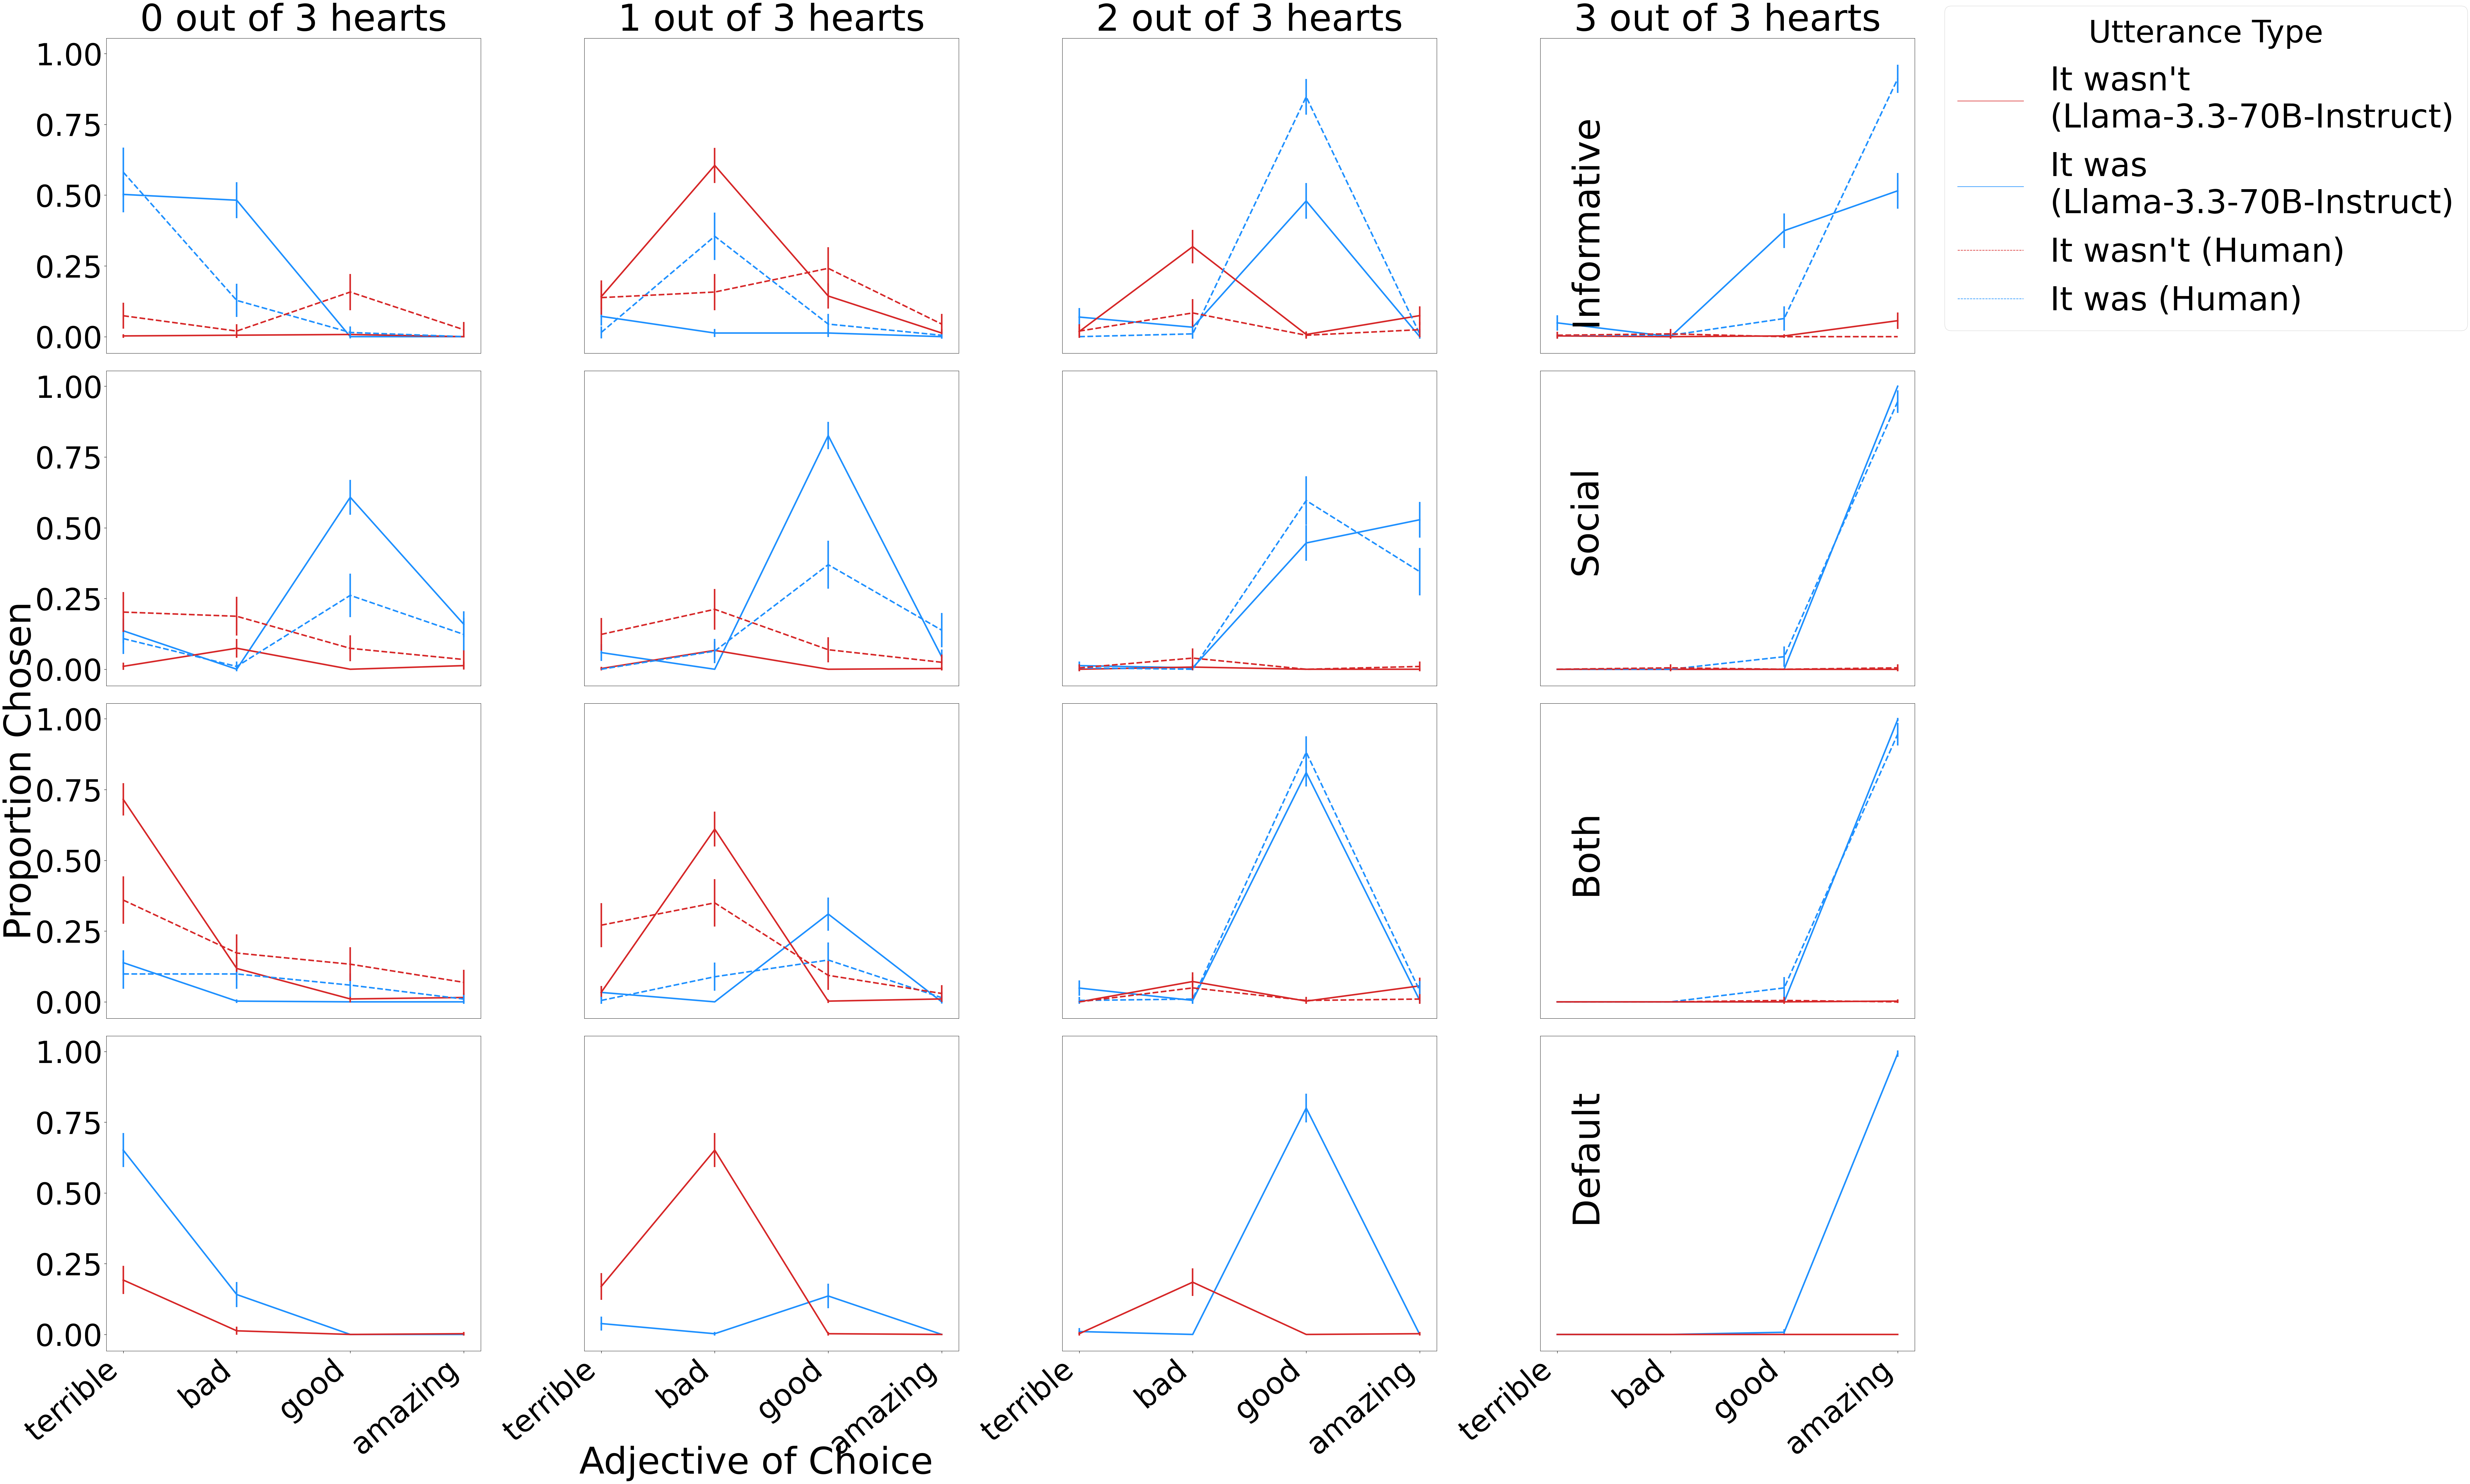

In [331]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define font sizes
# TITLE_FONT_SIZE = 5
LABEL_FONT_SIZE = 95
TICK_FONT_SIZE = 78
ANNOTATION_FONT_SIZE = 70
LEGEND_FONT_SIZE = 85

# Load both datasets
llama_df = pd.read_csv("llama-3.3-70B-Instruct persona results.csv")
human_df = pd.read_csv("../../results/human_data_grouped_finalized.csv")

# Add total_responses columns
llama_df['total_responses'] = 390
human_df['total_responses'] = 203

# Function to calculate binomial proportion confidence interval
error_scale_factor = 2.5

def binomial_ci(p, n):
    if n == 0:
        return 0
    se = np.sqrt((p * (1-p)) / n) * error_scale_factor
    return se

desired_order = ["terrible", "bad", "good", "amazing"]
unique_goals = ["both", "default", "informative", "social"]
unique_num_hearts = ["0 out of 3 hearts", "1 out of 3 hearts", "2 out of 3 hearts", "3 out of 3 hearts"]
unique_llm_negations = ["It was", "It wasn't"]

# Convert llm_adjectives to categorical for both datasets
llama_df["llm_adjectives"] = pd.Categorical(llama_df["llm_adjectives"], categories=desired_order, ordered=True)
human_df["llm_adjectives"] = pd.Categorical(human_df["llm_adjectives"], categories=desired_order, ordered=True)

# Define colors and styles (color-blind friendly palette)
colors = {"It wasn't": "#D62728", "It was": "dodgerblue"}  # Blood-red and Blue
line_styles = {"llama": "-", "human": "--"}

# Map goals to rows
goal_row_mapping = {"informative": 0, "social": 1, "both": 2, "default": 3}

fig, axs = plt.subplots(4, len(unique_num_hearts), figsize=(60, 56), sharex=True, sharey=True)

# Create a mapping between LLaMA and human heart formats
heart_mapping = {
    "0 out of 3 hearts": "0 hearts",
    "1 out of 3 hearts": "1 heart",
    "2 out of 3 hearts": "2 hearts",
    "3 out of 3 hearts": "3 hearts"
}

# Plot LLaMA data
for goal in unique_goals:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        for llm_negation in unique_llm_negations:
            data = llama_df[(llama_df["goal"] == goal) & 
                          (llama_df["num_hearts"] == num_heart) & 
                          (llama_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")
            color = colors[llm_negation]
            
            # Calculate error bars
            yerr = [binomial_ci(p, 390) for p in data["proportation"]]
            
            # Plot points and lines
            # axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
            #                color=color, linestyle=line_styles["llama"])
            
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
                 color=color, linestyle=line_styles["llama"], linewidth=4)  # Adjust linewidth
            
            # Add error bars as vertical lines
            for x, y, err in zip(data["llm_adjectives"].cat.codes, data["proportation"], yerr):
                # axs[row, j].vlines(x=x, ymin=y-err, ymax=y+err, color=color, alpha=1)
                axs[row, j].vlines(x=x, ymin=y-err, ymax=y+err, color=color, alpha=1, linewidth=4)  # Adjust linewidth
            
            if row == 0:
                axs[row, j].set_title(f"{num_heart}", fontsize=LABEL_FONT_SIZE)

# Plot human data (only for first three rows)
for goal in ["informative", "social", "both"]:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        human_num_heart = heart_mapping[num_heart]
        for llm_negation in unique_llm_negations:
            data = human_df[(human_df["goal"] == goal) & 
                          (human_df["num_hearts"] == human_num_heart) & 
                          (human_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")
            color = colors[llm_negation]
            
            # Calculate error bars
            yerr = [binomial_ci(p, 203) for p in data["proportation"]]
            
            # Plot points and lines
            # axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
            #                color=color, linestyle=line_styles["human"])
            
            axs[row, j].plot(data["llm_adjectives"].cat.codes, data["proportation"], 
                 color=color, linestyle=line_styles["human"], linewidth=4)  # Adjust linewidth

            # Add error bars as vertical lines
            for x, y, err in zip(data["llm_adjectives"].cat.codes, data["proportation"], yerr):
                # axs[row, j].vlines(x=x, ymin=y-err, ymax=y+err, color=color, alpha=1)
                axs[row, j].vlines(x=x, ymin=y-err, ymax=y+err, color=color, alpha=1, linewidth=4)  # Adjust linewidth

# Labels and formatting
fig.text(0.05, 0.5, 'Proportion Chosen', va='center', rotation='vertical', fontsize=LABEL_FONT_SIZE)
# add x-label
fig.text(0.5, 0.05, 'Adjective of Choice', ha='center', fontsize=LABEL_FONT_SIZE)

fig.text(0.985, 0.92, 'Informative', va='top', rotation='vertical', fontsize=LABEL_FONT_SIZE)
fig.text(0.985, 0.66, 'Social', va='center', rotation='vertical', fontsize=LABEL_FONT_SIZE)
fig.text(0.985, 0.42, 'Both', va='bottom', rotation='vertical', fontsize=LABEL_FONT_SIZE)
fig.text(0.985, 0.21, 'Default', va='bottom', rotation='vertical', fontsize=LABEL_FONT_SIZE)

# Set x-axis tick labels
for ax in axs[-1, :]:
    ax.set_xticks(range(len(desired_order)))
    ax.set_xticklabels(desired_order, rotation=45, ha='right', fontsize=TICK_FONT_SIZE)

# Add ticks to x-axis and y-axis
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        # Enable ticks only for the leftmost and bottom axes
        if j != 0:  # Not the leftmost column
            ax.tick_params(axis='y', left=False)  # Remove y-axis ticks
        if i != len(axs) - 1:  # Not the bottom row
            ax.tick_params(axis='x', bottom=False)  # Remove x-axis ticks
        
        # Set ticks for the leftmost column and bottom row
        if j == 0:  # Leftmost column
            ax.tick_params(axis='y', direction='out', length=6, width=1, labelsize=TICK_FONT_SIZE)  # Prominent y-axis ticks
            ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])  # y-axis tick positions
        if i == len(axs) - 1:  # Bottom row
            ax.tick_params(axis='x', direction='out', length=6, width=1, labelsize=TICK_FONT_SIZE)  # Prominent x-axis ticks
            ax.set_xticks(range(len(desired_order)))  # x-axis tick positions
            ax.set_xticklabels(desired_order, rotation=40, ha='right', fontsize=TICK_FONT_SIZE)  # Rotate labels for readability

# Create legend
handles = [
    plt.Line2D([0], [0], color="#D62728", linestyle='-', label="It wasn't \n(Llama-3.3-70B-Instruct)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle='-', label="It was \n(Llama-3.3-70B-Instruct)"),
    plt.Line2D([0], [0], color="#D62728", linestyle='--', label="It wasn't (Human)"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle='--', label="It was (Human)")
]
# fig.legend(handles=handles, loc='upper right', title='Utterance Type', title_fontsize=15, fontsize=LEGEND_FONT_SIZE)
fig.legend(handles=handles, loc='upper left', bbox_to_anchor=(1.20, 1.00), title='Utterance Type', title_fontsize=80, fontsize=LEGEND_FONT_SIZE)

# add title for the whole plot
# fig.suptitle('Proportion of Adjective Choices by Llama-3.3-70B and Human Participants', fontsize=LABEL_FONT_SIZE)

plt.tight_layout(rect=[0.05, 0.05, 1.2, 1.0])
plt.show()

# Save plot
fig.savefig("./plots/human_llama_combined_results_without_marker_without_grid.pdf", bbox_inches='tight')

### human data processing

In [994]:
# pd.read_csv("../../cogsci2017/experiments/processed_data/speaker.csv")

human_data = pd.read_csv("../../polite_speaker/02_analysis/01_data/speaker_production.csv")

In [995]:
# create a new column called positivity_utterance that is a combination of the positivity and utterance columns

human_data["positivity_utterance"] = human_data["positivity"] + "_" + human_data["utterance"]

In [996]:
human_data.columns

Index(['subid', 'trial', 'item', 'goal', 'true_state', 'positivity',
       'utterance', 'positivity_utterance'],
      dtype='object')

In [997]:
# 202 human participants

# get the unique values of utterance
human_data["goal"].unique(),human_data["utterance"].unique(), human_data["positivity_utterance"].unique(), human_data["positivity"].unique()

(array(['informative', 'social', 'both'], dtype=object),
 array(['amazing', 'good', 'terrible', 'bad'], dtype=object),
 array(['no_neg_amazing', 'no_neg_good', 'no_neg_terrible', 'no_neg_bad',
        'neg_bad', 'neg_terrible', 'neg_amazing', 'neg_good'], dtype=object),
 array(['no_neg', 'neg'], dtype=object))

In [998]:
# regax utterance columns to two new columns called "negation" and "adjective" separate by "_"
# human_data[["negation", "adjective"]] = human_data["utterance"].str.extract(r"(yes|not)_(terrible|bad|okay|good|amazing)")

# remove the subid column
human_data = human_data.drop(columns=['subid', 'trial', 'item'])
human_data

goal true_state positivity utterance positivity_utterance
0     informative     heart3     no_neg   amazing       no_neg_amazing
1     informative     heart2     no_neg      good          no_neg_good
2     informative     heart0     no_neg  terrible      no_neg_terrible
3     informative     heart1     no_neg       bad           no_neg_bad
4          social     heart3     no_neg   amazing       no_neg_amazing
...           ...        ...        ...       ...                  ...
2431         both     heart1        neg  terrible         neg_terrible
2432       social     heart3     no_neg   amazing       no_neg_amazing
2433       social     heart0        neg       bad              neg_bad
2434       social     heart2        neg       bad              neg_bad
2435       social     heart1        neg  terrible         neg_terrible

[2436 rows x 5 columns]

In [999]:
# there are three unique goals, and there are 4 true_state

# i want you to group by "goal" and then by "true_state" and get the number for each group

# group by goal and true_state
grouped = human_data.groupby(["goal", "true_state"]).size().reset_index(name="count")

grouped

goal true_state  count
0          both     heart0    203
1          both     heart1    203
2          both     heart2    203
3          both     heart3    203
4   informative     heart0    203
5   informative     heart1    203
6   informative     heart2    203
7   informative     heart3    203
8        social     heart0    203
9        social     heart1    203
10       social     heart2    203
11       social     heart3    203

In [89]:
human_data['goal'].unique()

array(['informative', 'social', 'both'], dtype=object)

In [90]:
# group by goal then by true_state then get the sum of each "utterance" in utterance column
grouped_human_data = human_data.groupby(["goal", "true_state"])["positivity_utterance"].value_counts()

# for each group in human_data, you should get the proportion of each "utterance" in utterance column
grouped_human_data = grouped_human_data / grouped_human_data.groupby(level=[0, 1]).sum()

grouped_human_data

goal    true_state  positivity_utterance
both    heart0      neg_terrible            0.359606
                    neg_bad                 0.172414
                    neg_good                0.133005
                    no_neg_bad              0.098522
                    no_neg_terrible         0.098522
                                              ...   
social  heart2      no_neg_terrible         0.004926
        heart3      no_neg_amazing          0.945813
                    no_neg_good             0.044335
                    neg_amazing             0.004926
                    neg_bad                 0.004926
Name: count, Length: 79, dtype: float64

In [91]:
# save the grouped data to a csv file
grouped_human_data.to_csv("../../results/human_data_grouped.csv")



In [92]:
df = pd.read_csv("../../results/human_data_grouped.csv")

df.loc[df["goal"] == "social"]

goal true_state positivity_utterance     count
54  social     heart0          no_neg_good  0.261084
55  social     heart0         neg_terrible  0.201970
56  social     heart0              neg_bad  0.187192
57  social     heart0       no_neg_amazing  0.123153
58  social     heart0      no_neg_terrible  0.108374
59  social     heart0             neg_good  0.073892
60  social     heart0          neg_amazing  0.034483
61  social     heart0           no_neg_bad  0.009852
62  social     heart1          no_neg_good  0.369458
63  social     heart1              neg_bad  0.211823
64  social     heart1       no_neg_amazing  0.137931
65  social     heart1         neg_terrible  0.123153
66  social     heart1             neg_good  0.068966
67  social     heart1           no_neg_bad  0.064039
68  social     heart1          neg_amazing  0.024631
69  social     heart2          no_neg_good  0.596059
70  social     heart2       no_neg_amazing  0.344828
71  social     heart2              neg_bad  0.039409
72  social     heart2          neg_amazing  0.009852
73  social     heart2         neg_terrible  0.004926
74  social     heart2      no_neg_terrible  0.004926
75  social     heart3       no_neg_amazing  0.945813
76  social     heart3          no_neg_good  0.044335
77  social     heart3          neg_amazing  0.004926
78  social     heart3              neg_bad  0.004926

In [93]:
new_rows = []
goals = df['goal'].unique()
true_states = df['true_state'].unique()
unique_utterances = df['positivity_utterance'].unique()

for goal in goals:
    for true_state in true_states:
        # Filter to get utterances for the current goal and true_state
        subset = df[(df['goal'] == goal) & (df['true_state'] == true_state)]
        existing_utterances = subset['positivity_utterance'].unique()
        
        # Check for any missing utterances and prepare new rows
        missing_utterances = set(unique_utterances) - set(existing_utterances)
        for utterance in missing_utterances:
            new_rows.append({'goal': goal, 'true_state': true_state, 'positivity_utterance': utterance, 'count': 0})

# Convert new rows to a DataFrame and append to the original
new_rows_df = pd.DataFrame(new_rows)


final_df = pd.concat([df, new_rows_df], ignore_index=True)

final_df.loc[final_df["goal"] == "both"]

sorted_df = final_df.sort_values(by=['goal', 'true_state']).reset_index(drop=True)
# sorted_df[0:50]

In [94]:
sorted_df[["llm_negations", "llm_adjectives"]] = sorted_df["positivity_utterance"].str.extract(r"(no_neg|neg)_(terrible|bad|good|amazing)")

sorted_df

goal true_state positivity_utterance     count llm_negations  \
0     both     heart0         neg_terrible  0.359606           neg   
1     both     heart0              neg_bad  0.172414           neg   
2     both     heart0             neg_good  0.133005           neg   
3     both     heart0           no_neg_bad  0.098522        no_neg   
4     both     heart0      no_neg_terrible  0.098522        no_neg   
..     ...        ...                  ...       ...           ...   
91  social     heart3              neg_bad  0.004926           neg   
92  social     heart3         neg_terrible  0.000000           neg   
93  social     heart3           no_neg_bad  0.000000        no_neg   
94  social     heart3      no_neg_terrible  0.000000        no_neg   
95  social     heart3             neg_good  0.000000           neg   

   llm_adjectives  
0        terrible  
1             bad  
2            good  
3             bad  
4        terrible  
..            ...  
91            bad  
92       terrible  
93            bad  
94       terrible  
95           good  

[96 rows x 6 columns]

In [95]:
sorted_df[["llm_negations", "llm_adjectives"]] = sorted_df["positivity_utterance"].str.extract(r"(neg|no_neg)_(terrible|bad|good|amazing)")

sorted_df

# rename true_state as num_hearts and count to proportation
sorted_df.rename(columns={"true_state": "num_hearts", "count": "proportation"}, inplace=True)

# for num_hearts column, replace 1 with 1 heart, 2 with 2 hearts, 3 with 3 hearts, 4 with 4 hearts, 5 with 5 hearts
sorted_df["num_hearts"] = sorted_df["num_hearts"].replace({"heart0": "0 hearts", "heart1": "1 heart", "heart2": "2 hearts", "heart3": "3 hearts"})

# for llm_negations column, replace yes with It was and not with It wasn't
sorted_df["llm_negations"] = sorted_df["llm_negations"].replace({"no_neg": "It was", "neg": "It wasn't"})

sorted_df.drop(columns=["positivity_utterance"], inplace=True)

sorted_df

sorted_df.to_csv("../../results/human_data_grouped_finalized.csv", index=False)

In [96]:
2*5*5*3, 2*4*4*3

(150, 96)

In [97]:
sorted_df[:10]

goal num_hearts  proportation llm_negations llm_adjectives
0  both   0 hearts      0.359606     It wasn't       terrible
1  both   0 hearts      0.172414     It wasn't            bad
2  both   0 hearts      0.133005     It wasn't           good
3  both   0 hearts      0.098522        It was            bad
4  both   0 hearts      0.098522        It was       terrible
5  both   0 hearts      0.068966     It wasn't        amazing
6  both   0 hearts      0.059113        It was           good
7  both   0 hearts      0.009852        It was        amazing
8  both    1 heart      0.349754     It wasn't            bad
9  both    1 heart      0.270936     It wasn't       terrible

In [98]:
updated_df = sorted_df

In [99]:
updated_df

goal num_hearts  proportation llm_negations llm_adjectives
0     both   0 hearts      0.359606     It wasn't       terrible
1     both   0 hearts      0.172414     It wasn't            bad
2     both   0 hearts      0.133005     It wasn't           good
3     both   0 hearts      0.098522        It was            bad
4     both   0 hearts      0.098522        It was       terrible
..     ...        ...           ...           ...            ...
91  social   3 hearts      0.004926     It wasn't            bad
92  social   3 hearts      0.000000     It wasn't       terrible
93  social   3 hearts      0.000000        It was            bad
94  social   3 hearts      0.000000        It was       terrible
95  social   3 hearts      0.000000     It wasn't           good

[96 rows x 5 columns]

/var/folders/rd/r290740569q845dpgz6y3r840000gn/T/ipykernel_79681/3535424530.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/rd/r290740569q845dpgz6y3r840000gn/T/ipykernel_79681/3535424530.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/rd/r290740569q845dpgz6y3r840000gn/T/ipykernel_79681/3535424530.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/rd/r290740569q845dpgz6y3r840000gn/T/ipykernel_79681/3535424530.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fi

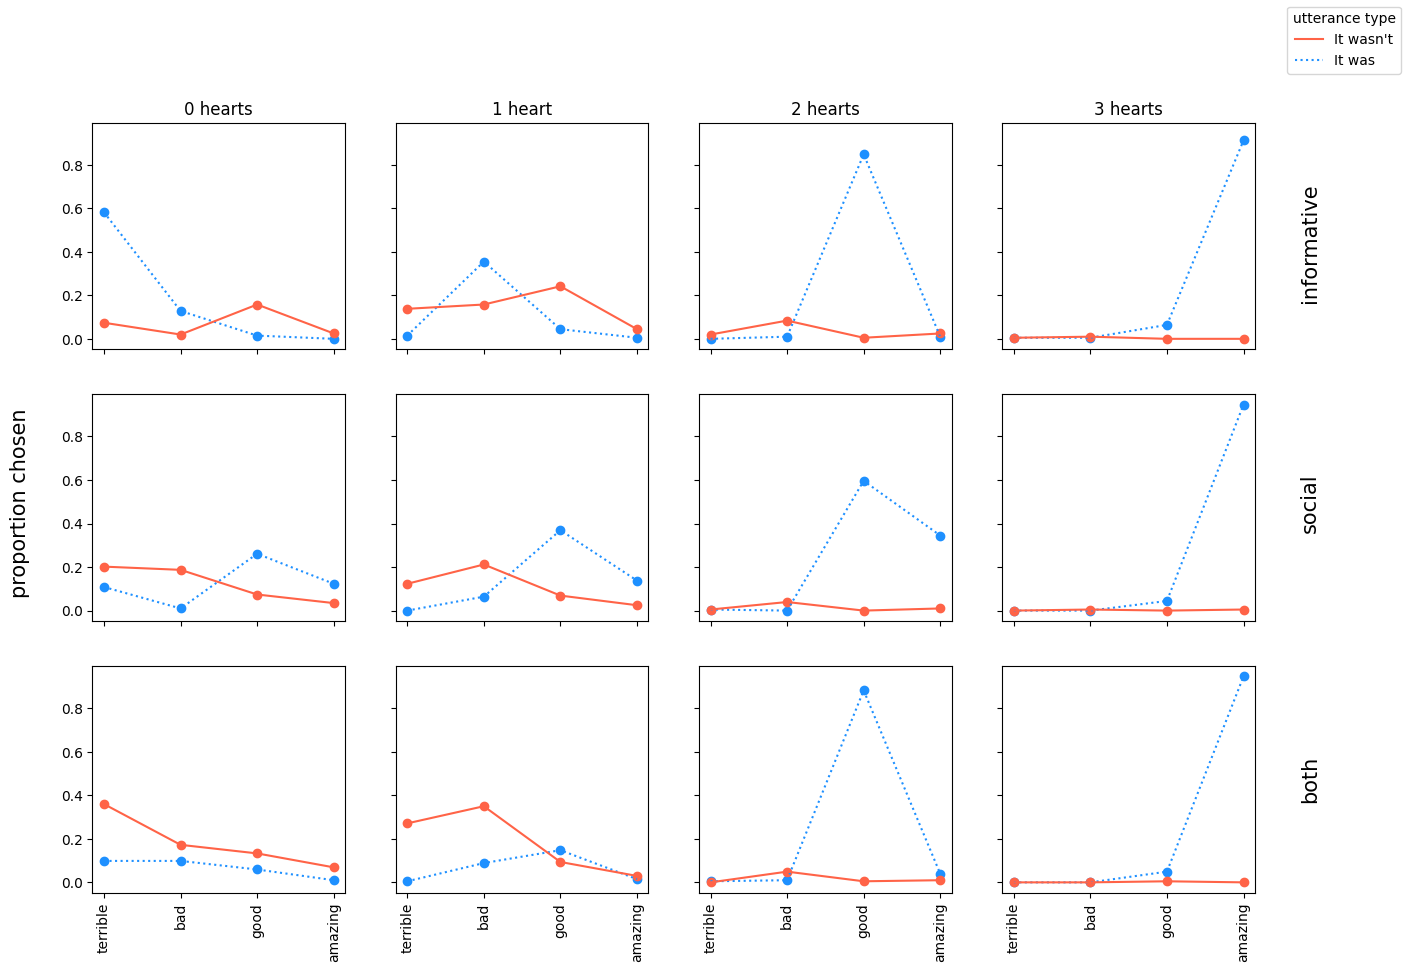

In [100]:
# Define the desired order for llm_adjectives
desired_order = ["terrible", "bad", "good", "amazing"]
unique_goals = ["both", "informative", "social"]
unique_num_hearts = ["0 hearts", "1 heart", "2 hearts", "3 hearts"]

# Convert llm_adjectives to a categorical type with the specified order
updated_df["llm_adjectives"] = pd.Categorical(updated_df["llm_adjectives"], categories=desired_order, ordered=True)

# Define a colorblind-friendly color palette and line styles
colors = {"It wasn't": "tomato", "It was": "dodgerblue"}  # Customize these colors
line_styles = {"It wasn't": "-", "It was": ":"}  # Solid for "It wasn't" and dotted for "It was"

# Map each goal to a specific row
goal_row_mapping = {"informative": 0, "social": 1, "both": 2}

fig, axs = plt.subplots(3, len(unique_num_hearts), figsize=(15, 10), sharex=True, sharey=True)

for goal in unique_goals:
    row = goal_row_mapping[goal]
    for j, num_heart in enumerate(unique_num_hearts):
        for llm_negation in unique_llm_negations:
            data = updated_df[(updated_df["goal"] == goal) & (updated_df["num_hearts"] == num_heart) & (updated_df["llm_negations"] == llm_negation)]
            data = data.sort_values(by="llm_adjectives")  # Sort by llm_adjectives which is categorical
            color = colors[llm_negation]  # Get the color for the current llm_negation
            linestyle = line_styles[llm_negation]  # Get the line style for the current llm_negation
            axs[row, j].scatter(data["llm_adjectives"], data["proportation"], color=color)
            axs[row, j].plot(data["llm_adjectives"], data["proportation"], color=color, linestyle=linestyle)  # Customize the line color and style
            if row == 0:
                axs[row, j].set_title(f"{num_heart}")

# Set common labels
                
fig.text(0.07, 0.5, 'proportion chosen', va='center', rotation='vertical', size=15)

# add text on the upper right of the plot
fig.text(0.93, 0.82, 'informative', va='top', rotation='vertical', size=15)
fig.text(0.93, 0.5, 'social', va='center', rotation='vertical', size=15)
fig.text(0.93, 0.2, 'both', va='bottom', rotation='vertical', size=15)


for ax in axs[2, :]:  # Apply rotation only to the bottom row
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# # Adjust layout
# plt.tight_layout(rect=[0.05, 0.05, 1, 1.4])

# Create a separate legend
handles = [
    plt.Line2D([0], [0], color="tomato", linestyle='-', label="It wasn't"),
    plt.Line2D([0], [0], color="dodgerblue", linestyle=':', label="It was")
]
fig.legend(handles=handles, loc='upper right', title='utterance type')

plt.show()


In [104]:
updated_df

goal num_hearts llm_negations llm_adjectives  count  proportation
0      both    1 heart        It was           good     41      0.315385
1      both    1 heart        It was        amazing     20      0.153846
2      both    1 heart        It was           okay      9      0.069231
3      both    1 heart     It wasn't       terrible     59      0.453846
4      both    1 heart     It wasn't            bad      1      0.007692
..      ...        ...           ...            ...    ...           ...
145  social   5 hearts        It was            bad      0      0.000000
146  social   5 hearts        It was           okay      0      0.000000
147  social   5 hearts     It wasn't           okay      0      0.000000
148  social   5 hearts     It wasn't           good      0      0.000000
149  social   5 hearts     It wasn't        amazing      0      0.000000

[150 rows x 6 columns]